# LLM evaluation

In [2]:
import pandas as pd
df1 = pd.read_csv("../data/alab_synthesis_data/llm_processed_synthesis_data_temp0_two_shot_test3.csv")

# tri_evaluation_names=[
#     "TRI-11", "TRI-12", "TRI-14", "TRI-15", "TRI-27", "TRI-28", "TRI-29", "TRI-30",
#     "TRI-31", "TRI-32", "TRI-77", "TRI-78", "TRI-79", "TRI-80", "TRI-87", "TRI-88",
#     "TRI-89", "TRI-90", "TRI-91", "TRI-92", "TRI-99", "TRI-100", "TRI-101", "TRI-102",
#     "TRI-103-REDO", "TRI-103", "TRI-104-REDO", "TRI-104", "TRI-105", "TRI-126", "TRI-127",
#     "TRI-130", "TRI-131", "TRI-132", "TRI-133", "TRI-134_0e50649b-b98b-45f3-aefe-4190783f5e94", "TRI-135_560f794e-c88b-4d5c-8624-80fff15a3db3", "TRI-136_a46b8a59-18ab-4e34-bfb7-35766a92b278",
#     "TRI-151", "TRI-152", "TRI-155", "TRI-156", "TRI-163", "TRI-164", "TRI-37",
#     "TRI-38", "TRI-39", "TRI-41", "TRI-43", "TRI-44", "TRI-62", "TRI-63", "TRI-64",
#     "TRI-81", "TRI-82", "TRI-114", "TRI-143"
# ]

# # Create a new DataFrame with rows where the 'Name' column is in the list
# filtered_df = df1[df1['Name'].isin(tri_evaluation_names)]

# # Display the filtered DataFrame
# len(filtered_df)

# missing_names = set(tri_evaluation_names) - set(filtered_df['Name'])
# missing_names

In [3]:
tri_evaluation_full = [
    2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1.5, 
    1, 1, 1, 1.5, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0.5, 1, 2, 2, 2, 2, 1, 
    2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 
    2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 
    1, 2, 2, 2, 1, 2, 0.5, 0.5, 1, 2, 2, 2, 2, 2, 2, 2, 2
]

tri_list = [
    "TRI-11", "TRI-12", "TRI-14", "TRI-15", "TRI-27", "TRI-28", "TRI-29", "TRI-30", "TRI-31", "TRI-32", 
    "TRI-77", "TRI-78", "TRI-79", "TRI-80", "TRI-87", "TRI-88", "TRI-89", "TRI-90", "TRI-91", "TRI-92", 
    "TRI-99", "TRI-100", "TRI-101", "TRI-102", "TRI-103-REDO", "TRI-103", "TRI-104-REDO", "TRI-104", "TRI-105", 
    "TRI-126", "TRI-127", "TRI-130", "TRI-131", "TRI-132", "TRI-133", "TRI-134_0e50649b-b98b-45f3-aefe-4190783f5e94", "TRI-135_560f794e-c88b-4d5c-8624-80fff15a3db3", "TRI-136_a46b8a59-18ab-4e34-bfb7-35766a92b278", 
    "TRI-151", "TRI-152", "TRI-155", "TRI-156", "TRI-163", "TRI-164",  "TRI-83", "TRI-84", 
    "TRI-113", "TRI-142", "TRI-171", "TRI-37", "TRI-38", "TRI-39", "TRI-41", "TRI-43", "TRI-44", 
    "TRI-62", "TRI-63", "TRI-64", "TRI-81", "TRI-82", "TRI-114", "TRI-143", "TRI-153", "TRI-154", "TRI-157", 
    "TRI-158", "TRI-159", "TRI-160", "TRI-161", "TRI-162", "TRI-172", "TRI-173", "TRI-174", "TRI-175", 
    "TRI-176", "TRI-177", "TRI-178", "TRI-179", "TRI-183", "TRI-184", "TRI-185", "TRI-186", "TRI-85", 
    "TRI-86", "TRI-94", "TRI-106", "TRI-111", "TRI-112", "TRI-137", "TRI-138", "TRI-139", "TRI-140", 
    "TRI-141", "TRI-181", "TRI-182"
]

In [4]:
valid_indices = [i for i, val in enumerate(tri_evaluation_full) if val != 1]

# Create new filtered lists
filtered_evaluation = [tri_evaluation_full[i] for i in valid_indices]
filtered_tri_list = [tri_list[i] for i in valid_indices]
df = pd.read_csv("../data/alab_synthesis_data/llm_processed_synthesis_data_better_prompt.csv")

In [5]:
df_with_tri=df[df['Name'].isin(tri_list)]
df_with_tri.reset_index(drop=True, inplace=True)
import ast

df_with_tri['llm_reaction_likelihood'] = df_with_tri['llm_reaction_likelihood'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
# Get indexes where 'llm_reaction_likelihood' contains an empty dictionary
empty_dict_indexes = df_with_tri[df_with_tri['llm_reaction_likelihood'] == {}].index.tolist()
print(empty_dict_indexes)
# Drop rows based on empt_dict_indexes in place
df_with_tri.drop(index=empty_dict_indexes, inplace=True)
# # Now apply the filtering condition again
# df_with_tri = df_with_tri[df_with_tri['llm_reaction_likelihood'].apply(lambda x: isinstance(x, dict) and x != {})]
df_with_tri.head(3)

[1, 39]


/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_88174/1926248724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_tri['llm_reaction_likelihood'] = df_with_tri['llm_reaction_likelihood'].apply(
/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_88174/1926248724.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_tri.drop(index=empty_dict_indexes, inplace=True)


,Unnamed: 0,Name,FW ID,XRD DARA RWP,DARA Phases,Search Results,Grouped Phases,Rwp results,Weight Fractions,Standardized_Name,Run Name in ALAB,Target,Precursors,Temperature (C),Dwell Duration (h),Furnace,llm_reaction_likelihood,llm_explanation
0,0,TRI-85,1433,9.73,['NaO2_58_(icsd_26583)-0'],[{'DARA_Search_result_1': ['NaO2_58_(icsd_2658...,"['Na1.0O2.0', 'Na1.0O2.0']","[12.68, 12.69]",{'final_weights': [{'NaO2_58_(icsd_26583)-0': ...,TRI_85,TRI-85_NaVO2_500,NaVO2,"['Na2CO3', 'V2O5']",500,12.0,TF-Ar,{'NaO2_58': 0.4000000000000001},{'NaO2_58': 'The formation of NaO2 is possible...
2,2,TRI-81,853,4.93,"['LiV3O8_11_(icsd_16689)-0', 'Li2CO3_15_(icsd_...",[{'DARA_Search_result_1': ['LiV3O8_11_(icsd_16...,"['Li1.0V3.0O8.0', 'Li4.0C1.0O5.0']",[6.14],{'final_weights': [{'LiV3O8_11_(icsd_16689)-0'...,TRI_81,TRI-81_LiVO2_400,LiVO2,"['Li2CO3', 'V2O5']",400,12.0,TF-Ar,"{'Li2CO3_15': 0.9, 'LiV3O8_11': 0.400000000000...",{'LiV3O8_11': 'The formation of LiV3O8 is plau...
3,5,TRI-106,1064,15.21,"['V2O3_167_(icsd_1869)-0', 'C1.9992O1.9992_194...",[{'DARA_Search_result_1': ['V2O3_167_(icsd_186...,"['V2.0O3.0', 'C1.9992O1.9992', 'C1.0', 'V2.0O3...","[18.64, 20.15]",{'final_weights': [{'V2O3_167_(icsd_1869)-0': ...,TRI_106,TRI-106_NaVO2-C_700,NaVO2,"['Na2CO3', 'V2O5', 'C (carbon black)']",700,12.0,TF-Ar,"{'CO_194': 0.10000000000000002, 'C_194': 0.833...","{'V2O3_167': ""V2O3 is moderately likely to for..."


In [6]:
print(df_with_tri['Weight Fractions'].head())

0    {'final_weights': [{'NaO2_58_(icsd_26583)-0': ...
2    {'final_weights': [{'LiV3O8_11_(icsd_16689)-0'...
3    {'final_weights': [{'V2O3_167_(icsd_1869)-0': ...
4    {'final_weights': [{'C1.9992O1.9992_194_(icsd_...
5    {'final_weights': [{'KVO3_57_(icsd_1486)-0': 0...
Name: Weight Fractions, dtype: object


In [7]:


# Ensure the 'Weight Fractions' column is properly parsed
df_with_tri['Weight Fractions'] = df_with_tri['Weight Fractions'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

def calculate_aif_score(row):
    # Extract final weights and likelihoods
    weight_fractions = row.get('Weight Fractions', {})
    final_weights_list = weight_fractions.get('final_weights', [])
    likelihoods = row.get('llm_reaction_likelihood', {})
    
    # Ensure both final weights and likelihoods exist
    if not final_weights_list or not likelihoods:
        return None  # Return None if either is missing or empty
    
    # Initialize AIF score
    aif_score = 0
    
    # Iterate over the list of final weights
    for final_weights in final_weights_list:  # This should be a list of dictionaries
        for phase, weight in final_weights.items():
            # Extract the phase name (before "_(")
            phase_name = phase.split('_(')[0]
            # Add the contribution to the AIF score
            aif_score += likelihoods.get(phase_name, 0) * weight
    
    return aif_score

df_with_tri['AIF Score'] = df_with_tri.apply(calculate_aif_score, axis=1)

/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_88174/3538722362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_tri['Weight Fractions'] = df_with_tri['Weight Fractions'].apply(
/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_88174/3538722362.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_tri['AIF Score'] = df_with_tri.apply(calculate_aif_score, axis=1)


In [8]:
name_value_dict = dict(zip(tri_list, tri_evaluation_full))

# Sort the dictionary by values and get the sorted keys (names)
sorted_names = [name for name, _ in sorted(name_value_dict.items(), key=lambda item: item[1])]
sorted_evaluation = [name_value_dict[name] for name in sorted_names]
def get_evaluation(name):
  return name_value_dict.get(name)  # Use .get() to handle missing names

# Add a new column named "Evaluation" to filtered_df
df_with_tri["Evaluation"] = df_with_tri["Name"].apply(get_evaluation)

nan_indexes = df_with_tri[df_with_tri['Evaluation'].isna()].index.tolist()

# Print the list of indexes
print("Indexes with NaN in 'Evaluation':", nan_indexes)

for i in nan_indexes:
    print(df_with_tri['Name'][i])

import numpy as np
df_with_tri['AIF_evaluation'] = np.where(df_with_tri['AIF Score'] >= 0.52, 'Yes', 'No') #0.52 #0.7
df_with_tri['TRI_evaluation'] = np.where(df_with_tri['Evaluation'] >= 1.04, 'Yes', 'No') #1.04 #1.4

Indexes with NaN in 'Evaluation': []


/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_88174/681258888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_tri["Evaluation"] = df_with_tri["Name"].apply(get_evaluation)
/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_88174/681258888.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_tri['AIF_evaluation'] = np.where(df_with_tri['AIF Score'] >= 0.52, 'Yes', 'No') #0.52 #0.7
/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_88174/681258888.py:22: Setti

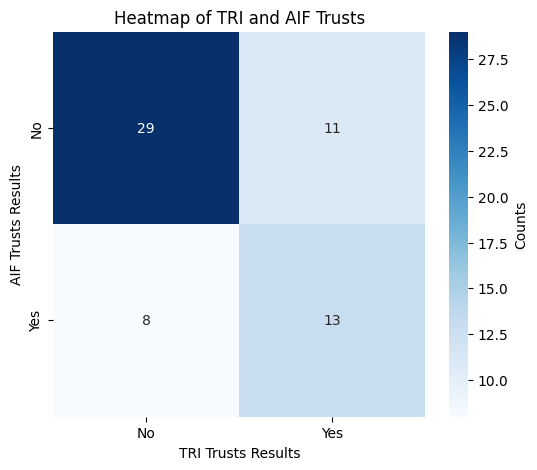

In [9]:
data = pd.crosstab(df_with_tri['AIF_evaluation'], df_with_tri['TRI_evaluation'])
import seaborn as sns
import matplotlib.pyplot as plt
# Labels for the heatmap
x_labels = ["Yes", "No"]  # TRI Trusts
y_labels = ["Yes", "No"]  # AIF Trusts

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Counts'})
plt.title("Heatmap of TRI and AIF Trusts")
plt.xlabel("TRI Trusts Results")
plt.ylabel("AIF Trusts Results")
plt.show()

In [11]:
df_with_tri

,Unnamed: 0,Name,FW ID,XRD DARA RWP,DARA Phases,Search Results,Grouped Phases,Rwp results,Weight Fractions,Standardized_Name,...,Precursors,Temperature (C),Dwell Duration (h),Furnace,llm_reaction_likelihood,llm_explanation,AIF Score,Evaluation,AIF_evaluation,TRI_evaluation
0,0,TRI-85,1433,9.73,['NaO2_58_(icsd_26583)-0'],[{'DARA_Search_result_1': ['NaO2_58_(icsd_2658...,"['Na1.0O2.0', 'Na1.0O2.0']","[12.68, 12.69]",{'final_weights': [{'NaO2_58_(icsd_26583)-0': ...,TRI_85,...,"['Na2CO3', 'V2O5']",500,12.0,TF-Ar,{'NaO2_58': 0.4000000000000001},{'NaO2_58': 'The formation of NaO2 is possible...,0.400000,1.0,No,No
2,2,TRI-81,853,4.93,"['LiV3O8_11_(icsd_16689)-0', 'Li2CO3_15_(icsd_...",[{'DARA_Search_result_1': ['LiV3O8_11_(icsd_16...,"['Li1.0V3.0O8.0', 'Li4.0C1.0O5.0']",[6.14],{'final_weights': [{'LiV3O8_11_(icsd_16689)-0'...,TRI_81,...,"['Li2CO3', 'V2O5']",400,12.0,TF-Ar,"{'Li2CO3_15': 0.9, 'LiV3O8_11': 0.400000000000...",{'LiV3O8_11': 'The formation of LiV3O8 is plau...,0.477629,1.0,No,No
3,5,TRI-106,1064,15.21,"['V2O3_167_(icsd_1869)-0', 'C1.9992O1.9992_194...",[{'DARA_Search_result_1': ['V2O3_167_(icsd_186...,"['V2.0O3.0', 'C1.9992O1.9992', 'C1.0', 'V2.0O3...","[18.64, 20.15]",{'final_weights': [{'V2O3_167_(icsd_1869)-0': ...,TRI_106,...,"['Na2CO3', 'V2O5', 'C (carbon black)']",700,12.0,TF-Ar,"{'CO_194': 0.10000000000000002, 'C_194': 0.833...","{'V2O3_167': ""V2O3 is moderately likely to for...",0.473334,0.5,No,No
4,7,TRI-94,869,19.51,"['KV4O10_63_(icsd_67595)-26', 'VO2_14_(icsd_60...",[{'DARA_Search_result_1': ['KV4O10_63_(icsd_67...,"['K1.0V4.0O10.0', 'V1.0O2.0', 'C1.0', 'K2.0O1....","[23.61, 24.25, 24.57]",{'final_weights': [{'C1.9992O1.9992_194_(icsd_...,TRI_94,...,"['K2CO3', 'V2O3']",600,12.0,TF-Ar,"{'C_186': 0.10000000000000002, 'K2O_225': 0.3,...",{'KV4O10_63': 'KV4O10 is a complex oxide that ...,0.285441,0.5,No,No
5,8,TRI-83,861,4.81,"['K2V3O8_100_(icsd_70527)-0', 'KVO3_57_(icsd_1...",[{'DARA_Search_result_1': ['K2V3O8_100_(icsd_7...,"['K2.0V3.0O8.0', 'K1.0V1.0O3.0', 'K3.0V5.0O14.0']",[6.7],{'final_weights': [{'KVO3_57_(icsd_1486)-0': 0...,TRI_83,...,"['K2CO3', 'V2O5']",400,12.0,TF-Ar,"{'K3V5O14_157': 0.20000000000000004, 'K2V3O8_1...",{'K2V3O8_100': 'K2V3O8 is a likely phase to fo...,0.461998,2.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,102,TRI-78,796,5.75,"['CaCO3_167_(icsd_166364)-0', 'V2O3_167_(icsd_...",[{'DARA_Search_result_1': ['CaCO3_167_(icsd_16...,"['Ca1.0C1.0O3.0', 'V2.0O3.0']",[6.52],{'final_weights': [{'CaCO3_167_(icsd_166364)-0...,TRI_78,...,"['CaCO3', 'V2O3']",500,12.0,TF-Ar,"{'CaCO3_167': 0.9, 'V2O3_167': 0.6}",{'CaCO3_167': 'The likelihood of CaCO3 forming...,0.773250,2.0,Yes,Yes
59,103,TRI-77,790,6.86,"['CaCO3_167_(icsd_166364)-0', 'V2O5_59_(icsd_4...",[{'DARA_Search_result_1': ['CaCO3_167_(icsd_16...,"['Ca1.0C1.0O3.0', 'V2.0O5.0', 'Ca2.0V2.0O7.0',...","[7.31, 8.64, 8.97]",{'final_weights': [{'CaCO3_167_(icsd_166364)-0...,TRI_77,...,"['CaCO3', 'V2O5']",500,12.0,TF-Ar,"{'V2O5_59': 0.10000000000000002, 'Ca2V2O7_2': ...",{'CaCO3_167': 'The likelihood of CaCO3 forming...,0.199214,1.0,No,No
60,104,TRI-80,783,6.18,"['V2O3_167_(icsd_1869)-0', 'CaCO3_167_(icsd_16...",[{'DARA_Search_result_1': ['V2O3_167_(icsd_186...,"['V2.0O3.0', 'Ca1.0C1.0O3.0']",[8.16],{'final_weights': [{'V2O3_167_(icsd_1869)-0': ...,TRI_80,...,"['CaCO3', 'V2O3']",500,12.0,TF-Ar,"{'CaCO3_167': 0.3333333333333333, 'V2O3_167': ...",{'V2O3_167': 'V2O3 is likely to form under the...,0.492512,2.0,No,Yes
61,105,TRI-82,849,10.31,"['Li1.94V6O16_11_(icsd_55717)-None', 'VO2_12_(...",[{'DARA_Search_result_1': ['Li1.94V6O16_11_(ic...,"['Li1.94V6.0O16.0', 'V1.0O2.0', 'Li1.94V6.0O16...","[12.01, 12.34]",{'final_weights': [{'Li1.94V6O16_11_(icsd_5571...,TRI_82,...,"['Li2CO3', 'V2O3']",400,12.0,TF-Ar,"{'Li14V43O114_11': 0.4000000000000001, 'VO2_12...",{'Li14V43O114_11': 'The formation of Li14V43O1...,0.180030,0.0,No,No


# RWP check

In [35]:
import pandas as pd
df=pd.read_csv("../data/alab_synthesis_data/synthesis_and_predictions_new_test.csv")

In [36]:
len(df)

165

In [37]:
import ast

# Apply ast.literal_eval to both columns to convert strings to lists
df['Extra peaks'] = df['Extra peaks'].apply(ast.literal_eval)
df['Missing peaks'] = df['Missing peaks'].apply(ast.literal_eval)


In [38]:
df_rwp_with_tri=df[df['Name'].isin(tri_list)]
df_rwp_with_tri.reset_index(drop=True, inplace=True)
len(df_rwp_with_tri)

84

In [39]:
duplicates = df_rwp_with_tri[df_rwp_with_tri.duplicated(subset="Name", keep=False)]

duplicates

,Name,FW ID,XRD DARA RWP,DARA Phases,Weight fraction,Search Results,Grouped Phases,Run Name in ALAB_Run_Name_in_ALAB,Target,Precursors,...,Max Intensity,Standardized_Name,extra_peaks,missing_peaks,Run Name in ALAB_Name,Target_Name,Precursors_Name,Temperature (C)_Name,Dwell Duration (h)_Name,Furnace_Name
57,TRI-11,757,5.96,['Ca2V2O7_2_(icsd_421266)-0'],{'Ca2V2O7_2_(icsd_421266)-0': 1.0},[dict_keys(['Ca2V2O7_2_(icsd_421266)-0'])],"[[[[{'Ca': 2.0, 'V': 2.0, 'O': 7.0}, ['Ca2V2O7...",TRI-11,CaVO2,"['Ca', 'V', 'O']",...,3945.0,TRI_11,[],[],11_Ca3RuO6_600,Ca3RuO6,"['CaCO3', 'RuO2']",550,8.0,BF
58,TRI-11,757,5.96,['Ca2V2O7_2_(icsd_421266)-0'],{'Ca2V2O7_2_(icsd_421266)-0': 1.0},[dict_keys(['Ca2V2O7_2_(icsd_421266)-0'])],"[[[[{'Ca': 2.0, 'V': 2.0, 'O': 7.0}, ['Ca2V2O7...",TRI-11,CaVO2,"['Ca', 'V', 'O']",...,3945.0,TRI_11,[],[],11_CaVO2_900,CaVO2,"['CaCO3', 'V2O5']",900,8.0,BF
64,TRI-12,789,6.37,['Ca2V2O7_2_(icsd_421266)-0'],{'Ca2V2O7_2_(icsd_421266)-0': 1.0},[dict_keys(['Ca2V2O7_2_(icsd_421266)-0'])],"[[[[{'Ca': 2.0, 'V': 2.0, 'O': 7.0}, ['Ca2V2O7...",TRI-12,CaVO2,"['Ca', 'V', 'O']",...,3583.0,TRI_12,[],[],12_CaRuO4_600,CaRuO4,"['CaCO3', 'RuO2']",550,8.0,BF
65,TRI-12,789,6.37,['Ca2V2O7_2_(icsd_421266)-0'],{'Ca2V2O7_2_(icsd_421266)-0': 1.0},[dict_keys(['Ca2V2O7_2_(icsd_421266)-0'])],"[[[[{'Ca': 2.0, 'V': 2.0, 'O': 7.0}, ['Ca2V2O7...",TRI-12,CaVO2,"['Ca', 'V', 'O']",...,3583.0,TRI_12,[],[],12_CaVO2_900,CaVO2,"['CaCO3', 'V2O3']",900,8.0,BF


In [40]:
df_rwp_with_tri['Name'].unique()

array(['TRI-85', 'TRI-87', 'TRI-81', 'TRI-106', 'TRI-94', 'TRI-83',
       'TRI-84', 'TRI-86', 'TRI-91', 'TRI-105', 'TRI-104-REDO', 'TRI-104',
       'TRI-102', 'TRI-101', 'TRI-100', 'TRI-103-REDO', 'TRI-103',
       'TRI-99', 'TRI-92', 'TRI-111', 'TRI-114', 'TRI-113', 'TRI-112',
       'TRI-134_0e50649b-b98b-45f3-aefe-4190783f5e94',
       'TRI-136_a46b8a59-18ab-4e34-bfb7-35766a92b278',
       'TRI-135_560f794e-c88b-4d5c-8624-80fff15a3db3', 'TRI-130',
       'TRI-133', 'TRI-132', 'TRI-131', 'TRI-140', 'TRI-143', 'TRI-142',
       'TRI-141', 'TRI-90', 'TRI-88', 'TRI-126', 'TRI-127', 'TRI-158',
       'TRI-157', 'TRI-152', 'TRI-156', 'TRI-155', 'TRI-151', 'TRI-154',
       'TRI-153', 'TRI-159', 'TRI-164', 'TRI-163', 'TRI-162', 'TRI-161',
       'TRI-160', 'TRI-171', 'TRI-179', 'TRI-178', 'TRI-177', 'TRI-176',
       'TRI-11', 'TRI-79', 'TRI-28', 'TRI-78', 'TRI-29', 'TRI-77',
       'TRI-12', 'TRI-32', 'TRI-80', 'TRI-38', 'TRI-39', 'TRI-43',
       'TRI-63', 'TRI-62', 'TRI-37', 'TRI-82',

In [41]:
df_rwp_with_tri = df_rwp_with_tri.drop(index=[57,64])#32 and 38 for tri-11 and tri-12 duplicates

# Reset the index
df_rwp_with_tri = df_rwp_with_tri.reset_index(drop=True)
df_rwp_with_tri = df_rwp_with_tri[df_rwp_with_tri["Name"] != "TRI-39"]
# df_rwp_with_tri.head(40)

In [42]:
len(df_rwp_with_tri)
# filtered_rows = df_rwp_with_tri[df_rwp_with_tri['Name'] == "TRI-84"]
# filtered_rows

81

In [43]:
name_value_dict = dict(zip(tri_list, tri_evaluation_full))

# Sort the dictionary by values and get the sorted keys (names)
sorted_names = [name for name, _ in sorted(name_value_dict.items(), key=lambda item: item[1])]
sorted_evaluation = [name_value_dict[name] for name in sorted_names]
def get_evaluation(name):
  return name_value_dict.get(name)  # Use .get() to handle missing names

# Add a new column named "Evaluation" to filtered_df
df_rwp_with_tri["Evaluation"] = df_rwp_with_tri["Name"].apply(get_evaluation)

nan_indexes = df_rwp_with_tri[df_rwp_with_tri['Evaluation'].isna()].index.tolist()

# Print the list of indexes
print("Indexes with NaN in 'Evaluation':", nan_indexes)

# for i in nan_indexes:
#     print(df_with_tri['Name'][i])

# import numpy as np
# df_with_tri['AIF_evaluation'] = np.where(df_with_tri['AIF Score'] >= 0.52, 'Yes', 'No') #0.52 #0.7
# df_with_tri['TRI_evaluation'] = np.where(df_with_tri['Evaluation'] >= 1.04, 'Yes', 'No') #1.04 #1.4

Indexes with NaN in 'Evaluation': []


In [44]:
df_rwp_with_tri.columns

Index(['Name', 'FW ID', 'XRD DARA RWP', 'DARA Phases', 'Weight fraction',
       'Search Results', 'Grouped Phases', 'Run Name in ALAB_Run_Name_in_ALAB',
       'Target', 'Precursors', 'Temperature (C)', 'Dwell Duration (h)',
       'Furnace', 'Missing peaks', 'Extra peaks', 'Max Intensity',
       'Standardized_Name', 'extra_peaks', 'missing_peaks',
       'Run Name in ALAB_Name', 'Target_Name', 'Precursors_Name',
       'Temperature (C)_Name', 'Dwell Duration (h)_Name', 'Furnace_Name',
       'Evaluation'],
      dtype='object')

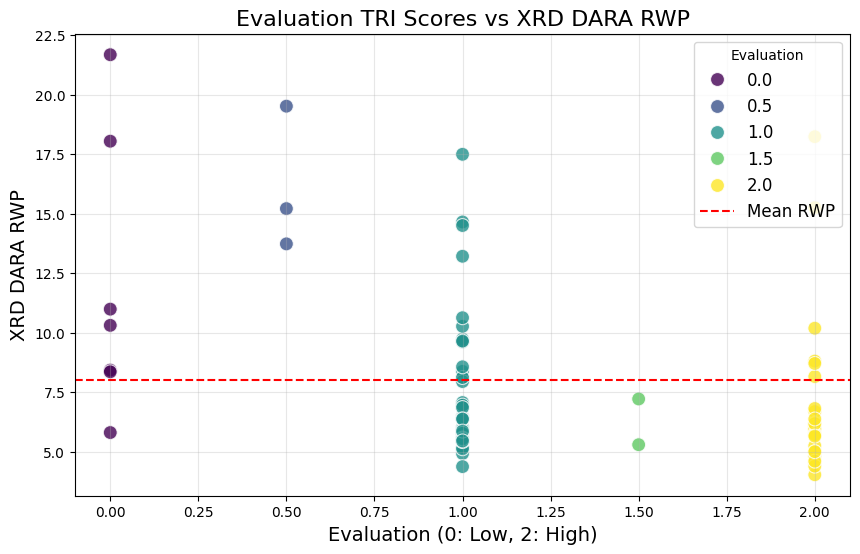

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Evaluation vs XRD DARA RWP
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Evaluation',
    y='XRD DARA RWP',
    data=df_rwp_with_tri,
    hue='Evaluation',  # Highlight categories with colors
    palette='viridis',
    s=100,  # Adjust marker size
    alpha=0.8  # Transparency for better visibility
)

# Add titles and labels
plt.title("Evaluation TRI Scores vs XRD DARA RWP", fontsize=16)
plt.xlabel("Evaluation (0: Low, 2: High)", fontsize=14)
plt.ylabel("XRD DARA RWP", fontsize=14)
plt.axhline(y=df_rwp_with_tri['XRD DARA RWP'].mean(), color='red', linestyle='--', label='Mean RWP')
plt.legend(title="Evaluation", fontsize=12)
plt.grid(alpha=0.3)

plt.show()

In [46]:
import plotly.express as px
import pandas as pd

# Sample DataFrame (Ensure df_rwp_with_tri has 'Evaluation', 'XRD DARA RWP', and 'Name' columns)
# df_rwp_with_tri = pd.read_csv("your_data.csv")  # Uncomment if loading data

# Create interactive scatter plot
fig = px.scatter(
    df_rwp_with_tri,
    x='Evaluation',
    y='XRD DARA RWP',
    color='Evaluation',  # Color points by Evaluation score
    color_continuous_scale='viridis',  # Use a similar Seaborn palette
    hover_data={'Evaluation': False, 'XRD DARA RWP': True, 'Name': True},  # Show 'Name' on hover
    size_max=10  # Adjust marker size
)

# Add a mean RWP line
fig.add_hline(y=df_rwp_with_tri['XRD DARA RWP'].mean(), line_dash="dash", line_color="red", annotation_text="Mean RWP")

# Customize layout
fig.update_layout(
    title="Evaluation TRI Scores vs XRD DARA RWP",
    xaxis_title="Evaluation (0: Low, 2: High)",
    yaxis_title="XRD DARA RWP",
    coloraxis_colorbar_title="Evaluation",
    template="plotly_white"
)

# Show interactive plot
fig.show()

/var/folders/h9/xq939v1d36x6_ggshzfwxr840000gn/T/ipykernel_1590/2732892751.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




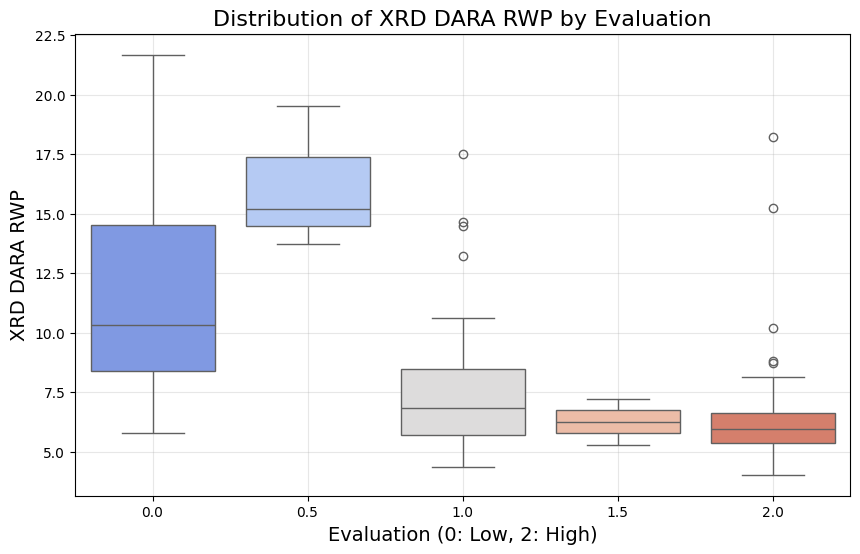

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Evaluation',
    y='XRD DARA RWP',
    data=df_rwp_with_tri,
    palette='coolwarm'
)

# Add titles and labels
plt.title("Distribution of XRD DARA RWP by Evaluation", fontsize=16)
plt.xlabel("Evaluation (0: Low, 2: High)", fontsize=14)
plt.ylabel("XRD DARA RWP", fontsize=14)
plt.grid(alpha=0.3)

plt.show()

In [48]:
df_rwp_with_tri['Missing peaks'][0]

[(9.959401758262777, 42.782629077196155),
 (13.100379681811319, 331.3482506496269),
 (13.346463591686899, 69.9341646926991),
 (16.038177564930027, 43.39992622631198),
 (16.786958009437612, 75.11261773569815),
 (18.685096702967996, 28.554629293697992),
 (19.3497401711161, 269.6739287713501),
 (22.34759152227676, 188.9877903925318),
 (23.349516042471492, 389.17301879678655),
 (23.694832102094804, 17.71516191629252),
 (24.832933087608478, 78.96964290472165),
 (25.29441622423253, 232.53175125753347),
 (27.162239118425067, 75.19301884070471),
 (27.786578493557794, 533.5164320015026),
 (28.702546430993, 244.48120539334582),
 (31.517792711713987, 138.09866581925084),
 (31.91358804216562, 27.416393928992772),
 (33.454322831394215, 243.57052814728752),
 (33.95421345983923, 150.29721341921947),
 (34.12119803649577, 21.86758514613431),
 (34.53735443419907, 511.57709407435675),
 (36.70926324032297, 68.79088549415894),
 (38.08443487099983, 79.73977058383787),
 (39.604348648514474, 102.4784966572864

In [49]:
df_rwp_with_tri['Missing peaks'][0]

[(9.959401758262777, 42.782629077196155),
 (13.100379681811319, 331.3482506496269),
 (13.346463591686899, 69.9341646926991),
 (16.038177564930027, 43.39992622631198),
 (16.786958009437612, 75.11261773569815),
 (18.685096702967996, 28.554629293697992),
 (19.3497401711161, 269.6739287713501),
 (22.34759152227676, 188.9877903925318),
 (23.349516042471492, 389.17301879678655),
 (23.694832102094804, 17.71516191629252),
 (24.832933087608478, 78.96964290472165),
 (25.29441622423253, 232.53175125753347),
 (27.162239118425067, 75.19301884070471),
 (27.786578493557794, 533.5164320015026),
 (28.702546430993, 244.48120539334582),
 (31.517792711713987, 138.09866581925084),
 (31.91358804216562, 27.416393928992772),
 (33.454322831394215, 243.57052814728752),
 (33.95421345983923, 150.29721341921947),
 (34.12119803649577, 21.86758514613431),
 (34.53735443419907, 511.57709407435675),
 (36.70926324032297, 68.79088549415894),
 (38.08443487099983, 79.73977058383787),
 (39.604348648514474, 102.4784966572864

In [50]:
# Step 1: Calculate total missing peaks and total extra peaks
df_rwp_with_tri['Total Missing Peaks'] = df_rwp_with_tri['Missing peaks'].apply(len)
df_rwp_with_tri['Total Extra Peaks'] = df_rwp_with_tri['Extra peaks'].apply(len)

# # Step 2: Define thresholds
# intensity_threshold = 100  # Example threshold for substantial extra peaks

# # Calculate the number of substantial missing peaks for each row
# df_rwp_with_tri['Substantial Missing Peaks'] = df_rwp_with_tri['Missing peaks'].apply(
#     lambda peaks: sum(1 for _, intensity in peaks if intensity >= intensity_threshold)
# )

# # Calculate the number of substantial extra peaks for each row
# df_rwp_with_tri['Substantial Extra Peaks'] = df_rwp_with_tri['Extra peaks'].apply(
#     lambda peaks: sum(1 for _, intensity in peaks if intensity >= intensity_threshold)
# )
# #

## Calculate 10% of the max intensity for each row
df_rwp_with_tri['Intensity Threshold'] = df_rwp_with_tri['Max Intensity'] * 0.1

# Calculate the number of substantial missing peaks for each row
df_rwp_with_tri['Substantial Missing Peaks'] = df_rwp_with_tri.apply(
    lambda row: sum(1 for _, intensity in row['Missing peaks'] if intensity >= row['Intensity Threshold']),
    axis=1
)

# Calculate the number of substantial extra peaks for each row
df_rwp_with_tri['Substantial Extra Peaks'] = df_rwp_with_tri.apply(
    lambda row: sum(1 for _, intensity in row['Extra peaks'] if intensity >= row['Intensity Threshold']),
    axis=1
)

In [51]:
df_rwp_with_tri.head()

,Name,FW ID,XRD DARA RWP,DARA Phases,Weight fraction,Search Results,Grouped Phases,Run Name in ALAB_Run_Name_in_ALAB,Target,Precursors,...,Precursors_Name,Temperature (C)_Name,Dwell Duration (h)_Name,Furnace_Name,Evaluation,Total Missing Peaks,Total Extra Peaks,Intensity Threshold,Substantial Missing Peaks,Substantial Extra Peaks
0,TRI-85,1433,9.73,['NaO2_58_(icsd_26583)-0'],{'NaO2_58_(icsd_26583)-0': 1.0},"[dict_keys(['NaO2_58_(icsd_26583)-0']), dict_k...","[[[[{'Na': 1.0, 'O': 2.0}, ['NaO2_58_(icsd_265...",TRI-85,NaVO2,"['Na', 'V', 'O']",...,"['Na2CO3', 'V2O5']",500,12.0,TF-Ar,1.0,31,2,277.2,5,0
1,TRI-87,767,18.04,['Ca2V2O7_2_(icsd_421266)-0'],{'Ca2V2O7_2_(icsd_421266)-0': 1.0},[dict_keys(['Ca2V2O7_2_(icsd_421266)-0'])],"[[[[{'Ca': 2.0, 'V': 2.0, 'O': 7.0}, ['Ca2V2O7...",TRI-87,CaVO2,"['Ca', 'V', 'O']",...,"['CaCO3', 'V2O5']",700,12.0,TF-Ar,0.0,23,2,546.0,3,0
2,TRI-81,853,4.93,"['LiV3O8_11_(icsd_16689)-0', 'Li2CO3_15_(icsd_...",{'LiV3O8_11_(icsd_16689)-0': 0.844741039792020...,"[dict_keys(['LiV3O8_11_(icsd_16689)-0', 'Li2CO...","[[[[{'Li': 1.0, 'V': 3.0, 'O': 8.0}, ['LiV3O8_...",TRI-81,LiVO2,"['Li', 'V', 'O']",...,"['Li2CO3', 'V2O5']",400,12.0,TF-Ar,1.0,3,0,977.6,0,0
3,TRI-106,1064,15.21,"['V2O3_167_(icsd_1869)-0', 'C1.9992O1.9992_194...",{'V2O3_167_(icsd_1869)-0': 0.43893680744096547...,"[dict_keys(['V2O3_167_(icsd_1869)-0', 'C1.9992...","[[[[{'V': 2.0, 'O': 3.0}, ['V2O3_167_(icsd_186...",TRI-106,Na1V1C1,"['Na', 'V', 'C']",...,"['Na2CO3', 'V2O5', 'C (carbon black)']",700,12.0,TF-Ar,0.5,21,2,655.5,2,0
4,TRI-94,869,19.51,"['KV4O10_63_(icsd_67595)-26', 'VO2_14_(icsd_60...",{'C1.9992O1.9992_194_(icsd_37237)-None': 0.404...,"[dict_keys(['KV4O10_63_(icsd_67595)-26', 'VO2_...","[[[[{'K': 1.0, 'V': 4.0, 'O': 10.0}, ['KV4O10_...",TRI-94,NaVO3,"['Na', 'V', 'O']",...,"['K2CO3', 'V2O3']",600,12.0,TF-Ar,0.5,17,7,789.7,1,0


In [52]:
for i in range(len(df_rwp_with_tri)):
    print("Name ", df_rwp_with_tri['Name'][i],", " ,df_rwp_with_tri['FW ID'][i])
    print("len missing ", df_rwp_with_tri['Total Missing Peaks'][i])
    print("len extra ", df_rwp_with_tri['Total Extra Peaks'][i] )
    print("++++++")

Name  TRI-85 ,  1433
len missing  31
len extra  2
++++++
Name  TRI-87 ,  767
len missing  23
len extra  2
++++++
Name  TRI-81 ,  853
len missing  3
len extra  0
++++++
Name  TRI-106 ,  1064
len missing  21
len extra  2
++++++
Name  TRI-94 ,  869
len missing  17
len extra  7
++++++
Name  TRI-83 ,  861
len missing  2
len extra  0
++++++
Name  TRI-84 ,  868
len missing  16
len extra  0
++++++
Name  TRI-86 ,  1051
len missing  2
len extra  1
++++++
Name  TRI-91 ,  781
len missing  5
len extra  1
++++++
Name  TRI-105 ,  769
len missing  2
len extra  1
++++++
Name  TRI-104-REDO ,  794
len missing  19
len extra  5
++++++
Name  TRI-104 ,  771
len missing  10
len extra  4
++++++
Name  TRI-102 ,  785
len missing  0
len extra  0
++++++
Name  TRI-101 ,  763
len missing  3
len extra  0
++++++
Name  TRI-100 ,  773
len missing  0
len extra  0
++++++
Name  TRI-103-REDO ,  766
len missing  24
len extra  1
++++++
Name  TRI-103 ,  780
len missing  33
len extra  0
++++++
Name  TRI-99 ,  760
len missing  1

KeyError: 67

In [53]:
df_rwp_with_tri['Weight fraction'][1]

"{'Ca2V2O7_2_(icsd_421266)-0': 1.0}"

In [54]:
df_rwp_with_tri.head()

,Name,FW ID,XRD DARA RWP,DARA Phases,Weight fraction,Search Results,Grouped Phases,Run Name in ALAB_Run_Name_in_ALAB,Target,Precursors,...,Precursors_Name,Temperature (C)_Name,Dwell Duration (h)_Name,Furnace_Name,Evaluation,Total Missing Peaks,Total Extra Peaks,Intensity Threshold,Substantial Missing Peaks,Substantial Extra Peaks
0,TRI-85,1433,9.73,['NaO2_58_(icsd_26583)-0'],{'NaO2_58_(icsd_26583)-0': 1.0},"[dict_keys(['NaO2_58_(icsd_26583)-0']), dict_k...","[[[[{'Na': 1.0, 'O': 2.0}, ['NaO2_58_(icsd_265...",TRI-85,NaVO2,"['Na', 'V', 'O']",...,"['Na2CO3', 'V2O5']",500,12.0,TF-Ar,1.0,31,2,277.2,5,0
1,TRI-87,767,18.04,['Ca2V2O7_2_(icsd_421266)-0'],{'Ca2V2O7_2_(icsd_421266)-0': 1.0},[dict_keys(['Ca2V2O7_2_(icsd_421266)-0'])],"[[[[{'Ca': 2.0, 'V': 2.0, 'O': 7.0}, ['Ca2V2O7...",TRI-87,CaVO2,"['Ca', 'V', 'O']",...,"['CaCO3', 'V2O5']",700,12.0,TF-Ar,0.0,23,2,546.0,3,0
2,TRI-81,853,4.93,"['LiV3O8_11_(icsd_16689)-0', 'Li2CO3_15_(icsd_...",{'LiV3O8_11_(icsd_16689)-0': 0.844741039792020...,"[dict_keys(['LiV3O8_11_(icsd_16689)-0', 'Li2CO...","[[[[{'Li': 1.0, 'V': 3.0, 'O': 8.0}, ['LiV3O8_...",TRI-81,LiVO2,"['Li', 'V', 'O']",...,"['Li2CO3', 'V2O5']",400,12.0,TF-Ar,1.0,3,0,977.6,0,0
3,TRI-106,1064,15.21,"['V2O3_167_(icsd_1869)-0', 'C1.9992O1.9992_194...",{'V2O3_167_(icsd_1869)-0': 0.43893680744096547...,"[dict_keys(['V2O3_167_(icsd_1869)-0', 'C1.9992...","[[[[{'V': 2.0, 'O': 3.0}, ['V2O3_167_(icsd_186...",TRI-106,Na1V1C1,"['Na', 'V', 'C']",...,"['Na2CO3', 'V2O5', 'C (carbon black)']",700,12.0,TF-Ar,0.5,21,2,655.5,2,0
4,TRI-94,869,19.51,"['KV4O10_63_(icsd_67595)-26', 'VO2_14_(icsd_60...",{'C1.9992O1.9992_194_(icsd_37237)-None': 0.404...,"[dict_keys(['KV4O10_63_(icsd_67595)-26', 'VO2_...","[[[[{'K': 1.0, 'V': 4.0, 'O': 10.0}, ['KV4O10_...",TRI-94,NaVO3,"['Na', 'V', 'O']",...,"['K2CO3', 'V2O3']",600,12.0,TF-Ar,0.5,17,7,789.7,1,0


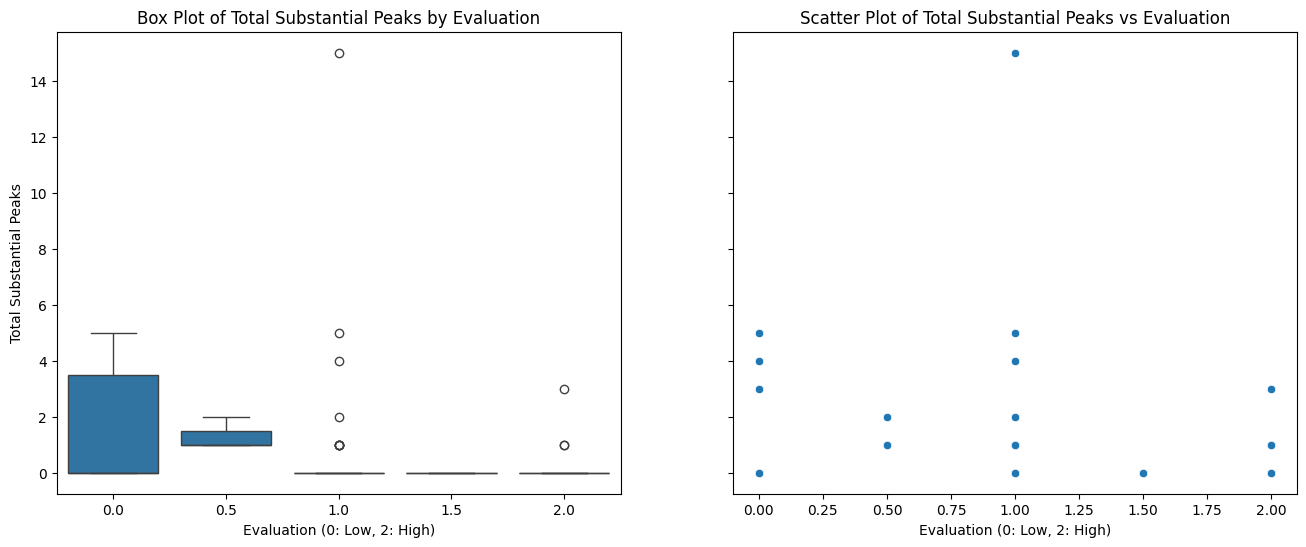

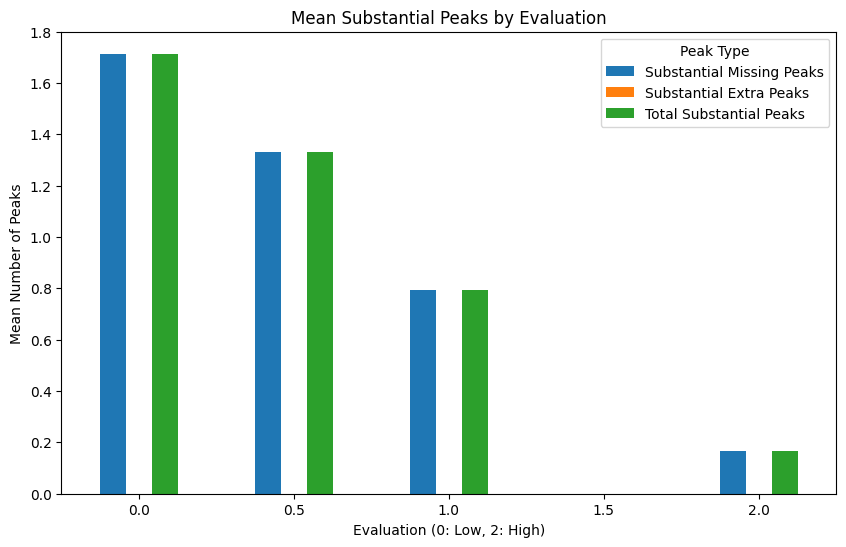

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a total column for substantial peaks
df_rwp_with_tri['Total Substantial Peaks'] = df_rwp_with_tri['Substantial Missing Peaks'] + df_rwp_with_tri['Substantial Extra Peaks']

# Set up a grid of plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Box Plot for Substantial Peaks by Evaluation
sns.boxplot(
    x='Evaluation',
    y='Total Substantial Peaks',
    data=df_rwp_with_tri,
    ax=axes[0]
)
axes[0].set_title('Box Plot of Total Substantial Peaks by Evaluation')
axes[0].set_ylabel('Total Substantial Peaks')
axes[0].set_xlabel('Evaluation (0: Low, 2: High)')

# Scatter Plot for Total Substantial Peaks vs Evaluation
sns.scatterplot(
    x='Evaluation',
    y='Total Substantial Peaks',
    data=df_rwp_with_tri,
    ax=axes[1]
)
axes[1].set_title('Scatter Plot of Total Substantial Peaks vs Evaluation')
axes[1].set_ylabel('Total Substantial Peaks')
axes[1].set_xlabel('Evaluation (0: Low, 2: High)')
# Calculate mean values for each evaluation score
mean_peaks = df_rwp_with_tri.groupby('Evaluation')[['Substantial Missing Peaks', 'Substantial Extra Peaks', 'Total Substantial Peaks']].mean()

# Plot the bar chart
mean_peaks.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Substantial Peaks by Evaluation')
plt.ylabel('Mean Number of Peaks')
plt.xlabel('Evaluation (0: Low, 2: High)')
plt.xticks(rotation=0)
plt.legend(title='Peak Type')
plt.show()

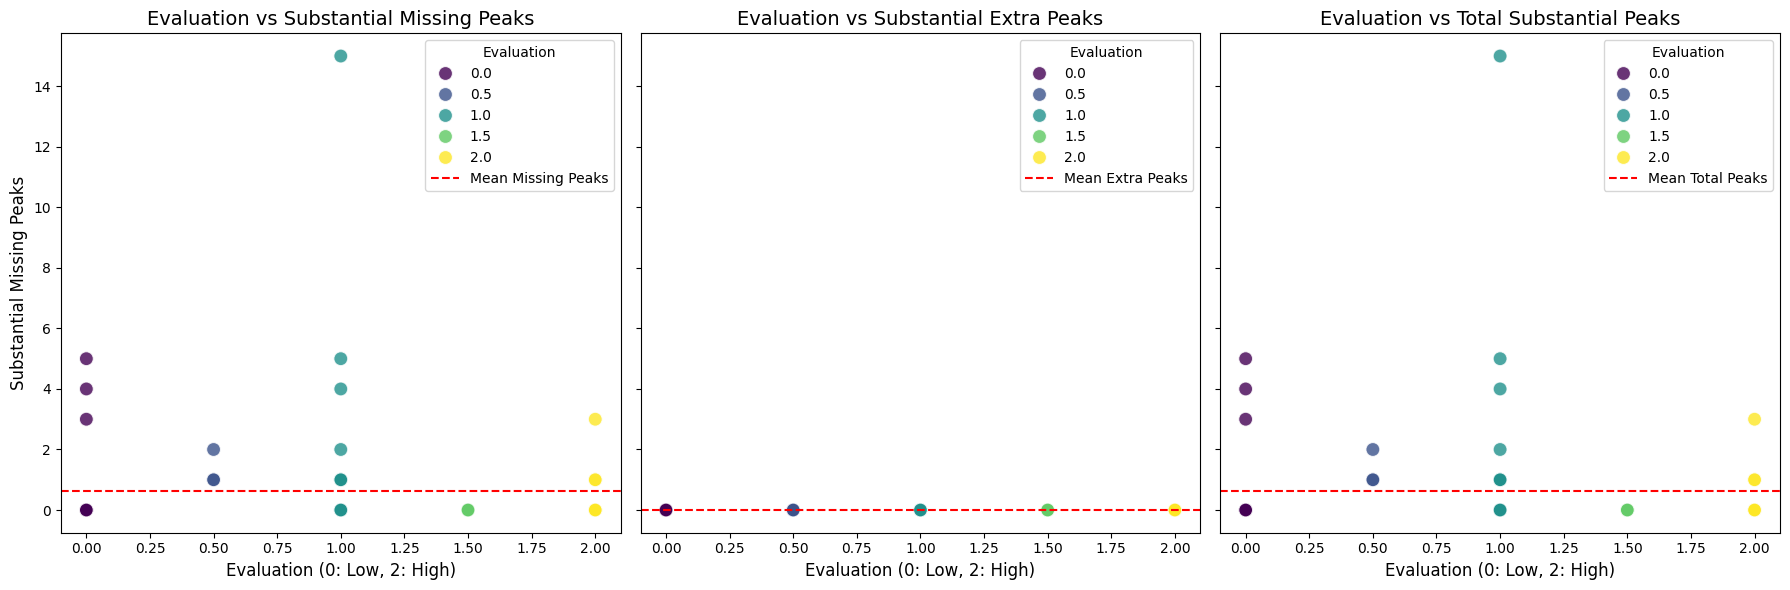

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for Substantial Peaks and Evaluation
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Scatter plot for Substantial Missing Peaks vs Evaluation
sns.scatterplot(
    x='Evaluation',
    y='Substantial Missing Peaks',
    data=df_rwp_with_tri,
    hue='Evaluation',
    palette='viridis',
    s=100,  # Adjust marker size
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("Evaluation vs Substantial Missing Peaks", fontsize=14)
axes[0].set_xlabel("Evaluation (0: Low, 2: High)", fontsize=12)
axes[0].set_ylabel("Substantial Missing Peaks", fontsize=12)
axes[0].axhline(y=df_rwp_with_tri['Substantial Missing Peaks'].mean(), color='red', linestyle='--', label='Mean Missing Peaks')
axes[0].legend(title="Evaluation")

# Scatter plot for Substantial Extra Peaks vs Evaluation
sns.scatterplot(
    x='Evaluation',
    y='Substantial Extra Peaks',
    data=df_rwp_with_tri,
    hue='Evaluation',
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Evaluation vs Substantial Extra Peaks", fontsize=14)
axes[1].set_xlabel("Evaluation (0: Low, 2: High)", fontsize=12)
axes[1].axhline(y=df_rwp_with_tri['Substantial Extra Peaks'].mean(), color='red', linestyle='--', label='Mean Extra Peaks')
axes[1].legend(title="Evaluation")

# Scatter plot for Total Substantial Peaks vs Evaluation
sns.scatterplot(
    x='Evaluation',
    y='Total Substantial Peaks',
    data=df_rwp_with_tri,
    hue='Evaluation',
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=axes[2]
)
axes[2].set_title("Evaluation vs Total Substantial Peaks", fontsize=14)
axes[2].set_xlabel("Evaluation (0: Low, 2: High)", fontsize=12)
axes[2].axhline(y=df_rwp_with_tri['Total Substantial Peaks'].mean(), color='red', linestyle='--', label='Mean Total Peaks')
axes[2].legend(title="Evaluation")

plt.tight_layout()
plt.show()


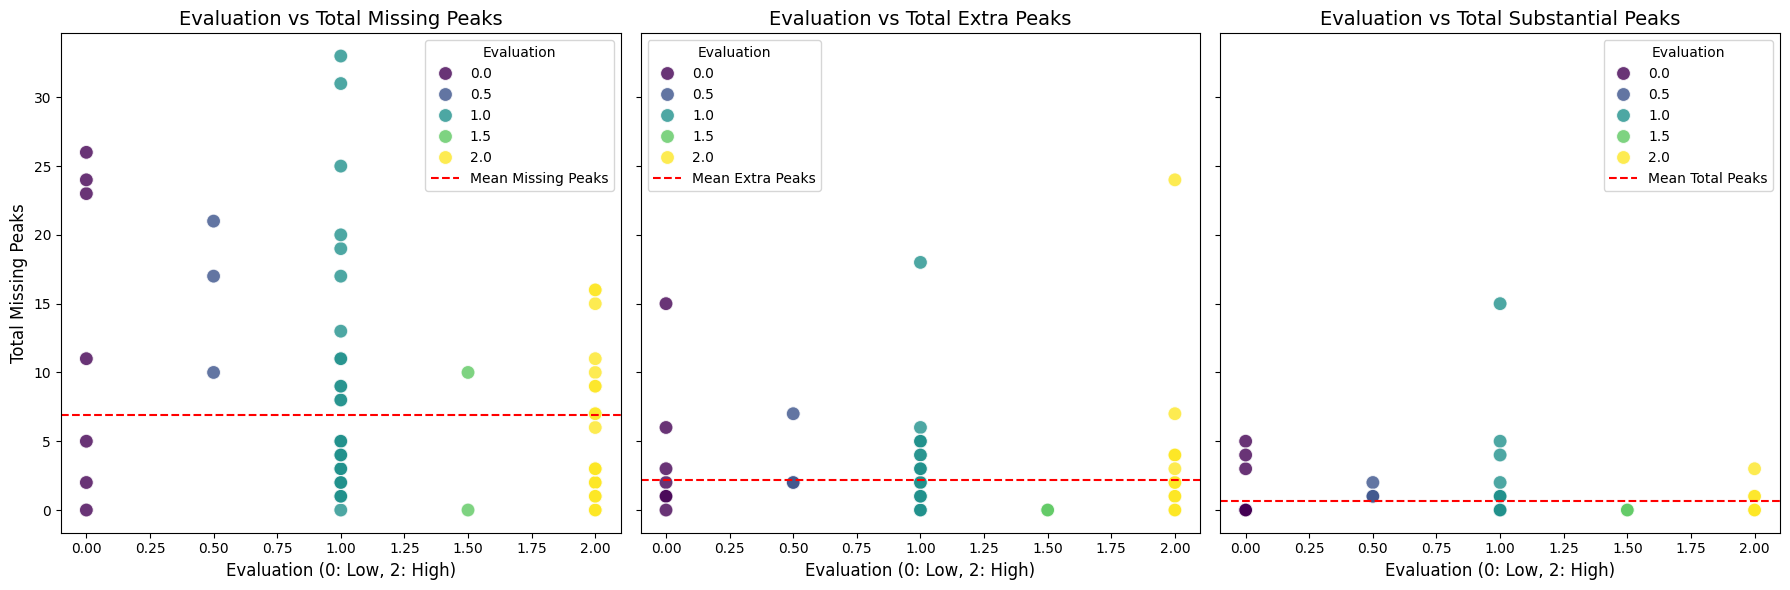

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for Substantial Peaks and Evaluation
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Scatter plot for Substantial Missing Peaks vs Evaluation
sns.scatterplot(
    x='Evaluation',
    y='Total Missing Peaks',
    data=df_rwp_with_tri,
    hue='Evaluation',
    palette='viridis',
    s=100,  # Adjust marker size
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("Evaluation vs Total Missing Peaks", fontsize=14)
axes[0].set_xlabel("Evaluation (0: Low, 2: High)", fontsize=12)
axes[0].set_ylabel("Total Missing Peaks", fontsize=12)
axes[0].axhline(y=df_rwp_with_tri['Total Missing Peaks'].mean(), color='red', linestyle='--', label='Mean Missing Peaks')
axes[0].legend(title="Evaluation")

# Scatter plot for Substantial Extra Peaks vs Evaluation
sns.scatterplot(
    x='Evaluation',
    y='Total Extra Peaks',
    data=df_rwp_with_tri,
    hue='Evaluation',
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Evaluation vs Total Extra Peaks", fontsize=14)
axes[1].set_xlabel("Evaluation (0: Low, 2: High)", fontsize=12)
axes[1].axhline(y=df_rwp_with_tri['Total Extra Peaks'].mean(), color='red', linestyle='--', label='Mean Extra Peaks')
axes[1].legend(title="Evaluation")

# Scatter plot for Total Substantial Peaks vs Evaluation
sns.scatterplot(
    x='Evaluation',
    y='Total Substantial Peaks',
    data=df_rwp_with_tri,
    hue='Evaluation',
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=axes[2]
)
axes[2].set_title("Evaluation vs Total Substantial Peaks", fontsize=14)
axes[2].set_xlabel("Evaluation (0: Low, 2: High)", fontsize=12)
axes[2].axhline(y=df_rwp_with_tri['Total Substantial Peaks'].mean(), color='red', linestyle='--', label='Mean Total Peaks')
axes[2].legend(title="Evaluation")

plt.tight_layout()
plt.show()


In [58]:
# Group samples with the same values into hoverable text
import plotly.express as px
def create_hover_text(grouped_data):
    grouped_data = grouped_data.groupby(['Evaluation', 'Substantial Missing Peaks'])['Name'].apply(
        lambda x: '<br>'.join('<br>'.join(x[i:i+2]) for i in range(0, len(x), 2))
    ).reset_index(name='Hover Text')
    return grouped_data

# Merge hover text for missing peaks
missing_hover = create_hover_text(df_rwp_with_tri[['Evaluation', 'Substantial Missing Peaks', 'Name']])


# Group data by Evaluation and Substantial Missing Peaks, concatenate names
grouped_missing = df_rwp_with_tri.groupby(['Evaluation', 'Substantial Missing Peaks'])['Name'].apply(
    lambda names: '<br>'.join('<br>'.join(names[i:i+2]) for i in range(0, len(names), 2))
).reset_index(name='Hover Text Sub Missing')

# Merge back to original DataFrame
df_rwp_with_tri = df_rwp_with_tri.merge(grouped_missing, on=['Evaluation', 'Substantial Missing Peaks'], how='left')

# Scatter plot for Substantial Missing Peaks
fig_missing = px.scatter(
    df_rwp_with_tri,
    x='Evaluation',
    y='Substantial Missing Peaks',
    color='Evaluation',
    title="Evaluation vs Substantial Missing Peaks",
    labels={'Evaluation': 'Evaluation (0: Low, 2: High)', 'Substantial Missing Peaks': 'Substantial Missing Peaks'}
)

# Customize hover text to show all names on the same dot
fig_missing.update_traces(
    marker=dict(size=10, opacity=0.8),  # Adjust marker size and opacity
    hovertemplate="<b>Evaluation:</b> %{x}<br>" +
                  "<b>Substantial Missing Peaks:</b> %{y}<br>" +
                  "<b>Name:</b> %{customdata}<extra></extra>",
    customdata=df_rwp_with_tri['Hover Text Sub Missing']  # Pass concatenated names to hover
)

# Repeat the same logic for Substantial Extra Peaks
grouped_extra = df_rwp_with_tri.groupby(['Evaluation', 'Substantial Extra Peaks'])['Name'].apply(
    lambda names: '<br>'.join('<br>'.join(names[i:i+2]) for i in range(0, len(names), 2))
).reset_index(name='Hover Text Sub Extra')

# Merge back to original DataFrame
df_rwp_with_tri = df_rwp_with_tri.merge(grouped_extra, on=['Evaluation', 'Substantial Extra Peaks'], how='left')

fig_extra = px.scatter(
    df_rwp_with_tri,
    x='Evaluation',
    y='Substantial Extra Peaks',
    color='Evaluation',
    title="Evaluation vs Substantial Extra Peaks",
    labels={'Evaluation': 'Evaluation (0: Low, 2: High)', 'Substantial Extra Peaks': 'Substantial Extra Peaks'}
)

# Customize hover text for Extra Peaks
fig_extra.update_traces(
    marker=dict(size=10, opacity=0.8),  # Adjust marker size and opacity
    hovertemplate="<b>Evaluation:</b> %{x}<br>" +
                  "<b>Substantial Extra Peaks:</b> %{y}<br>" +
                  "<b>Name:</b> %{customdata}<extra></extra>",
    customdata=df_rwp_with_tri['Hover Text Sub Extra']  # Pass concatenated names to hover
)

# Show plots
fig_missing.show()
fig_extra.show()


In [59]:
# Save the scatter plot for Substantial Missing Peaks to an HTML file
fig_missing.write_html("evaluation_vs_sub_missing_peaks.html")

# Save the scatter plot for Substantial Extra Peaks to an HTML file
fig_extra.write_html("evaluation_vs_sub_extra_peaks.html")

In [60]:
# Group samples with the same values into hoverable text
import plotly.express as px
def create_hover_text(grouped_data):
    grouped_data = grouped_data.groupby(['Evaluation', 'Total Missing Peaks'])['Name'].apply(
        lambda x: '<br>'.join('<br>'.join(x[i:i+2]) for i in range(0, len(x), 2))
    ).reset_index(name='Hover Text')
    return grouped_data

# Merge hover text for missing peaks
missing_hover = create_hover_text(df_rwp_with_tri[['Evaluation', 'Total Missing Peaks', 'Name']])


# Group data by Evaluation and Substantial Missing Peaks, concatenate names
grouped_missing = df_rwp_with_tri.groupby(['Evaluation', 'Total Missing Peaks'])['Name'].apply(
    lambda names: '<br>'.join('<br>'.join(names[i:i+2]) for i in range(0, len(names), 2))
).reset_index(name='Hover Text Missing')

# Merge back to original DataFrame
df_rwp_with_tri = df_rwp_with_tri.merge(grouped_missing, on=['Evaluation', 'Total Missing Peaks'], how='left')

# Scatter plot for Substantial Missing Peaks
fig_missing = px.scatter(
    df_rwp_with_tri,
    x='Evaluation',
    y='Total Missing Peaks',
    color='Evaluation',
    title="Evaluation vs Total Missing Peaks",
    labels={'Evaluation': 'Evaluation (0: Low, 2: High)', 'Total Missing Peaks': 'Total Missing Peaks'}
)

# Customize hover text to show all names on the same dot
fig_missing.update_traces(
    marker=dict(size=10, opacity=0.8),  # Adjust marker size and opacity
    hovertemplate="<b>Evaluation:</b> %{x}<br>" +
                  "<b>Total Missing Peaks:</b> %{y}<br>" +
                  "<b>Name:</b> %{customdata}<extra></extra>",
    customdata=df_rwp_with_tri['Hover Text Missing']  # Pass concatenated names to hover
)

# Repeat the same logic for Substantial Extra Peaks
grouped_extra = df_rwp_with_tri.groupby(['Evaluation', 'Total Extra Peaks'])['Name'].apply(
    lambda names: '<br>'.join('<br>'.join(names[i:i+2]) for i in range(0, len(names), 2))
).reset_index(name='Hover Text Extra')

# Merge back to original DataFrame
df_rwp_with_tri = df_rwp_with_tri.merge(grouped_extra, on=['Evaluation', 'Total Extra Peaks'], how='left')

fig_extra = px.scatter(
    df_rwp_with_tri,
    x='Evaluation',
    y='Total Extra Peaks',
    color='Evaluation',
    title="Evaluation vs Total Extra Peaks",
    labels={'Evaluation': 'Evaluation (0: Low, 2: High)', 'Total Extra Peaks': 'Total Extra Peaks'}
)

# Customize hover text for Extra Peaks
fig_extra.update_traces(
    marker=dict(size=10, opacity=0.8),  # Adjust marker size and opacity
    hovertemplate="<b>Evaluation:</b> %{x}<br>" +
                  "<b>Total Extra Peaks:</b> %{y}<br>" +
                  "<b>Name:</b> %{customdata}<extra></extra>",
    customdata=df_rwp_with_tri['Hover Text Extra']  # Pass concatenated names to hover
)

# Show plots
fig_missing.show()
fig_extra.show()


In [61]:
# Save the scatter plot for Substantial Missing Peaks to an HTML file
fig_missing.write_html("evaluation_vs_total_missing_peaks.html")

# Save the scatter plot for Substantial Extra Peaks to an HTML file
fig_extra.write_html("evaluation_vs_total_extra_peaks.html")

# Composition balance

In [62]:
df_rwp_with_tri.columns

Index(['Name', 'FW ID', 'XRD DARA RWP', 'DARA Phases', 'Weight fraction',
       'Search Results', 'Grouped Phases', 'Run Name in ALAB_Run_Name_in_ALAB',
       'Target', 'Precursors', 'Temperature (C)', 'Dwell Duration (h)',
       'Furnace', 'Missing peaks', 'Extra peaks', 'Max Intensity',
       'Standardized_Name', 'extra_peaks', 'missing_peaks',
       'Run Name in ALAB_Name', 'Target_Name', 'Precursors_Name',
       'Temperature (C)_Name', 'Dwell Duration (h)_Name', 'Furnace_Name',
       'Evaluation', 'Total Missing Peaks', 'Total Extra Peaks',
       'Intensity Threshold', 'Substantial Missing Peaks',
       'Substantial Extra Peaks', 'Total Substantial Peaks',
       'Hover Text Sub Missing', 'Hover Text Sub Extra', 'Hover Text Missing',
       'Hover Text Extra'],
      dtype='object')

In [63]:
len(df_rwp_with_tri)

81

In [64]:
import pandas as pd
import re
import ast  # For safely evaluating string representations of lists/dicts

# Helper function to extract unique chemical elements from formulas
def extract_elements(formulas):
    elements = set()
    for formula in formulas:
        matches = re.findall(r'[A-Z][a-z]*', formula)  # Regex for chemical elements
        elements.update(matches)
    return list(elements)

# Updated function to handle string formats in 'DARA Phases' and 'Search Results'
def process_elements(df):
    input_elements_list = []
    target_elements_list = []
    output_elements_list = []
    
    for _, row in df.iterrows():
        # Input elements: Extract from precursors
        precursors = row['Precursors_Name']
        input_elements = extract_elements([precursors]) if isinstance(precursors, str) else []
        
        # Target elements: Extract from target
        target = row['Target_Name']
        target_elements = extract_elements([target]) if isinstance(target, str) else []
        
        # Output elements: Extract from DARA Phases and Search Results
        output_elements = []
        
        # Parse 'DARA Phases'
        dara_phases = row['DARA Phases']
        if isinstance(dara_phases, str):
            try:
                dara_phases_list = ast.literal_eval(dara_phases)  # Convert string to list
                if isinstance(dara_phases_list, list):
                    for phase in dara_phases_list:
                        formula = phase.split('_')[0]  # Extract formula part
                        output_elements.extend(extract_elements([formula]))
            except (ValueError, SyntaxError):
                pass  # If the string is not a valid serialized list, skip
        
        # # Parse 'Search Results'
        # search_results = row['Search Results']
        # if isinstance(search_results, str):
        #     try:
        #         search_results_dict = ast.literal_eval(search_results)  # Convert string to dict
        #         if isinstance(search_results_dict, dict):
        #             for key in search_results_dict.keys():
        #                 formula = key.split('_')[0]  # Extract formula part
        #                 output_elements.extend(extract_elements([formula]))
        #     except (ValueError, SyntaxError):
        #         pass  # If the string is not a valid serialized dict, skip
        
        # Ensure uniqueness in output elements
        output_elements = list(set(output_elements))
        
        input_elements_list.append(input_elements)
        target_elements_list.append(target_elements)
        output_elements_list.append(output_elements)
    
    df['Input Elements'] = input_elements_list
    df['Target Elements'] = target_elements_list
    df['Output Elements'] = output_elements_list
    
    return df


df_rwp_with_tri = process_elements(df_rwp_with_tri)

In [65]:
df_rwp_with_tri.head(9)

,Name,FW ID,XRD DARA RWP,DARA Phases,Weight fraction,Search Results,Grouped Phases,Run Name in ALAB_Run_Name_in_ALAB,Target,Precursors,...,Substantial Missing Peaks,Substantial Extra Peaks,Total Substantial Peaks,Hover Text Sub Missing,Hover Text Sub Extra,Hover Text Missing,Hover Text Extra,Input Elements,Target Elements,Output Elements
0,TRI-85,1433,9.73,['NaO2_58_(icsd_26583)-0'],{'NaO2_58_(icsd_26583)-0': 1.0},"[dict_keys(['NaO2_58_(icsd_26583)-0']), dict_k...","[[[[{'Na': 1.0, 'O': 2.0}, ['NaO2_58_(icsd_265...",TRI-85,NaVO2,"['Na', 'V', 'O']",...,5,0,5,TRI-85,TRI-85<br>TRI-81<br>TRI-105<br>TRI-104-REDO<br...,TRI-85,TRI-85<br>TRI-77<br>TRI-30,"[O, C, V, Na]","[O, V, Na]","[O, Na]"
1,TRI-87,767,18.04,['Ca2V2O7_2_(icsd_421266)-0'],{'Ca2V2O7_2_(icsd_421266)-0': 1.0},[dict_keys(['Ca2V2O7_2_(icsd_421266)-0'])],"[[[[{'Ca': 2.0, 'V': 2.0, 'O': 7.0}, ['Ca2V2O7...",TRI-87,CaVO2,"['Ca', 'V', 'O']",...,3,0,3,TRI-87,TRI-87<br>TRI-91<br>TRI-103-REDO<br>TRI-163<br...,TRI-87,TRI-87,"[O, C, V, Ca]","[O, V, Ca]","[O, V, Ca]"
2,TRI-81,853,4.93,"['LiV3O8_11_(icsd_16689)-0', 'Li2CO3_15_(icsd_...",{'LiV3O8_11_(icsd_16689)-0': 0.844741039792020...,"[dict_keys(['LiV3O8_11_(icsd_16689)-0', 'Li2CO...","[[[[{'Li': 1.0, 'V': 3.0, 'O': 8.0}, ['LiV3O8_...",TRI-81,LiVO2,"['Li', 'V', 'O']",...,0,0,0,TRI-81<br>TRI-105<br>TRI-101<br>TRI-100<br>TRI...,TRI-85<br>TRI-81<br>TRI-105<br>TRI-104-REDO<br...,TRI-81<br>TRI-101<br>TRI-179<br>TRI-177<br>TRI-28,TRI-81<br>TRI-101<br>TRI-100<br>TRI-103<br>TRI...,"[V, Li, C, O]","[O, Li, V]","[O, C, V, Li]"
3,TRI-106,1064,15.21,"['V2O3_167_(icsd_1869)-0', 'C1.9992O1.9992_194...",{'V2O3_167_(icsd_1869)-0': 0.43893680744096547...,"[dict_keys(['V2O3_167_(icsd_1869)-0', 'C1.9992...","[[[[{'V': 2.0, 'O': 3.0}, ['V2O3_167_(icsd_186...",TRI-106,Na1V1C1,"['Na', 'V', 'C']",...,2,0,2,TRI-106,TRI-106<br>TRI-94<br>TRI-132,TRI-106,TRI-106<br>TRI-132,"[O, C, V, Na]","[O, V, Na]","[O, C, V]"
4,TRI-94,869,19.51,"['KV4O10_63_(icsd_67595)-26', 'VO2_14_(icsd_60...",{'C1.9992O1.9992_194_(icsd_37237)-None': 0.404...,"[dict_keys(['KV4O10_63_(icsd_67595)-26', 'VO2_...","[[[[{'K': 1.0, 'V': 4.0, 'O': 10.0}, ['KV4O10_...",TRI-94,NaVO3,"['Na', 'V', 'O']",...,1,0,1,TRI-94<br>TRI-132,TRI-106<br>TRI-94<br>TRI-132,TRI-94,TRI-94,"[K, O, C, V]","[K, O, V]","[K, O, C, V]"
5,TRI-83,861,4.81,"['K2V3O8_100_(icsd_70527)-0', 'KVO3_57_(icsd_1...","{'KVO3_57_(icsd_1486)-0': 0.5181481148817949, ...","[dict_keys(['K2V3O8_100_(icsd_70527)-0', 'KVO3...","[[[[{'K': 2.0, 'V': 3.0, 'O': 8.0}, ['K2V3O8_1...",TRI-83,KVO2,"['K', 'V', 'O']",...,0,0,0,TRI-83<br>TRI-84<br>TRI-86<br>TRI-134_0e50649b...,TRI-83<br>TRI-84<br>TRI-86<br>TRI-104<br>TRI-1...,TRI-83<br>TRI-86<br>TRI-134_0e50649b-b98b-45f3...,TRI-83<br>TRI-84<br>TRI-134_0e50649b-b98b-45f3...,"[K, O, C, V]","[K, O, V]","[K, O, V]"
6,TRI-84,868,15.25,['K2V3O8_100_(icsd_70527)-0'],{'K2V3O8_100_(icsd_70527)-0': 1.0},[dict_keys(['K2V3O8_100_(icsd_70527)-0'])],"[[[[{'K': 2.0, 'V': 3.0, 'O': 8.0}, ['K2V3O8_1...",TRI-84,KVO2,"['K', 'V', 'O']",...,0,0,0,TRI-83<br>TRI-84<br>TRI-86<br>TRI-134_0e50649b...,TRI-83<br>TRI-84<br>TRI-86<br>TRI-104<br>TRI-1...,TRI-84<br>TRI-159,TRI-83<br>TRI-84<br>TRI-134_0e50649b-b98b-45f3...,"[K, O, C, V]","[K, O, V]","[K, O, V]"
7,TRI-86,1051,5.89,"['V2O3_167_(icsd_1869)-0', 'Na2CO3_12_(icsd_16...","{'V2O3_167_(icsd_1869)-0': 0.6154112636448237,...","[dict_keys(['V2O3_167_(icsd_1869)-0', 'Na2CO3_...","[[[[{'V': 2.0, 'O': 3.0}, ['V2O3_167_(icsd_186...",TRI-86,NaVO2,"['Na', 'V', 'O']",...,0,0,0,TRI-83<br>TRI-84<br>TRI-86<br>TRI-134_0e50649b...,TRI-83<br>TRI-84<br>TRI-86<br>TRI-104<br>TRI-1...,TRI-83<br>TRI-86<br>TRI-134_0e50649b-b98b-45f3...,TRI-86<br>TRI-155<br>TRI-162<br>TRI-178<br>TRI-62,"[O, C, V, Na]","[O, V, Na]","[O, C, V, Na]"
8,TRI-91,781,8.43,"['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_...",{'Ca5V3O13_176_(icsd_760148)-6': 0.47634897699...,"[dict_keys(['Ca5V3O13_176_(icsd_760148)-6', 'C...","[[[[{'Ca': 5.0, 'V': 3.0, 'O': 13.0}, ['Ca5V3O...",TRI-91,CaVO2,"['Ca', 'V', 'O']",...,0,0,0,TRI

In [66]:


# Function to calculate the composition balance score
def calculate_composition_balance_score(row):
    input_elements = set(row['Input Elements'])
    output_elements = set(row['Output Elements'])
    target_elements = set(row['Target Elements'])
    
    # Count mismatches
    missing_from_input = input_elements - output_elements
    # print("missing from input = ", missing_from_input)
    extra_in_output = output_elements - target_elements
    reconciled_by_target = missing_from_input & target_elements  # Missing elements reconciled by target
    problematic_missing = missing_from_input - output_elements  # Missing elements NOT in target
    problematic_extra = extra_in_output - target_elements  # Extra elements NOT in target
    problematic_extra = problematic_extra - input_elements
    # print("extra_in_output = ", extra_in_output)
    # print("reconciled_by_target", reconciled_by_target)
    # print("problematic_missing", problematic_missing)
    # print("problematic_extra", problematic_extra)
    # Calculate penalties
    total_target_size = len(target_elements) if target_elements else 1  # Avoid division by zero
    missing_penalty = len(reconciled_by_target) / total_target_size
    # print("total_target_size ", total_target_size, "missing penalty ", missing_penalty)
    total_output_size = len(output_elements) if output_elements else 1
    extra_penalty = len(problematic_extra) / total_output_size
    # print("total_output_size ", total_output_size, "extra penalty ", extra_penalty)
    # Score logic: 1 - weighted penalties
    score = 1 - (missing_penalty + extra_penalty)
    
    # Ensure score is within [0, 1]
    return max(0, min(1, score))

# Apply the score calculation to the dataframe
df_rwp_with_tri['Composition Balance Score'] = df_rwp_with_tri.apply(calculate_composition_balance_score, axis=1)


In [67]:
min(df_rwp_with_tri['Composition Balance Score'])

0.6666666666666667

In [68]:
import plotly.express as px
import pandas as pd

# Helper function to wrap names into multiple lines (2 names per line)
def wrap_names(names):
    name_list = names.split(', ')
    grouped_lines = ['<br>'.join(name_list[i:i+2]) for i in range(0, len(name_list), 2)]
    return '<br>'.join(grouped_lines)

# Group all sample names with the same Evaluation and Composition Balance Score
df_rwp_with_tri['Grouped Names'] = df_rwp_with_tri.groupby(
    ['Evaluation', 'Composition Balance Score']
)['Name'].transform(lambda x: ', '.join(x))

# Wrap the grouped names into a multi-line format (2 names per line)
df_rwp_with_tri['Grouped Names (Wrapped)'] = df_rwp_with_tri['Grouped Names'].apply(wrap_names)

# Create an interactive scatter plot
# Create an interactive scatter plot
fig = px.scatter(
    df_rwp_with_tri,
    x='Evaluation',  # Evaluation on the x-axis
    y='Composition Balance Score',  # Composition on the y-axis
    color='Evaluation',  # Color points by Evaluation
    hover_data={
        'Grouped Names (Wrapped)': True,  # Display wrapped names
        'Composition Balance Score': ':.2f',  # Show score with 2 decimal places
        'Evaluation': True,  # Show Evaluation
    },
    title='Impact of Evaluation on Composition Balance Score',
    labels={
        'Evaluation': 'Evaluation',
        'Composition Balance Score': 'Composition Balance Score',
    },
)

# Make markers larger
fig.update_traces(marker=dict(size=13))  # Set marker size (default is smaller)

# Adjust plot scale (smaller range for axes)
fig.update_layout(
    xaxis=dict(title='Evaluation', automargin=True, dtick=1, tickangle=0),  # Adjust x-axis ticks and angle
    yaxis=dict(title='Composition Balance Score', automargin=True, range=[-0.05, 1.05]),  # Y-axis range between 0 and 1
    template='plotly_white',
    legend_title='Evaluation',
)

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",  # Background color of the hover box
        font_size=15,     # Font size
        font_family="Arial",  # Font family
        align="left",     # Align text to the left
    )
)

# Show the interactive plot
fig.show()
# Save the plot as an interactive HTML file
fig.write_html("interactive_scatter_plot.html")

# Output location message
print("Plot saved as interactive_scatter_plot.html")

Plot saved as interactive_scatter_plot.html


In [69]:
filtered_rows = df_rwp_with_tri[df_rwp_with_tri['Name'] == "TRI-84"]
filtered_rows['Total Missing Peaks']
# print(df_rwp_with_tri['Name'])

6    16
Name: Total Missing Peaks, dtype: int64

In [70]:
import unittest

class TestCompositionBalanceScore(unittest.TestCase):
    def setUp(self):
        # This method sets up any data needed for the tests
        self.test_cases = [
            # Perfect match: Input = Output
            {
                "input_elements": ["Ca", "V", "O"],
                "output_elements": ["Ca", "V", "O"],
                "target_elements": ["Ca", "V", "O"],
                "expected_score": 1.0
            },
            # Missing elements but reconciled by target
            {
                "input_elements": ["Na", "C", "V", "O"],
                "output_elements": ["Na", "V"],
                "target_elements": ["Na", "V"],
                "expected_score": 1.0
            },
            # Missing elements, not reconciled by target
            {
                "input_elements": ["Ca", "C", "V", "O"],
                "output_elements": ["O", "V"],
                "target_elements": ["Ca", "O","V"],
                "expected_score": 0.6666666666666667
            },
            # Extra elements, not in target
            {
                "input_elements":  ["Ca", "C", "V", "O"],
                "output_elements": [ "O","C","Ca"],
                "target_elements": ["Ca", "O","V"],
                "expected_score": 0.6666666666666667
            },
            # Mixed missing and extra elements
            {
                "input_elements": ["Na", "C", "V"],
                "output_elements": ["Na", "V", "Li"],
                "target_elements": ["Na", "C", "V"],
                "expected_score": 0.33333333333333337  # Example weighted score
            },
            # No input or output elements
            {
                "input_elements": [],
                "output_elements": [],
                "target_elements": [],
                "expected_score": 0.0  
            }
        ]
    
if __name__ == "__main__":
    unittest.main(argv=[''], verbosity=2, exit=False)


----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


In [71]:
from pymatgen.core.composition import Composition
import ast
def remove_elements_from_composition(target, elements_to_remove):
    # Parse the composition
    composition = Composition(target)

    # Create a new composition dictionary without the unwanted elements
    filtered_composition = {
        el: amt for el, amt in composition.get_el_amt_dict().items() if el not in elements_to_remove
    }

    # Create a new Composition object from the filtered dictionary
    new_composition = Composition(filtered_composition)

    # Return the updated formula as a compact string (remove spaces)
    return new_composition.formula.replace("1", "").replace(" ", "")


def normalize_composition(target):

    # Create a new Composition object from the filtered dictionary
    new_composition = Composition(target)
    # Normalize the composition to get fractional values
    normalized_composition = new_composition.fractional_composition

    # Format the normalized composition as a string
    normalized_formula = normalized_composition.formula.replace(" ", "")
    
    return normalized_formula

# Updated function to handle string formats in 'DARA Phases' and 'Search Results'
def process_elements(df):
    target_list = []
    output_list = []
    
    for _, row in df.iterrows():
        # Input elements: Extract from precursors
        input = row['Precursors_Name']
        print("Input: ",input)
        # Target elements: Extract from target
        target = row['Target_Name']
        print("Target: ", target)
        elements_to_remove = ["O", "C", "N", "H"]

        cleaned_target = remove_elements_from_composition(target, elements_to_remove)
        normalized_target = normalize_composition(cleaned_target)
        print("Normalized target: ", normalized_target)
        # Output elements: Extract from DARA Phases and Search Results
        # Extract dara phases from the row
        dara_phases = row['DARA Phases']
        output = []
        
        # Parse dara_phases string into a list of formulas
        if isinstance(dara_phases, str):
            try:
                dara_phases_list = ast.literal_eval(dara_phases)
                if isinstance(dara_phases_list, list):
                    for phase in dara_phases_list:
                        formula = phase.split('_')[0]  # Extract formula part
                        output.append(formula)
            except (ValueError, SyntaxError):
                pass  # Skip invalid serialized lists

        # Extract weight fractions from the row
        weight_fractions = row['Weight fraction']
        weights = []
        try:
            weight_fractions_dict = ast.literal_eval(weight_fractions)
            weights = [
                weight_fractions_dict.get(phase, 0) * 100 for phase in dara_phases_list
            ]
        except (ValueError, SyntaxError):
            pass  # Skip invalid serialized dicts
        print("Output: ", output, "weights: ", weights)
        # Convert formulas to stoichiometric compositions and remove unwanted elements
        normalized_compositions = []
        for formula, weight in zip(output, weights):
            try:
                # Parse the formula into a Composition object
                composition = Composition(formula)

                # Remove unwanted elements
                filtered_composition = {
                    el: amt for el, amt in composition.get_el_amt_dict().items()
                    if el not in elements_to_remove
                }

                # Normalize the filtered composition
                normalized_composition = Composition(filtered_composition).fractional_composition
                # Multiply normalized composition by the weight
                normalized_compositions.append(
                    {el: amt * (weight / 100) for el, amt in normalized_composition.items()}
                )
            except Exception as e:
                print(f"Error processing formula {formula}: {e}")

        # Combine all normalized compositions into a single composition
        combined_composition = {}
        for composition in normalized_compositions:
            for el, amt in composition.items():
                combined_composition[el] = combined_composition.get(el, 0) + amt

        # Normalize the combined composition to ensure the sum of elements adds to 1
        total = sum(combined_composition.values())
        final_composition = {el: round(amt / total, 2) for el, amt in combined_composition.items()}
        # Format the final composition as a pretty string
        final_composition_str = Composition(final_composition).to_pretty_string()
        print("Normalized output: ", final_composition_str)
        print("+++++++++++++++++++++++++++")

    
        target_list.append(normalized_target)
        output_list.append(final_composition_str)
    
    df['Normalized Target'] = target_list
    df['Normalized Output'] = output_list
    return df

df_rwp_with_tri= process_elements(df_rwp_with_tri)

Input:  ['Na2CO3', 'V2O5']
Target:  NaVO2
Normalized target:  Na0.5V0.5
Output:  ['NaO2'] weights:  [100.0]
Normalized output:  Na1
+++++++++++++++++++++++++++
Input:  ['CaCO3', 'V2O5']
Target:  CaVO2
Normalized target:  Ca0.5V0.5
Output:  ['Ca2V2O7'] weights:  [100.0]
Normalized output:  Ca0.5V0.5
+++++++++++++++++++++++++++
Input:  ['Li2CO3', 'V2O5']
Target:  LiVO2
Normalized target:  Li0.5V0.5
Output:  ['LiV3O8', 'Li2CO3'] weights:  [84.47410397920204, 15.525896020797958]
Normalized output:  Li0.37V0.63
+++++++++++++++++++++++++++
Input:  ['Na2CO3', 'V2O5', 'C (carbon black)']
Target:  NaVO2
Normalized target:  Na0.5V0.5
Output:  ['V2O3', 'C1.9992O1.9992', 'C'] weights:  [43.89368074409655, 30.909659633013753, 25.196659622889705]
Normalized output:  V1
+++++++++++++++++++++++++++
Input:  ['K2CO3', 'V2O3']
Target:  KVO2
Normalized target:  K0.5V0.5
Output:  ['KV4O10', 'VO2', 'C', 'K2O', 'C1.9992O1.9992'] weights:  [31.908212363856425, 19.414801153249797, 4.2040049724056985, 4.0428283

In [72]:
df_rwp_with_tri.head(5)

,Name,FW ID,XRD DARA RWP,DARA Phases,Weight fraction,Search Results,Grouped Phases,Run Name in ALAB_Run_Name_in_ALAB,Target,Precursors,...,Hover Text Missing,Hover Text Extra,Input Elements,Target Elements,Output Elements,Composition Balance Score,Grouped Names,Grouped Names (Wrapped),Normalized Target,Normalized Output
0,TRI-85,1433,9.73,['NaO2_58_(icsd_26583)-0'],{'NaO2_58_(icsd_26583)-0': 1.0},"[dict_keys(['NaO2_58_(icsd_26583)-0']), dict_k...","[[[[{'Na': 1.0, 'O': 2.0}, ['NaO2_58_(icsd_265...",TRI-85,NaVO2,"['Na', 'V', 'O']",...,TRI-85,TRI-85<br>TRI-77<br>TRI-30,"[O, C, V, Na]","[O, V, Na]","[O, Na]",0.666667,"TRI-85, TRI-104-REDO, TRI-103",TRI-85<br>TRI-104-REDO<br>TRI-103,Na0.5V0.5,Na1
1,TRI-87,767,18.04,['Ca2V2O7_2_(icsd_421266)-0'],{'Ca2V2O7_2_(icsd_421266)-0': 1.0},[dict_keys(['Ca2V2O7_2_(icsd_421266)-0'])],"[[[[{'Ca': 2.0, 'V': 2.0, 'O': 7.0}, ['Ca2V2O7...",TRI-87,CaVO2,"['Ca', 'V', 'O']",...,TRI-87,TRI-87,"[O, C, V, Ca]","[O, V, Ca]","[O, V, Ca]",1.000000,"TRI-87, TRI-91, TRI-103-REDO, TRI-82, TRI-41, ...",TRI-87<br>TRI-91<br>TRI-103-REDO<br>TRI-82<br>...,Ca0.5V0.5,Ca0.5V0.5
2,TRI-81,853,4.93,"['LiV3O8_11_(icsd_16689)-0', 'Li2CO3_15_(icsd_...",{'LiV3O8_11_(icsd_16689)-0': 0.844741039792020...,"[dict_keys(['LiV3O8_11_(icsd_16689)-0', 'Li2CO...","[[[[{'Li': 1.0, 'V': 3.0, 'O': 8.0}, ['LiV3O8_...",TRI-81,LiVO2,"['Li', 'V', 'O']",...,TRI-81<br>TRI-101<br>TRI-179<br>TRI-177<br>TRI-28,TRI-81<br>TRI-101<br>TRI-100<br>TRI-103<br>TRI...,"[V, Li, C, O]","[O, Li, V]","[O, C, V, Li]",1.000000,"TRI-81, TRI-105, TRI-101, TRI-100, TRI-99, TRI...",TRI-81<br>TRI-105<br>TRI-101<br>TRI-100<br>TRI...,Li0.5V0.5,Li0.37V0.63
3,TRI-106,1064,15.21,"['V2O3_167_(icsd_1869)-0', 'C1.9992O1.9992_194...",{'V2O3_167_(icsd_1869)-0': 0.43893680744096547...,"[dict_keys(['V2O3_167_(icsd_1869)-0', 'C1.9992...","[[[[{'V': 2.0, 'O': 3.0}, ['V2O3_167_(icsd_186...",TRI-106,Na1V1C1,"['Na', 'V', 'C']",...,TRI-106,TRI-106<br>TRI-132,"[O, C, V, Na]","[O, V, Na]","[O, C, V]",0.666667,TRI-106,TRI-106,Na0.5V0.5,V1
4,TRI-94,869,19.51,"['KV4O10_63_(icsd_67595)-26', 'VO2_14_(icsd_60...",{'C1.9992O1.9992_194_(icsd_37237)-None': 0.404...,"[dict_keys(['KV4O10_63_(icsd_67595)-26', 'VO2_...","[[[[{'K': 1.0, 'V': 4.0, 'O': 10.0}, ['KV4O10_...",TRI-94,NaVO3,"['Na', 'V', 'O']",...,TRI-94,TRI-94,"[K, O, C, V]","[K, O, V]","[K, O, C, V]",1.000000,"TRI-94, TRI-132",TRI-94<br>TRI-132,K0.5V0.5,K0.19V0.81


In [73]:
from pymatgen.core.composition import Composition

def calculate_composition_balance_score_refined(row):
    target_composition = Composition(row['Normalized Target'])
    output_composition = Composition(row['Normalized Output'])
    
    target_elements = target_composition.elements
    output_elements = output_composition.elements

    # Initialize penalties
    total_penalty = 0.0
    total_weight = 0.0

    # Calculate penalties for each element in the target
    for element in target_elements:
        target_amount = target_composition[element]
        output_amount = output_composition[element] if element in output_elements else 0.0
        difference = abs(target_amount - output_amount)
        
        # Scalable penalty: larger differences are penalized more
        if output_amount == 0.0:
            penalty = 1.0  # Maximum penalty for missing elements
        else:
            penalty = difference ** 2  # Quadratic penalty for differences

        total_penalty += penalty * target_amount
        total_weight += target_amount

    # Normalize penalties by the total weight of the target
    normalized_penalty = total_penalty / total_weight if total_weight > 0 else 1.0

    # Calculate the score
    score = 1 - normalized_penalty

    # Ensure the score is within [0, 1]
    return max(0, min(1, score))

In [74]:
# Apply the score calculation to the dataframe
df_rwp_with_tri['Composition Balance Score refined'] = df_rwp_with_tri.apply(calculate_composition_balance_score_refined, axis=1)

In [75]:
import plotly.express as px
import pandas as pd

# Helper function to wrap names into multiple lines (2 names per line)
def wrap_names(names):
    name_list = names.split(', ')
    grouped_lines = ['<br>'.join(name_list[i:i+2]) for i in range(0, len(name_list), 2)]
    return '<br>'.join(grouped_lines)

# Group all sample names with the same Evaluation and Composition Balance Score
df_rwp_with_tri['Grouped Names'] = df_rwp_with_tri.groupby(
    ['Evaluation', 'Composition Balance Score refined']
)['Name'].transform(lambda x: ', '.join(x))

# Wrap the grouped names into a multi-line format (2 names per line)
df_rwp_with_tri['Grouped Names (Wrapped)'] = df_rwp_with_tri['Grouped Names'].apply(wrap_names)

# Create an interactive scatter plot
# Create an interactive scatter plot
fig = px.scatter(
    df_rwp_with_tri,
    x='Evaluation',  # Evaluation on the x-axis
    y='Composition Balance Score refined',  # Composition on the y-axis
    color='Evaluation',  # Color points by Evaluation
    hover_data={
        'Grouped Names (Wrapped)': True,  # Display wrapped names
        'Composition Balance Score refined': ':.2f',  # Show score with 2 decimal places
        'Evaluation': True,  # Show Evaluation
    },
    title='Impact of Evaluation on Composition Balance Score',
    labels={
        'Evaluation': 'Evaluation',
        'Composition Balance Score': 'Composition Balance Score',
    },
)

# Make markers larger
fig.update_traces(marker=dict(size=13))  # Set marker size (default is smaller)

# Adjust plot scale (smaller range for axes)
fig.update_layout(
    xaxis=dict(title='Evaluation', automargin=True, dtick=0.5, tickangle=0),  # Adjust x-axis ticks and angle
    yaxis=dict(title='Composition Balance Score', automargin=True,  dtick=0.1,range=[-0.05, 1.05]),  # Y-axis range between 0 and 1
    template='plotly_white',
    legend_title='Evaluation',
)

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",  # Background color of the hover box
        font_size=15,     # Font size
        font_family="Arial",  # Font family
        align="left",     # Align text to the left
    )
)

# Show the interactive plot
fig.show()
# Save the plot as an interactive HTML file
fig.write_html("interactive_composition_balanced_plot_refined.html")

# Output location message
print("Plot saved as interactive_scatter_plot.html")

Plot saved as interactive_scatter_plot.html


In [76]:
filtered_rows = df_rwp_with_tri[df_rwp_with_tri['Name'] == "TRI-163"]
filtered_rows

,Name,FW ID,XRD DARA RWP,DARA Phases,Weight fraction,Search Results,Grouped Phases,Run Name in ALAB_Run_Name_in_ALAB,Target,Precursors,...,Hover Text Extra,Input Elements,Target Elements,Output Elements,Composition Balance Score,Grouped Names,Grouped Names (Wrapped),Normalized Target,Normalized Output,Composition Balance Score refined
48,TRI-163,792,21.67,"['CaCO3_2_(icsd_186772)-3', 'CaC2_2_(icsd_6666...","{'CaC2_2_(icsd_66663)-9': 0.2676613641328242, ...","[dict_keys(['CaCO3_2_(icsd_186772)-3', 'CaC2_2...","[[[[{'Ca': 1.0, 'C': 1.0, 'O': 3.0}, ['CaCO3_2...",TRI-163,CaVO2,"['Ca', 'V', 'O']",...,TRI-163,"[O, C, V, Ca]","[O, V, Ca]","[O, C, Ca]",0.666667,TRI-163,TRI-163,Ca0.5V0.5,Ca1,0.375


In [77]:
# Testing composiion balance:

In [78]:
from pymatgen.core.composition import Composition

def remove_elements_from_composition(target, elements_to_remove):
    """Remove specified elements from a composition."""
    composition = Composition(target)
    filtered_composition = {
        el: amt for el, amt in composition.get_el_amt_dict().items() if el not in elements_to_remove
    }
    new_composition = Composition(filtered_composition)
    return new_composition.formula.replace("1", "").replace(" ", "")

def normalize_composition(target):
    """Normalize a composition to its fractional representation."""
    new_composition = Composition(target)
    normalized_composition = new_composition.fractional_composition
    return normalized_composition.formula.replace(" ", "")
def process_phases(target, phases, weight_fractions):
    """
    Process phases and calculate the normalized compositions.

    Parameters:
        target (str): The target composition formula.
        phases (list): List of phase formulas.
        weight_fractions (list): List of corresponding weight fractions (must sum to 100%).

    Returns:
        dict: Normalized target and output compositions.
    """
    elements_to_remove = ["O", "C", "N", "H"]

    # Normalize target composition
    cleaned_target = remove_elements_from_composition(target, elements_to_remove)
    normalized_target = normalize_composition(cleaned_target)
    print("Normalized Target:", normalized_target)

    print("\nProcessing Phases:")
    normalized_compositions = []
    for formula, weight in zip(phases, weight_fractions):
        try:
            composition = Composition(formula)
            filtered_composition = {
                el: amt for el, amt in composition.get_el_amt_dict().items() if el not in elements_to_remove
            }
            normalized_composition = Composition(filtered_composition).fractional_composition

            # Multiply the normalized composition by the weight fraction
            weighted_composition = {el: amt * (weight / 100) for el, amt in normalized_composition.items()}
            # Multiply the normalized composition by the weight fraction and store it
            # weighted_composition = {el: (amt * weight) / 100 for el, amt in normalized_composition.items()}
            normalized_compositions.append(weighted_composition)
        except Exception as e:
            print(f"Error processing formula {formula}: {e}")

    # Combine all weighted compositions
    combined_composition = {}
    for composition in normalized_compositions:
        for el, amt in composition.items():
            combined_composition[el] = combined_composition.get(el, 0) + amt

    # Normalize to ensure total sum is 1
    total = sum(combined_composition.values())
    final_output_composition = {el: round(amt / total, 2) for el, amt in combined_composition.items()}

    final_composition_str = Composition(final_output_composition).to_pretty_string()

    print("Normalized Output Composition:", final_composition_str)

    return {
        "normalized_target": normalized_target,
        "normalized_output": final_composition_str
    }


def calculate_composition_balance_score(target, output):
    """
    Calculate the composition balance score based on the difference between target and output compositions.

    Parameters:
        target (str): Normalized target composition formula.
        output (str): Normalized output composition formula.

    Returns:
        float: Composition balance score (0 to 1).
    """
    target_composition = Composition(target)
    output_composition = Composition(output)

    target_elements = target_composition.elements
    output_elements = output_composition.elements

    total_penalty = 0.0
    total_weight = 0.0

    for element in target_elements:
        target_amount = target_composition[element]
        output_amount = output_composition[element] if element in output_elements else 0.0
        difference = abs(target_amount - output_amount)

        penalty = 1.0 if output_amount == 0.0 else difference ** 2
        total_penalty += penalty * target_amount
        total_weight += target_amount

    normalized_penalty = total_penalty / total_weight if total_weight > 0 else 1.0
    score = 1 - normalized_penalty
    return max(0, min(1, score))  # Ensure within [0,1]

# Example Usage
target_composition = "NaVO2"
phases = ["V2O3", "CO"]
weight_fractions = [59.18,40.82]  # Must sum to 100%

processed_data = process_phases(target_composition, phases, weight_fractions)
balance_score = calculate_composition_balance_score(processed_data["normalized_target"], processed_data["normalized_output"])

print("\nComposition Balance Score:", balance_score)

target_composition = "NaVO2"
phases = ["V2O3", "CO"]
weight_fractions = [58.66,41.33]  # Must sum to 100%

processed_data = process_phases(target_composition, phases, weight_fractions)
balance_score = calculate_composition_balance_score(processed_data["normalized_target"], processed_data["normalized_output"])

print("\nComposition Balance Score:", balance_score)


target_composition = "NaVO2"
phases = ["V2O3"]
weight_fractions = [100]  # Must sum to 100%

processed_data = process_phases(target_composition, phases, weight_fractions)
balance_score = calculate_composition_balance_score(processed_data["normalized_target"], processed_data["normalized_output"])

print("\nComposition Balance Score:", balance_score)

Normalized Target: Na0.5V0.5

Processing Phases:
Normalized Output Composition: V1

Composition Balance Score: 0.375
Normalized Target: Na0.5V0.5

Processing Phases:
Normalized Output Composition: V1

Composition Balance Score: 0.375
Normalized Target: Na0.5V0.5

Processing Phases:
Normalized Output Composition: V1

Composition Balance Score: 0.375


In [79]:

target_composition = "NaVO2"
phases = ['K2V3O8']
weight_fractions = [100]  # Must sum to 100%

processed_data = process_phases(target_composition, phases, weight_fractions)
balance_score = calculate_composition_balance_score(processed_data["normalized_target"], processed_data["normalized_output"])

print("\nComposition Balance Score I1:", balance_score)


# Processing Interpretation: I_1
# Raw Output Phases: ['K2V3O8_100_(icsd_70527)-0']
# Cleaned Output Phases: ['K2V3O8']
# Weight Fractions: [100.0]
# Normalized Output Composition: {Element K: 0.4, Element V: 0.6}
# The other normalised output composition:  K0.4V0.6
# Balance Score: 0.495

# Processing Interpretation: I_2
# Raw Output Phases: ['K2.84V6O16_100_(icsd_9324)-None', 'V2O5_11_(icsd_59960)-11', 'KV3O8_11_(icsd_421064)-0']
# Cleaned Output Phases: ['K10V21O57', 'V2O5', 'KV3O8']
# Weight Fractions: [62.94707333468581, 19.203699263746792, 17.84922740156739]
# Normalized Output Composition: {Element K: 0.25, Element V: 0.75}
# The other normalised output composition:  K0.25V0.75
# Balance Score: 0.46875

# Processing Interpretation: I_3
# Raw Output Phases: ['K2.84V6O16_100_(icsd_9324)-None', 'KV3O8_11_(icsd_421064)-0']
# Cleaned Output Phases: ['K10V21O57', 'KV3O8']
# Weight Fractions: [63.67738180050089, 36.32261819949912]
# Normalized Output Composition: {Element K: 0.3, Element V: 0.7}
# The other normalised output composition:  K0.3V0.7
# Balance Score: 0.48

# Processing Interpretation: I_4
# Raw Output Phases: ['KV3O8_11_(icsd_23975)-0']
# Cleaned Output Phases: ['KV3O8']
# Weight Fractions: [100.0]
# Normalized Output Composition: {Element K: 0.25, Element V: 0.75}
# The other normalised output composition:  K0.25V0.75
# Balance Score: 0.46875

Normalized Target: Na0.5V0.5

Processing Phases:
Normalized Output Composition: K0.4V0.6

Composition Balance Score I1: 0.495


In [80]:
filtered_rows = df_rwp_with_tri[df_rwp_with_tri['Name'] == "TRI-84"]
filtered_rows['Substantial Missing Peaks']

6    0
Name: Substantial Missing Peaks, dtype: int64

In [81]:
import plotly.express as px

# Create an interactive scatter plot with 4D representation
fig = px.scatter(
    df_rwp_with_tri,
    x="XRD DARA RWP",  # X-axis: Quantitative refinement metric
    y="Substantial Missing Peaks",  # Y-axis: Missing peak information
    size="Composition Balance Score refined",  # Marker size represents composition balance
    color="Evaluation",  # Color differentiates evaluation levels
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Substantial Missing Peaks": True,  # Show missing peak count
        "Evaluation": True,  # Show evaluation level
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Missing Peaks and XRD RWP on Composition Balance & Evaluation",
    labels={
        "XRD DARA RWP": "XRD DARA RWP Score",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "Composition Balance Score refined": "Composition Balance Score",
        "Evaluation": "Evaluation",
    },
)

# Adjust marker size scaling
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Composition Balance Score refined"])/(40.**2)))

# Adjust layout
fig.update_layout(
    xaxis=dict(title="XRD DARA RWP Score", automargin=True, tickangle=0),  
    yaxis=dict(title="Substantial Missing Peaks", automargin=True),  
    template="plotly_white",
    legend_title="Evaluation",
)

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_missing_peaks_xrd_rwp.html")

print("Plot saved as interactive_missing_peaks_xrd_rwp.html")

Plot saved as interactive_missing_peaks_xrd_rwp.html


In [84]:
import plotly.express as px

# Create an interactive scatter plot with 4D representation
fig = px.scatter(
    df_rwp_with_tri,
    x="XRD DARA RWP",  # X-axis: Quantitative refinement metric
    y="Substantial Missing Peaks",  # Y-axis: Missing peak information
    color="Composition Balance Score refined",  # Marker size represents composition balance
    size="Evaluation",  # Color differentiates evaluation levels
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Substantial Missing Peaks": True,  # Show missing peak count
        "Evaluation": True,  # Show evaluation level
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Missing Peaks and XRD RWP on Composition Balance & Evaluation",
    labels={
        "XRD DARA RWP": "XRD DARA RWP Score",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "Composition Balance Score refined": "Composition Balance Score",
        "Evaluation": "Evaluation",
    },
)

# Adjust marker size scaling
# fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Composition Balance Score refined"])/(40.**2)))
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Evaluation"])/(40.**2)))

# Adjust layout
fig.update_layout(
    xaxis=dict(title="XRD DARA RWP Score", automargin=True, tickangle=0),  
    yaxis=dict(title="Substantial Missing Peaks", automargin=True),  
    template="plotly_white",
    legend_title="Evaluation",
)

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
# fig.write_html("interactive_missing_peaks_xrd_rwp.html")

# print("Plot saved as interactive_missing_peaks_xrd_rwp.html")

In [197]:
import plotly.express as px

# Create an interactive scatter plot with Evaluation on the x-axis
fig = px.scatter(
    df_rwp_with_tri,
    x="Evaluation",  # X-axis: Evaluation positions
    y="Substantial Missing Peaks",  # Y-axis: Missing peak information
    size="XRD DARA RWP",  # Marker size represents RWP score
    color="Composition Balance Score refined",  # Color differentiates balance score
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "Evaluation": True,  # Show evaluation level
        "Substantial Missing Peaks": True,  # Show missing peak count
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Evaluation on Missing Peaks and XRD RWP",
    labels={
        "Evaluation": "Evaluation Positions",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "XRD DARA RWP": "XRD DARA RWP Score",
        "Composition Balance Score refined": "Composition Balance Score",
    },
)

# Adjust marker size scaling
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["XRD DARA RWP"])/(40.**2)))

# Adjust layout
fig.update_layout(
    xaxis=dict(title="Evaluation Positions", automargin=True, tickangle=0),  
    yaxis=dict(title="Substantial Missing Peaks", automargin=True),  
    template="plotly_white",
    legend_title="Composition Balance Score",
)

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_evaluation_missing_peaks.html")

print("Plot saved as interactive_evaluation_missing_peaks.html")

Plot saved as interactive_evaluation_missing_peaks.html


In [198]:
max(df_rwp_with_tri['XRD DARA RWP'])

21.67

In [199]:
min(df_rwp_with_tri['XRD DARA RWP'])

4.04

In [200]:
import plotly.express as px

# Create an improved scatter plot with better separation
fig = px.scatter(
    df_rwp_with_tri,
    x="Evaluation",  # X-axis: Categorical positions
    y="XRD DARA RWP",  # Y-axis: Continuous refinement metric
    size="Substantial Missing Peaks",  # Size represents missing peaks
    color="Composition Balance Score refined",  # Color shows composition balance
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "Evaluation": True,  # Show evaluation level
        "Substantial Missing Peaks": True,  # Show missing peak count
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Evaluation on XRD RWP & Missing Peaks",
    labels={
        "Evaluation": "Evaluation Positions",
        "XRD DARA RWP": "XRD DARA RWP Score",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "Composition Balance Score refined": "Composition Balance Score",
    },
)

# Adjust marker size scaling
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Substantial Missing Peaks"])/(40.**2)))

# Adjust layout
fig.update_layout(
    xaxis=dict(title="Evaluation Positions", automargin=True, tickangle=0),  
    yaxis=dict(title="XRD DARA RWP Score", automargin=True),  
    template="plotly_white",
    legend_title="Composition Balance Score",
)

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_evaluation_xrd_rwp.html")

print("Plot saved as interactive_evaluation_xrd_rwp.html")

Plot saved as interactive_evaluation_xrd_rwp.html


In [201]:
import plotly.express as px

# Create an improved scatter plot with more y-axis spacing
fig = px.scatter(
    df_rwp_with_tri,
    x="Evaluation",  # X-axis: Categorical positions
    y="XRD DARA RWP",  # Y-axis: Continuous refinement metric
    size="Substantial Missing Peaks",  # Size represents missing peaks
    color="Composition Balance Score refined",  # Color shows composition balance
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "Evaluation": True,  # Show evaluation level
        "Substantial Missing Peaks": True,  # Show missing peak count
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Evaluation on XRD RWP & Missing Peaks",
    labels={
        "Evaluation": "Evaluation Positions",
        "XRD DARA RWP": "XRD DARA RWP Score",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "Composition Balance Score refined": "Composition Balance Score",
    },
)

# Extend the y-axis range for better spacing
fig.update_layout(
    yaxis=dict(title="XRD DARA RWP Score", automargin=True, range=[3, 25]),  # Extended range
    xaxis=dict(title="Evaluation Positions", automargin=True, tickangle=0),
    template="plotly_white",
    legend_title="Composition Balance Score",
)

# Adjust marker size scaling
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Substantial Missing Peaks"])/(40.**2)))

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_evaluation_xrd_rwp_expanded.html")

print("Plot saved as interactive_evaluation_xrd_rwp_expanded.html")

Plot saved as interactive_evaluation_xrd_rwp_expanded.html


In [202]:
import plotly.express as px

# Create an improved scatter plot with more y-axis spacing
fig = px.scatter(
    df_rwp_with_tri,
    x="XRD DARA RWP",
    y="Evaluation",  # X-axis: Categorical positions
      # Y-axis: Continuous refinement metric
    size="Substantial Missing Peaks",  # Size represents missing peaks
    color="Composition Balance Score refined",  # Color shows composition balance
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "Evaluation": True,  # Show evaluation level
        "Substantial Missing Peaks": True,  # Show missing peak count
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Evaluation on XRD RWP & Missing Peaks",
    labels={
        "XRD DARA RWP": "XRD DARA RWP Score",
        "Evaluation": "Evaluation Positions",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "Composition Balance Score refined": "Composition Balance Score",
    },
)

# Extend the y-axis range for better spacing
fig.update_layout(
    xaxis=dict(title="XRD DARA RWP Score", automargin=True, range=[3, 25]),  # Extended range
    yaxis=dict(title="Evaluation Positions", automargin=True, tickangle=0),
    template="plotly_white",
    legend_title="Composition Balance Score",
)

# Adjust marker size scaling
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Substantial Missing Peaks"])/(40.**2)))

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_evaluation_xrd_rwp_expanded2.html")

print("Plot saved as interactive_evaluation_xrd_rwp_expanded2.html")

Plot saved as interactive_evaluation_xrd_rwp_expanded2.html


In [203]:
import plotly.express as px

# Create an improved scatter plot with more y-axis spacing
fig = px.scatter(
    df_rwp_with_tri,
    x="Composition Balance Score refined",
    y="Evaluation",  # X-axis: Categorical positions
      # Y-axis: Continuous refinement metric
    size="Substantial Missing Peaks",  # Size represents missing peaks
    color="XRD DARA RWP",  # Color shows composition balance
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "Evaluation": True,  # Show evaluation level
        "Substantial Missing Peaks": True,  # Show missing peak count
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Evaluation on XRD RWP & Missing Peaks",
    labels={
        
        "Composition Balance Score refined": "Composition Balance Score",
        "Evaluation": "Evaluation Positions",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "XRD DARA RWP": "XRD DARA RWP Score",
    },
)

# Extend the y-axis range for better spacing
fig.update_layout(
    xaxis=dict(title="Composition Balance Score refined", automargin=True, range=[0, 1.1]),  # Extended range
    yaxis=dict(title="Evaluation Positions", automargin=True, tickangle=0),
    template="plotly_white",
    legend_title="Composition Balance Score",
)

# Adjust marker size scaling
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Substantial Missing Peaks"])/(40.**2)))

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_evaluation_xrd_rwp_expanded3.html")

print("Plot saved as interactive_evaluation_xrd_rwp_expanded3.html")

Plot saved as interactive_evaluation_xrd_rwp_expanded3.html


In [204]:
import plotly.express as px

# Create an improved scatter plot with more y-axis spacing
fig = px.scatter(
    df_rwp_with_tri,
    y="Composition Balance Score refined",
    x="Evaluation",  # X-axis: Categorical positions
      # Y-axis: Continuous refinement metric
    size="Substantial Missing Peaks",  # Size represents missing peaks
    color="XRD DARA RWP",  # Color shows composition balance
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "Evaluation": True,  # Show evaluation level
        "Substantial Missing Peaks": True,  # Show missing peak count
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Evaluation on XRD RWP & Missing Peaks",
    labels={
        "Evaluation": "Evaluation Positions",
        "Composition Balance Score refined": "Composition Balance Score",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "XRD DARA RWP": "XRD DARA RWP Score",
    },
)

# Extend the y-axis range for better spacing
fig.update_layout(
    yaxis=dict(title="Composition Balance Score refined", automargin=True, range=[0, 1.1]),  # Extended range
    xaxis=dict(title="Evaluation Positions", automargin=True, tickangle=0),
    template="plotly_white",
    legend_title="Composition Balance Score",
)

# Adjust marker size scaling
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Substantial Missing Peaks"])/(40.**2)))

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_evaluation_xrd_rwp_expanded4.html")

print("Plot saved as interactive_evaluation_xrd_rwp_expanded4.html")

Plot saved as interactive_evaluation_xrd_rwp_expanded4.html


In [87]:
import plotly.express as px

# Create an improved scatter plot with more y-axis spacing
fig = px.scatter(
    df_rwp_with_tri,
    x="Composition Balance Score refined",
    y="Substantial Missing Peaks",  # X-axis: Categorical positions
      # Y-axis: Continuous refinement metric
    size="Evaluation",  # Size represents missing peaks
    color="XRD DARA RWP",  # Color shows composition balance
    hover_data={
        "Grouped Names (Wrapped)": True,  # Show grouped sample names
        "Evaluation": True,  # Show evaluation level
        "Substantial Missing Peaks": True,  # Show missing peak count
        "XRD DARA RWP": ":.2f",  # Show refined RWP values
        "Composition Balance Score refined": ":.2f",  # Show balance score
    },
    title="Impact of Evaluation on XRD RWP & Missing Peaks",
    labels={
        "Evaluation": "Evaluation Positions",
        "Composition Balance Score refined": "Composition Balance Score",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
        "XRD DARA RWP": "XRD DARA RWP Score",
    },
)

# Extend the y-axis range for better spacing
fig.update_layout(
    xaxis=dict(title="Composition Balance Score refined", automargin=True, range=[0, 1.1]),  # Extended range
    yaxis=dict(title="Substantial Missing Peaks", automargin=True, tickangle=0),
    template="plotly_white",
    legend_title="Composition Balance Score",
)

# Adjust marker size scaling
fig.update_traces(marker=dict(sizemode="area", sizeref=2.*max(df_rwp_with_tri["Evaluation"])/(20.**2)))

# Update hover label formatting
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Arial",
        align="left",
    )
)

# Show the interactive plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_evaluation_xrd_rwp_expanded5.html")

print("Plot saved as interactive_evaluation_xrd_rwp_expanded5.html")

Plot saved as interactive_evaluation_xrd_rwp_expanded5.html


In [206]:
fig = px.scatter_matrix(
    df_rwp_with_tri,
    dimensions=[
        "Composition Balance Score refined",
        "Substantial Missing Peaks",
        "XRD DARA RWP",
    ],
    color=df_rwp_with_tri["Evaluation"].astype(str),  # Color by Evaluation
    symbol=df_rwp_with_tri["Evaluation"].astype(str),  # Different markers for categories
    title="Scatterplot Matrix of Evaluation Factors",
    labels={"Evaluation": "Evaluation Score"},
)

fig.update_layout(height=800, width=1000)
fig.show()

In [207]:
fig = px.scatter_3d(
    df_rwp_with_tri,
    x="Composition Balance Score refined",
    y="Substantial Missing Peaks",
    z="XRD DARA RWP",
    color=df_rwp_with_tri["Evaluation"].astype(str),
    size=df_rwp_with_tri["Evaluation"].astype(float),  # Adjust marker size by evaluation
    title="3D Scatter Plot of XRD Parameters",
    labels={"Evaluation": "Evaluation Score"},
)

fig.show()

/Users/odartsi/.pyenv/versions/3.9.18/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [208]:
import plotly.express as px

# Ensure Evaluation is categorical
df_rwp_with_tri["Evaluation"] = df_rwp_with_tri["Evaluation"].astype(str)

# Create 3D Scatter Plot
fig = px.scatter_3d(
    df_rwp_with_tri,
    x="Composition Balance Score refined",  # X-axis
    y="Evaluation",  # Y-axis (Categorical Evaluation Positions)
    z="XRD DARA RWP",  # Z-axis (Refinement Quality)
    size="XRD DARA RWP",  # Bubble size represents RWP score
    color="Substantial Missing Peaks",  # Color represents missing peaks
    hover_data={
        "Evaluation": True,
        "Substantial Missing Peaks": True,
        "XRD DARA RWP": ":.2f",
        "Composition Balance Score refined": ":.2f",
    },
    title="3D Evaluation vs. XRD RWP & Composition Balance",
    labels={
        "Composition Balance Score refined": "Composition Balance Score",
        "Evaluation": "Evaluation Positions",
        "XRD DARA RWP": "XRD DARA RWP Score",
        "Substantial Missing Peaks": "Substantial Missing Peaks",
    },
)

# Adjust layout for clarity
fig.update_layout(
    scene=dict(
        xaxis_title="Composition Balance Score",
        yaxis_title="Evaluation Level",
        zaxis_title="XRD DARA RWP",
    ),
    template="plotly_white",
)

# Show the interactive 3D plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("interactive_3d_evaluation_xrd_rwp.html")
print("Plot saved as interactive_3d_evaluation_xrd_rwp.html")

Plot saved as interactive_3d_evaluation_xrd_rwp.html


In [224]:
import plotly.graph_objects as go

# Data for Missing Peaks and Extra Peaks
missing_peaks = [[12.880664981806483, 176.22535204308045], [17.127264028946875, 50.028470220854786], [17.305715880442314, 76.28707406825043], [19.014664380740385, 83.27610922063657], [19.57763445158161, 30.360664773196675], [21.97099120756641, 159.53634257439825], [24.986138133666344, 162.3738590733434], [27.046103254275526, 304.4231386292627], [29.474509190034375, 229.27198744702247], [32.41866002851545, 416.4308581050682], [33.01441392140845, 90.2249463425651], [33.422150468415026, 103.9622506806782], [36.7706308441333, 302.3310082963311], [40.220967032873794, 118.25997543807337], [40.51724982772765, 65.56818172651748], [43.99404629459542, 61.10898921162753], [46.79677923068327, 48.32481517358311], [50.41648222056014, 111.38837929498285], [71.09385469426917, 168.35707722834968], [82.77165061343732, 34.754922286554255], [86.85375214540889, 83.52745027082416], [88.57202318804431, 37.43175030069153], [89.86001627946943, 42.86197294247552], [93.69830240982091, 49.588637056284455], [57.24821637976443, 201.2773055412741], [33.67027901989484, 312.7075400549999], [59.31319691748547, 295.04563305736065], [35.94990208627547, 110.56541038194105], [61.70294422447921, 218.52253957260558], [63.64402575711135, 110.8320577460777], [63.64402575711135, 110.8320577460777], [54.550743381027274, 303.03099256849913], [31.904217394930008, 179.3292989233204], [48.88137246096849, 33.56745773988486]]


extra_peaks = [[69.82652234649912, 68.64323987979184], [54.79984634759429, 63.33620312633548], [84.31364463746753, 58.940546826711724], [65.06886117844492, 43.19532762991047], [64.41585482371157, 42.78100783619887], [16.118589317023503, 36.31289543269319], [56.914006577257695, 36.113125679981216], [42.217623387442465, 34.34182664038371], [72.74676047878467, 32.27417108927966], [57.19237245814777, 32.87713566119784]]

missing_peaks = [[16.59211573358234, 47.036995342058006], [17.16716383930087, 131.93161695612002], [19.644121293542767, 138.92075402469712], [21.31997071941894, 96.75441217621866], [27.081195438710605, 288.02201541972033], [30.055354804648854, 52.95561336100625], [42.44854951133, 185.7552703823933], [52.17868461121128, 132.25032151772822], [53.68492394785903, 402.31979586885325], [54.79016930853963, 155.81893769909664], [56.60738946659214, 563.3040603270719], [38.77505737144962, 384.5163963576045], [58.3366551174613, 575.2000819039486], [43.318249489526444, 211.84528312954095], [55.59836373714992, 416.5516152515828], [40.88732573153452, 146.45656029701868], [58.3366551174613, 575.2000819039486], [57.55022172148363, 120.71551383278222], [68.53931025557344, 114.04775219571037], [59.26332953148082, 227.68465376612048], [34.52863130466, 121.68937879252726], [34.80988522018086, 180.6077109625521], [18.273281740748562, 75.15523548300388], [34.111956553693254, 344.0397547306033], [39.567940204995146, 275.3615000642427], [39.567940204995146, 275.3615000642427]]
extra_peaks=[[40.50819523828311, 54.71176493809969], [27.95999621699004, 41.61547410224742], [31.19677767804896, 72.83639288565138], [38.78061758727965, 57.44064093539225], [58.51655213381487, 47.19301544329328]]
# Round all missing and extra peaks to 2 decimal places
missing_peaks = [[round(x, 2), round(y, 2)] for x, y in missing_peaks]
extra_peaks = [[round(x, 2), round(y, 2)] for x, y in extra_peaks]

missing_peaks = sorted(missing_peaks, key=lambda x: x[0])
extra_peaks = sorted(extra_peaks, key=lambda x: x[0])

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Determine the maximum number of rows for correct table height
num_rows = max(len(missing_peaks), len(extra_peaks))
num_rows= len(missing_peaks)
# Create a figure with two table subplots side by side
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.5, 0.5],
    subplot_titles=["Missing Peaks", "Extra Peaks"],
    specs=[[{"type": "table"}, {"type": "table"}]]
)

# Create table for Missing Peaks (left side)
fig.add_trace(go.Table(
    header=dict(values=["2θ (Degrees)", "Intensity"],
                fill_color='#f9726a',  # Red header
                align='left',
                font=dict(color='white', size=12)),
    cells=dict(values=[list(zip(*missing_peaks))[0], list(zip(*missing_peaks))[1]],
               fill_color='lavender',
               align='left',
               font=dict(size=10))
), row=1, col=1)

# Create table for Extra Peaks (right side)
fig.add_trace(go.Table(
    header=dict(values=["2θ (Degrees)", "Intensity"],
                fill_color='#335da0',  # Blue header
                align='left',
                font=dict(color='white', size=12)),
    cells=dict(values=[list(zip(*extra_peaks))[0], list(zip(*extra_peaks))[1]],
               fill_color='lightgray',
               align='left',
               font=dict(size=10))
), row=1, col=2)

# Adjust layout dynamically based on row count to prevent scrolling
fig.update_layout(
    # title_text="Missing and Extra Peaks",
    showlegend=False,
    height=60 + (num_rows * 35),  # Adjust height dynamically based on rows
    width=900  # Set width to accommodate both tables
)

# Show the combined table plot
fig.show()

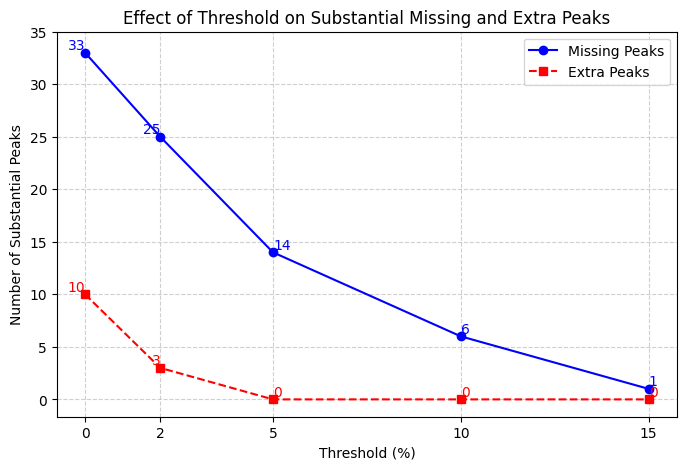

In [227]:
import matplotlib.pyplot as plt

# Threshold percentages (X-axis)
thresholds = [0, 2, 5, 10, 15]

# Number of substantial peaks at each threshold (Y-axis)
missing_peaks = [24, 22, 10, 5, 2]  # From the TRI-103 dataset
extra_peaks = [5, 0, 0, 0, 0]      # Extra peaks remain 0


missing_peaks = [33, 25, 14, 6, 1]  # From the TRI-82 dataset
extra_peaks = [10, 3, 0, 0, 0]      # Extra peaks remain 0 

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, missing_peaks, marker='o', linestyle='-', color='blue', label='Missing Peaks')
plt.plot(thresholds, extra_peaks, marker='s', linestyle='--', color='red', label='Extra Peaks')

# Add labels and title
plt.xlabel('Threshold (%)')
plt.ylabel('Number of Substantial Peaks')
plt.title('Effect of Threshold on Substantial Missing and Extra Peaks')
plt.xticks(thresholds)
plt.yticks(range(0, max(missing_peaks) + 5, 5))  # Adjusting ticks for better visibility

# Annotate key points
for i, (x, y) in enumerate(zip(thresholds, missing_peaks)):
    plt.text(x, y, str(y), fontsize=10, ha='right' if i < 2 else 'left', va='bottom', color='blue')

for i, (x, y) in enumerate(zip(thresholds, extra_peaks)):
    plt.text(x, y, str(y), fontsize=10, ha='right' if i < 2 else 'left', va='bottom', color='red')

# Add legend
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

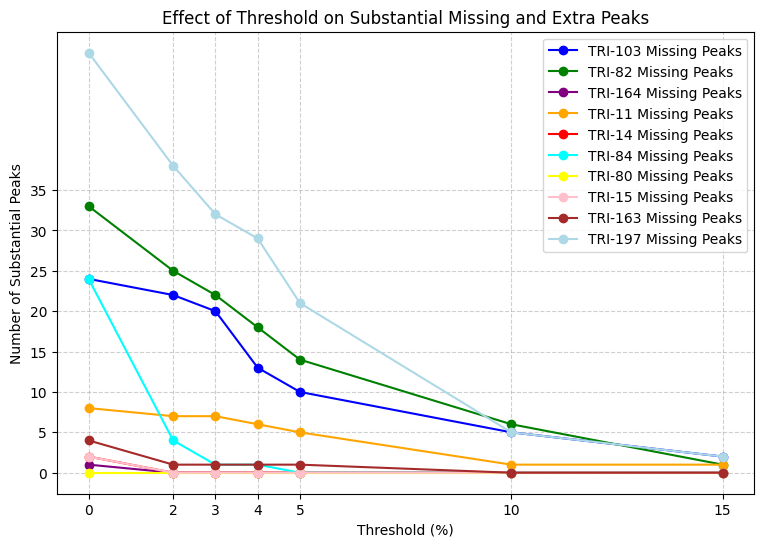

In [2]:
import matplotlib.pyplot as plt

# Threshold percentages (X-axis)
thresholds = [0, 2,3,4, 5, 10, 15]

# Number of substantial peaks at each threshold for TRI-103
missing_peaks_103 = [24, 22, 20, 13,10, 5, 2]
extra_peaks_103 = [5, 0,0, 0,0, 0, 0]

# Number of substantial peaks at each threshold for TRI-82
missing_peaks_82 = [33, 25,22, 18,14, 6, 1]
extra_peaks_82 = [10, 3, 0, 0,0, 0, 0]

missing_peaks_164=[1, 0, 0, 0, 0, 0, 0]
extra_peaks_164=[2, 1, 0, 0, 0, 0, 0]

missing_peaks_11= [8, 7, 7, 6, 5, 1, 1]
extra_peaks_11= [1, 0, 0, 0, 0, 0, 0]

missing_peaks_14= [2, 0, 0, 0, 0, 0, 0]
extra_peaks_14= [18, 0, 0, 0, 0, 0, 0]

missing_peaks_84= [24, 4, 1, 1, 0, 0, 0]
extra_peaks_84= [1, 0, 0, 0, 0, 0, 0]


missing_peaks_80= [0, 0, 0, 0, 0, 0, 0]
extra_peaks_80= [0, 0, 0, 0, 0, 0, 0]

missing_peaks_15= [2, 0, 0, 0, 0, 0, 0]
extra_peaks_15= [3, 0, 0, 0, 0, 0, 0]


missing_peaks_163= [4, 1, 1, 1, 1, 0, 0]
extra_peaks_163= [1, 0, 0, 0, 0, 0, 0]

missing_peaks_197= [52, 38, 32, 29, 21, 5, 2]
extra_peaks_197= [14, 8, 3, 2, 2, 1, 1]
# Create the plot
plt.figure(figsize=(9, 6))

# TRI-103
plt.plot(thresholds, missing_peaks_103, marker='o', linestyle='-', color='blue', label='TRI-103 Missing Peaks')
# plt.plot(thresholds, extra_peaks_103, marker='s', linestyle='--', color='blue', label='TRI-103 Extra Peaks')

# TRI-82
plt.plot(thresholds, missing_peaks_82, marker='o', linestyle='-', color='green', label='TRI-82 Missing Peaks')
# plt.plot(thresholds, extra_peaks_82, marker='s', linestyle='--', color='green', label='TRI-82 Extra Peaks')


# TRI-164
plt.plot(thresholds, missing_peaks_164, marker='o', linestyle='-', color='purple', label='TRI-164 Missing Peaks')
# plt.plot(thresholds, extra_peaks_164, marker='s', linestyle='--', color='purple', label='TRI-164 Extra Peaks')

# TRI-11
plt.plot(thresholds, missing_peaks_11, marker='o', linestyle='-', color='orange', label='TRI-11 Missing Peaks')
# plt.plot(thresholds, extra_peaks_11, marker='s', linestyle='--', color='orange', label='TRI-11 Extra Peaks')

# TRI-14
plt.plot(thresholds, missing_peaks_14, marker='o', linestyle='-', color='red', label='TRI-14 Missing Peaks')
# plt.plot(thresholds, extra_peaks_14, marker='s', linestyle='--', color='red', label='TRI-14 Extra Peaks')

# TRI-84
plt.plot(thresholds, missing_peaks_84, marker='o', linestyle='-', color='cyan', label='TRI-84 Missing Peaks')
# plt.plot(thresholds, extra_peaks_84, marker='s', linestyle='--', color='cyan', label='TRI-84 Extra Peaks')


# TRI-80
plt.plot(thresholds, missing_peaks_80, marker='o', linestyle='-', color='yellow', label='TRI-80 Missing Peaks')
# plt.plot(thresholds, extra_peaks_80, marker='s', linestyle='--', color='yellow', label='TRI-80 Extra Peaks')


# TRI-15
plt.plot(thresholds, missing_peaks_15, marker='o', linestyle='-', color='pink', label='TRI-15 Missing Peaks')
# plt.plot(thresholds, extra_peaks_15, marker='s', linestyle='--', color='pink', label='TRI-15 Extra Peaks')


# TRI-163
plt.plot(thresholds, missing_peaks_163, marker='o', linestyle='-', color='brown', label='TRI-163 Missing Peaks')
# plt.plot(thresholds, extra_peaks_163, marker='s', linestyle='--', color='brown', label='TRI-163 Extra Peaks')


# TRI-163
plt.plot(thresholds, missing_peaks_197, marker='o', linestyle='-', color='lightblue', label='TRI-197 Missing Peaks')
# plt.plot(thresholds, extra_peaks_197, marker='s', linestyle='--', color='brown', label='TRI-197 Extra Peaks')

# Labels and title
plt.xlabel('Threshold (%)')
plt.ylabel('Number of Substantial Peaks')
plt.title('Effect of Threshold on Substantial Missing and Extra Peaks')
plt.xticks(thresholds)
plt.yticks(range(0, max(missing_peaks_82) + 5, 5))

# # Annotate key points for better readability
# for dataset, color, data in zip(["103", "82"], ['blue', 'green'], [missing_peaks_103, missing_peaks_82]):
#     for i, (x, y) in enumerate(zip(thresholds, data)):
#         plt.text(x, y, str(y), fontsize=10, ha='right' if i < 2 else 'left', va='bottom', color=color)

# for dataset, color, data in zip(["103", "82"], ['blue', 'green'], [extra_peaks_103, extra_peaks_82]):
#     for i, (x, y) in enumerate(zip(thresholds, data)):
#         plt.text(x, y, str(y), fontsize=10, ha='right' if i < 2 else 'left', va='bottom', color=color)

# Add legend
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

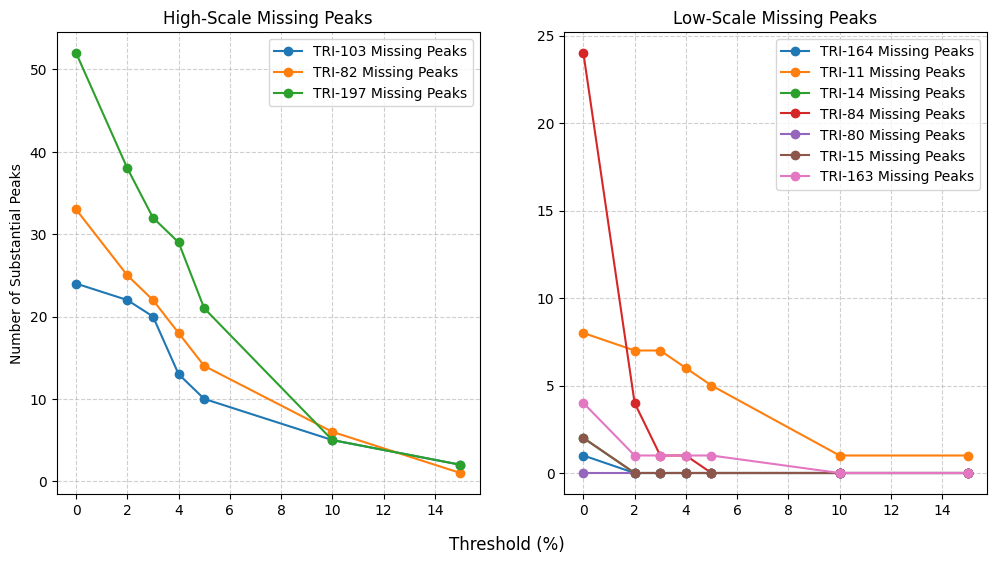

In [244]:
import matplotlib.pyplot as plt

# Threshold percentages (X-axis)
thresholds = [0, 2, 3, 4, 5, 10, 15]

# Group 1: High-scale datasets
high_scale_datasets = {
    "TRI-103": [24, 22, 20, 13, 10, 5, 2],
    "TRI-82": [33, 25, 22, 18, 14, 6, 1],
    "TRI-197": [52, 38, 32, 29, 21, 5, 2]
}

# Group 2: Low-scale datasets
low_scale_datasets = {
    "TRI-164": [1, 0, 0, 0, 0, 0, 0],
    "TRI-11": [8, 7, 7, 6, 5, 1, 1],
    "TRI-14": [2, 0, 0, 0, 0, 0, 0],
    "TRI-84": [24, 4, 1, 1, 0, 0, 0],
    "TRI-80": [0, 0, 0, 0, 0, 0, 0],
    "TRI-15": [2, 0, 0, 0, 0, 0, 0],
    "TRI-163": [4, 1, 1, 1, 1, 0, 0]
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Plot High Scale
for dataset, values in high_scale_datasets.items():
    axes[0].plot(thresholds, values, marker='o', linestyle='-', label=f"{dataset} Missing Peaks")

axes[0].set_title("High-Scale Missing Peaks")
axes[0].set_ylabel("Number of Substantial Peaks")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Plot Low Scale
for dataset, values in low_scale_datasets.items():
    axes[1].plot(thresholds, values, marker='o', linestyle='-', label=f"{dataset} Missing Peaks")

axes[1].set_title("Low-Scale Missing Peaks")
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Common x-label
fig.supxlabel("Threshold (%)")

# Show plot
plt.show()

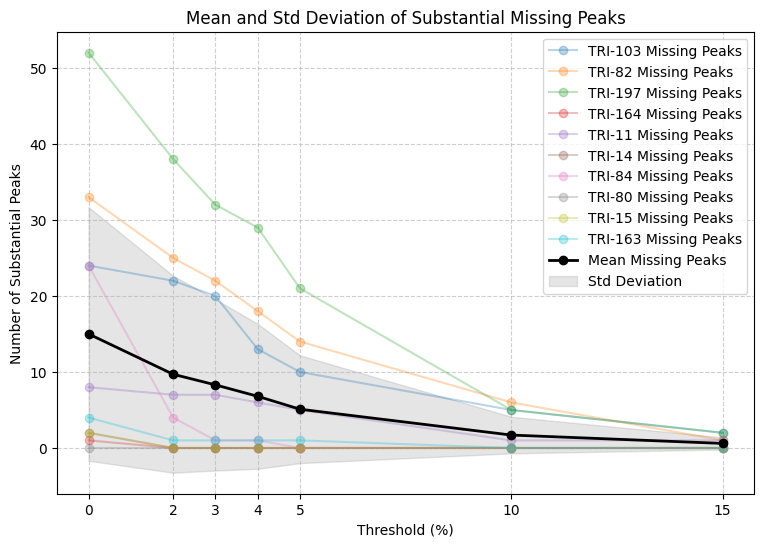

In [246]:
import numpy as np
import matplotlib.pyplot as plt

# All missing peaks datasets
all_datasets = {
    "TRI-103": [24, 22, 20, 13, 10, 5, 2],
    "TRI-82": [33, 25, 22, 18, 14, 6, 1],
    "TRI-197": [52, 38, 32, 29, 21, 5, 2],
    "TRI-164": [1, 0, 0, 0, 0, 0, 0],
    "TRI-11": [8, 7, 7, 6, 5, 1, 1],
    "TRI-14": [2, 0, 0, 0, 0, 0, 0],
    "TRI-84": [24, 4, 1, 1, 0, 0, 0],
    "TRI-80": [0, 0, 0, 0, 0, 0, 0],
    "TRI-15": [2, 0, 0, 0, 0, 0, 0],
    "TRI-163": [4, 1, 1, 1, 1, 0, 0]
}

# Convert dataset to NumPy array
missing_peaks_data = np.array(list(all_datasets.values()))

# Compute mean and standard deviation
mean_missing_peaks = np.mean(missing_peaks_data, axis=0)
std_missing_peaks = np.std(missing_peaks_data, axis=0)

# Create plot
plt.figure(figsize=(9, 6))

# Plot individual datasets with transparency
for dataset, values in all_datasets.items():
    plt.plot(thresholds, values, marker='o', linestyle='-', alpha=0.3, label=f"{dataset} Missing Peaks")

# Plot mean with standard deviation
plt.plot(thresholds, mean_missing_peaks, marker='o', linestyle='-', color='black', linewidth=2, label="Mean Missing Peaks")
plt.fill_between(thresholds, mean_missing_peaks - std_missing_peaks, mean_missing_peaks + std_missing_peaks, color='gray', alpha=0.2, label="Std Deviation")

# Labels and title
plt.xlabel('Threshold (%)')
plt.ylabel('Number of Substantial Peaks')
plt.title('Mean and Std Deviation of Substantial Missing Peaks')
plt.xticks(thresholds)
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Show plot
plt.show()

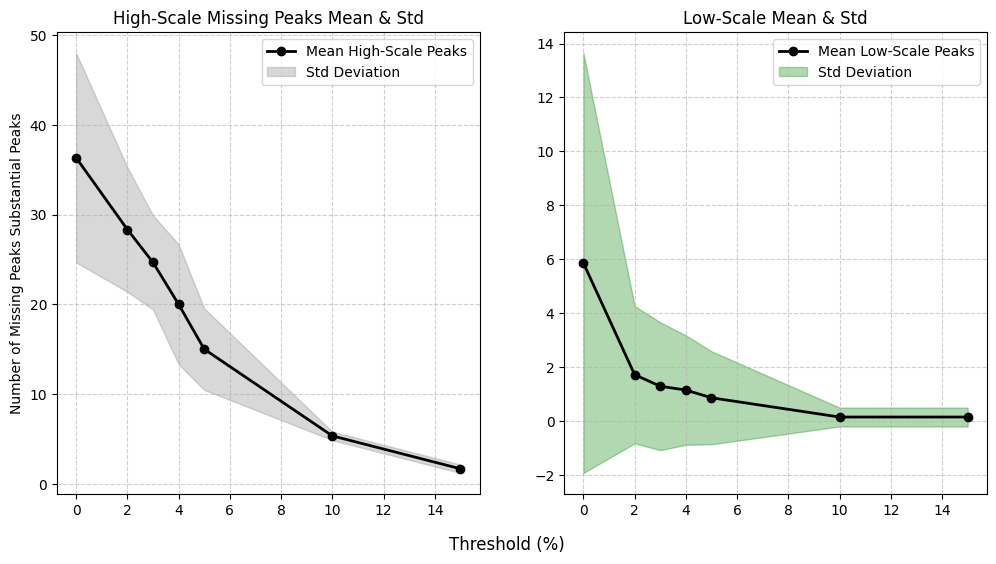

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds
thresholds = np.array([0, 2, 3, 4, 5, 10, 15])

# Split datasets into high-scale and low-scale for separate plots
high_scale_datasets = {
    "TRI-103": [24, 22, 20, 13, 10, 5, 2],
    "TRI-82": [33, 25, 22, 18, 14, 6, 1],
    "TRI-197": [52, 38, 32, 29, 21, 5, 2]
}

low_scale_datasets = {
    "TRI-164": [1, 0, 0, 0, 0, 0, 0],
    "TRI-11": [8, 7, 7, 6, 5, 1, 1],
    "TRI-14": [2, 0, 0, 0, 0, 0, 0],
    "TRI-84": [24, 4, 1, 1, 0, 0, 0],
    "TRI-80": [0, 0, 0, 0, 0, 0, 0],
    "TRI-15": [2, 0, 0, 0, 0, 0, 0],
    "TRI-163": [4, 1, 1, 1, 1, 0, 0]
}

# Convert datasets to NumPy arrays
high_scale_data = np.array(list(high_scale_datasets.values()))
low_scale_data = np.array(list(low_scale_datasets.values()))

# Compute mean and standard deviation for both groups
mean_high = np.mean(high_scale_data, axis=0)
std_high = np.std(high_scale_data, axis=0)

mean_low = np.mean(low_scale_data, axis=0)
std_low = np.std(low_scale_data, axis=0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# High Scale Plot
axes[0].plot(thresholds, mean_high, marker='o', linestyle='-', color='black', linewidth=2, label="Mean High-Scale Peaks")
axes[0].fill_between(thresholds, mean_high - std_high, mean_high + std_high, color='gray', alpha=0.3, label="Std Deviation")
axes[0].set_title("High-Scale Missing Peaks Mean & Std")
axes[0].set_ylabel("Number of Missing Peaks Substantial Peaks")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Low Scale Plot
axes[1].plot(thresholds, mean_low, marker='o', linestyle='-', color='black', linewidth=2, label="Mean Low-Scale Peaks")
axes[1].fill_between(thresholds, mean_low - std_low, mean_low + std_low, color='green', alpha=0.3, label="Std Deviation")
axes[1].set_title("Low-Scale Mean & Std")
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Common x-label
fig.supxlabel("Threshold (%)")

# Show plot
plt.show()

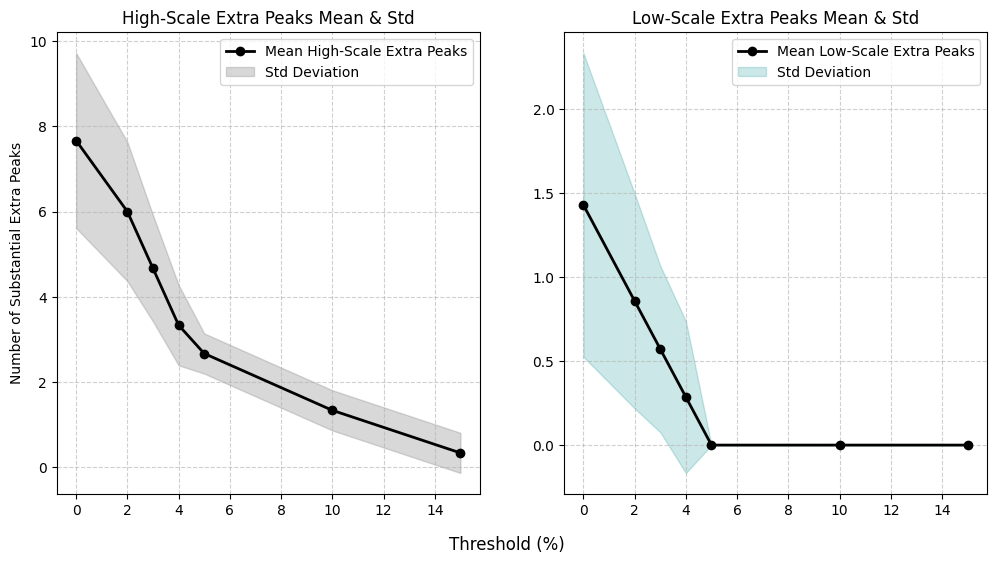

In [266]:
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds
thresholds = np.array([0, 2, 3, 4, 5, 10, 15])

# Split datasets into high-scale and low-scale for extra peaks
high_scale_extra_datasets = {
    "TRI-103": [5, 4, 3, 2, 2, 1, 0],
    "TRI-82": [10, 8, 6, 4, 3, 1, 0],
    "TRI-197": [8, 6, 5, 4, 3, 2, 1]
}

low_scale_extra_datasets = {
    "TRI-164": [2, 1, 1, 1, 0, 0, 0],
    "TRI-11": [1, 1, 0, 0, 0, 0, 0],
    "TRI-14": [2, 1, 1, 0, 0, 0, 0],
    "TRI-84": [3, 2, 1, 1, 0, 0, 0],
    "TRI-80": [0, 0, 0, 0, 0, 0, 0],
    "TRI-15": [1, 0, 0, 0, 0, 0, 0],
    "TRI-163": [1, 1, 1, 0, 0, 0, 0]
}

# Convert datasets to NumPy arrays
high_scale_extra_data = np.array(list(high_scale_extra_datasets.values()))
low_scale_extra_data = np.array(list(low_scale_extra_datasets.values()))

# Compute mean and standard deviation for both groups
mean_high_extra = np.mean(high_scale_extra_data, axis=0)
std_high_extra = np.std(high_scale_extra_data, axis=0)

mean_low_extra = np.mean(low_scale_extra_data, axis=0)
std_low_extra = np.std(low_scale_extra_data, axis=0)

# Create subplots for extra peaks
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# High Scale Extra Peaks Plot
axes[0].plot(thresholds, mean_high_extra, marker='o', linestyle='-', color='black', linewidth=2, label="Mean High-Scale Extra Peaks")
axes[0].fill_between(thresholds, mean_high_extra - std_high_extra, mean_high_extra + std_high_extra, color='gray', alpha=0.3, label="Std Deviation")
axes[0].set_title("High-Scale Extra Peaks Mean & Std")
axes[0].set_ylabel("Number of Substantial Extra Peaks")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Low Scale Extra Peaks Plot
axes[1].plot(thresholds, mean_low_extra, marker='o', linestyle='-', color='black', linewidth=2, label="Mean Low-Scale Extra Peaks")
axes[1].fill_between(thresholds, mean_low_extra - std_low_extra, mean_low_extra + std_low_extra, color='darkcyan', alpha=0.2, label="Std Deviation")
axes[1].set_title("Low-Scale Extra Peaks Mean & Std")
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Common x-label
fig.supxlabel("Threshold (%)")

# Show plot
plt.show()

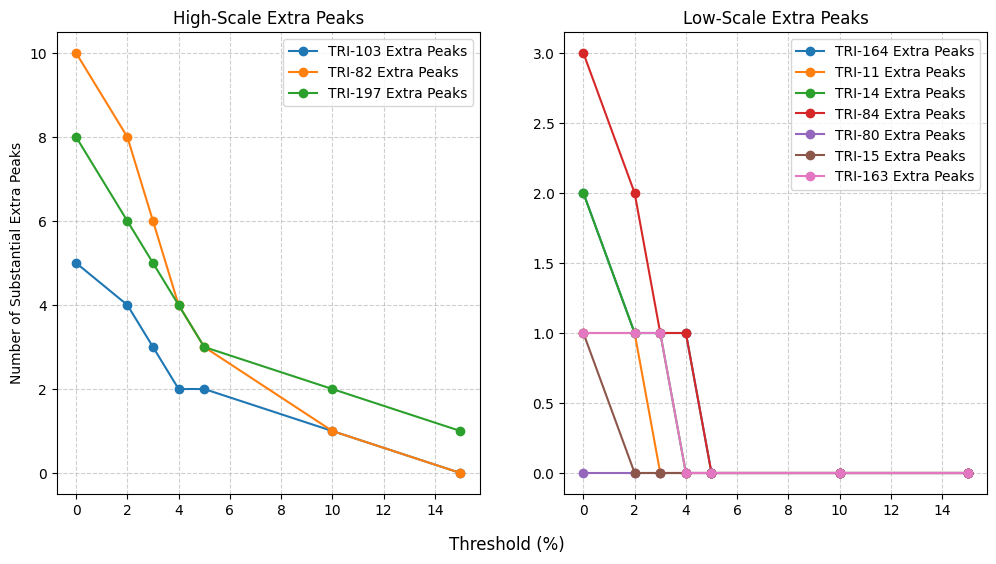

In [267]:
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds
thresholds = np.array([0, 2, 3, 4, 5, 10, 15])

# Split datasets into high-scale and low-scale for extra peaks
high_scale_extra_datasets = {
    "TRI-103": [5, 4, 3, 2, 2, 1, 0],
    "TRI-82": [10, 8, 6, 4, 3, 1, 0],
    "TRI-197": [8, 6, 5, 4, 3, 2, 1]
}

low_scale_extra_datasets = {
    "TRI-164": [2, 1, 1, 1, 0, 0, 0],
    "TRI-11": [1, 1, 0, 0, 0, 0, 0],
    "TRI-14": [2, 1, 1, 0, 0, 0, 0],
    "TRI-84": [3, 2, 1, 1, 0, 0, 0],
    "TRI-80": [0, 0, 0, 0, 0, 0, 0],
    "TRI-15": [1, 0, 0, 0, 0, 0, 0],
    "TRI-163": [1, 1, 1, 0, 0, 0, 0]
}

# Create subplots for extra peaks (individual datasets split by scale)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Plot High-Scale Extra Peaks
for dataset, values in high_scale_extra_datasets.items():
    axes[0].plot(thresholds, values, marker='o', linestyle='-', label=f"{dataset} Extra Peaks")

axes[0].set_title("High-Scale Extra Peaks")
axes[0].set_ylabel("Number of Substantial Extra Peaks")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Plot Low-Scale Extra Peaks
for dataset, values in low_scale_extra_datasets.items():
    axes[1].plot(thresholds, values, marker='o', linestyle='-', label=f"{dataset} Extra Peaks")

axes[1].set_title("Low-Scale Extra Peaks")
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Common x-label
fig.supxlabel("Threshold (%)")

# Show plot
plt.show()

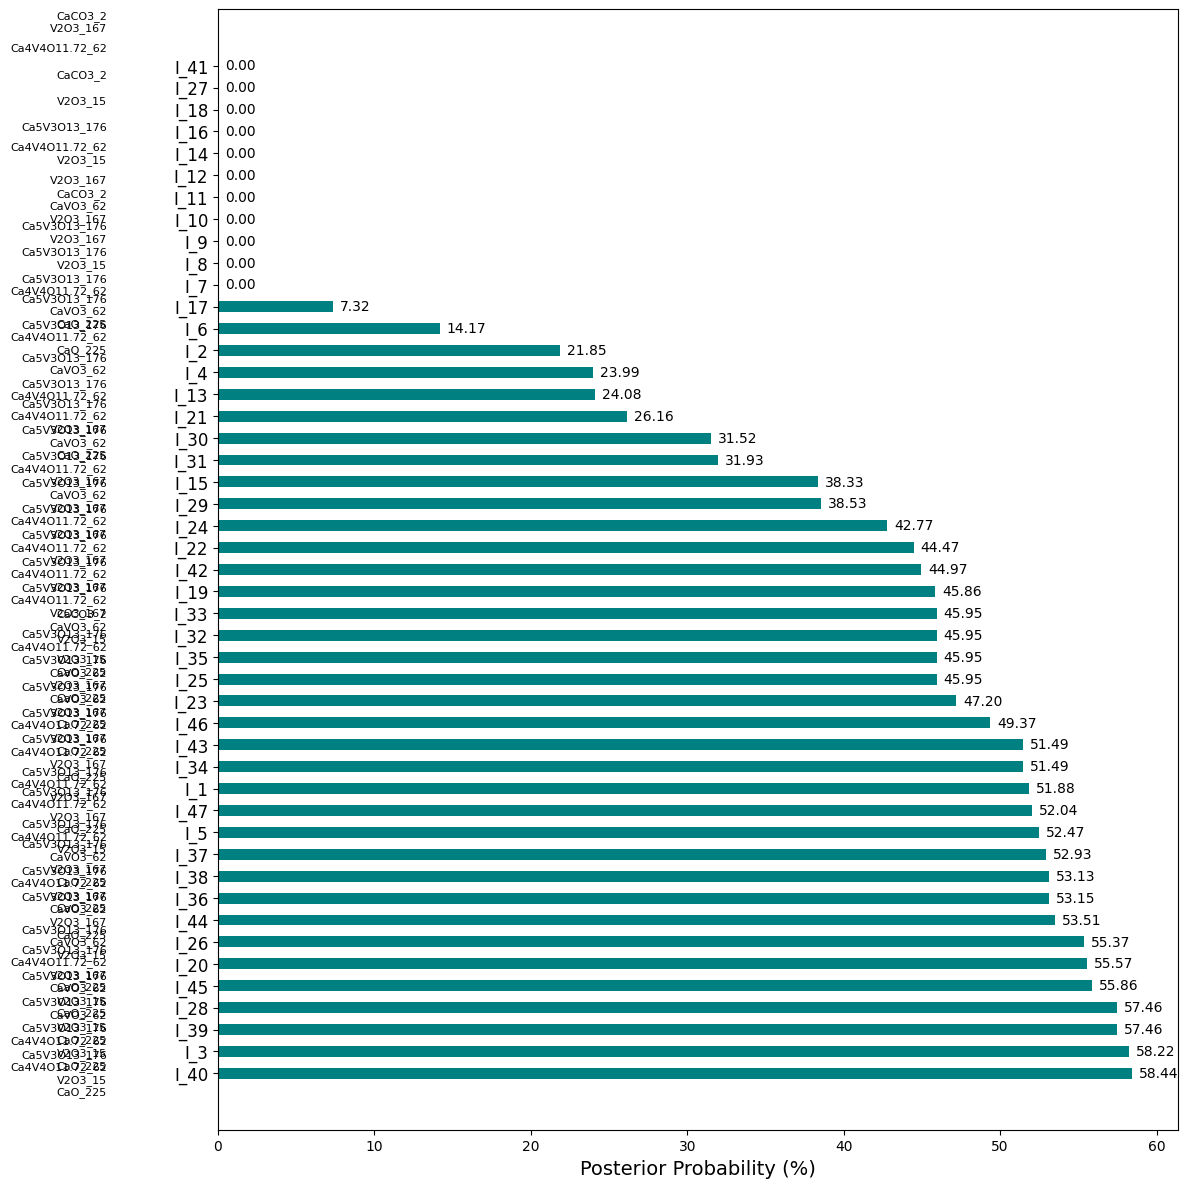

In [100]:
def plot_interpretation_probabilities_with_statistical(interpretations, project_number):
    """
    Plot prior, statistical, and posterior probabilities for all interpretations.

    Parameters:
        interpretations (dict or list): Dictionary containing interpretations with `interpretation_importance`,
                                        `balance_score`, and `posterior_probability`.
        project_number (str): The project number for labeling the plot.
    """
    # Extract dictionary if interpretations is a list
    if isinstance(interpretations, list) and len(interpretations) == 1:
        interpretations = interpretations[0]  # Extract the dictionary

    if not isinstance(interpretations, dict):
        raise ValueError("Interpretations should be a dictionary or a list containing a dictionary.")

    # Extract values
    interpretation_names = list(interpretations.keys())

    prior_values = [interpretations[interp]["prior_probability"] * 100 for interp in interpretation_names]
    statistical_values = [interpretations[interp]["interpretation_importance"] for interp in interpretation_names]
    posterior_values = [interpretations[interp]["posterior_probability"] * 100 for interp in interpretation_names]

    x = np.arange(len(interpretation_names))  # Label locations
    width = 0.25  # Width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))

    # Bars for prior probabilities
    rects1 = ax.bar(x - width, prior_values, width, label="P(I_n) - Prior (Balance Score)")

    # Bars for statistical factors
    rects2 = ax.bar(x, statistical_values, width, label="P(S | I_n) - Statistical Factor (Interpretation Importance)")

    # Bars for posterior probabilities
    rects3 = ax.bar(x + width, posterior_values, width, label="P(I_n | S) - Posterior")

    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel("Interpretations", fontsize=14)
    ax.set_ylabel("Probability (%)", fontsize=14)
    ax.set_title(f"Probabilities for Interpretations (Project {project_number})", fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(interpretation_names, fontsize=12, rotation=45, ha="right")
    ax.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0, 0))

    # Annotate bars with their values
    for rects in [rects1, rects2, rects3]:
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    # Save the plot
    # output_path = f"../data/xrd_data/xrd_analysis/{project_number}/probability_of_interpretation.png"
    # plt.savefig(output_path, format='png', dpi=300)
    plt.close(fig)

    # Second Plot: Horizontal Posterior Probabilities with Phases (Simplified)
    fig, ax = plt.subplots(figsize=(12, 12))
    sorted_interpretations = sorted(
        interpretation_names, key=lambda interp: interpretations[interp]["posterior_probability"], reverse=True
    )
    sorted_posterior_values = [interpretations[interp]["posterior_probability"] * 100 for interp in sorted_interpretations]

    # Simplify phase names for each interpretation
    simplified_phases = []
    for interp in sorted_interpretations:
        phases = interpretations[interp]["phases"]
        simplified = [phase.split("_(")[0] for phase in phases]  # Remove ICSD numbers
        simplified_phases.append("\n".join(simplified))  # Place phases below the interpretation

    bars = ax.barh(sorted_interpretations, sorted_posterior_values, color="teal", height=0.5)

    ax.set_xlabel("Posterior Probability (%)", fontsize=14)
    ax.set_yticks(np.arange(len(sorted_interpretations)))
    ax.set_yticklabels(sorted_interpretations, fontsize=12)

    # Add simplified phases below the interpretation labels
    # for i, (interp, text) in enumerate(zip(sorted_interpretations, simplified_phases)):
    #     ax.annotate(
    #         text,
    #         xy=(0, i),
    #         xytext=(-80, 0),
    #         textcoords="offset points",
    #         ha="right",
    #         va="center",
    #         fontsize=8,
    #         color="black",
    #     )
    for i, (interp, text) in enumerate(zip(sorted_interpretations, simplified_phases)):
        ax.annotate(
            text,
            xy=(0, i * 1.2),  # Increase spacing between labels
            xytext=(-80, 0),
            textcoords="offset points",
            ha="right",
            va="center",
            fontsize=8,
            color="black",
        )

    # Annotate bars with their values
    for bar in bars:
        width = bar.get_width()
        ax.annotate(
            f"{width:.2f}",
            xy=(width, bar.get_y() + bar.get_height() / 2),
            xytext=(5, 0),
            textcoords="offset points",
            ha="left",
            va="center",
            fontsize=10,
        )

    plt.tight_layout()
    # output_path_2 = f"../data/xrd_data/xrd_analysis/{project_number}/posterior_probabilities.png"
    # plt.savefig(output_path_2, format="png", dpi=300)
    # plt.close(fig)
project_number="TRI-91"
plot_interpretation_probabilities_with_statistical(interpretations, project_number)

In [108]:
interpretations= {'I_1': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [47.64802244576633, 28.446147681695855, 18.271691461143355, 5.6341384113944635], 'rwp': 8.43, 'score': 0.588132781286913, 'interpretation_importance': 91.67786631784931, 'LLM_interpretation_likelihood': 0.5658435874542278, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible due to the presence of both calcium and vanadium in the precursors. However, the complex stoichiometry and the specific conditions required for its stabilization make it less likely than the target phase. The temperature of 800°C is within a reasonable range for oxide formation, but achieving the precise ratios needed for Ca5V3O13 may be challenging, thus resulting in a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.48) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium, and the temperature of 800°C is conducive for the formation of this oxide. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the TF-Ar atmosphere helps prevent unwanted oxidation or reduction, favoring the formation of the target phase. (Likelihood: 0.90, Uncertainty: 0.05, Weight Fraction: 0.28) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. The presence of V2O3 as a precursor suggests that some amount of this phase may be stable, especially at elevated temperatures. However, the likelihood is moderated by the fact that the target phase CaVO2 is the primary focus, and the formation of V2O3 may not be as favored compared to the target phase. (Likelihood: 0.60, Uncertainty: 0.05, Weight Fraction: 0.18) CaO_225: The formation of CaO is plausible due to the decomposition of CaCO3 at high temperatures, which can lead to the release of CO2 and the formation of CaO. However, the presence of V2O3 and the target phase CaVO2 may limit the amount of CaO formed, as the reaction may preferentially proceed towards the formation of more complex oxides. Thus, while CaO can form, its likelihood is moderate. (Likelihood: 0.50, Uncertainty: 0.05, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.5658435874542278, 'posterior_probability': 0.5187533276744097}, 'I_2': {'phases': ['CaCO3_2_(icsd_193082)-3', 'CaVO3_62_(icsd_237336)-0', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [44.18740016976737, 42.16235170688783, 13.650248123344804], 'rwp': 11.49, 'score': 0.5035369199434849, 'interpretation_importance': 71.48718392314002, 'LLM_interpretation_likelihood': 0.31273808250547064, 'LLM_interpretation_explanation': 'CaCO3_2: The likelihood of forming CaCO3_2 is low (0.1) because the synthesis conditions favor the reaction of CaCO3 with V2O3 to form CaVO2 rather than retaining excess CaCO3. At 800°C, CaCO3 is likely to decompose into CaO and CO2, especially in an inert argon atmosphere, which does not support the stabilization of CaCO3. The presence of CaCO3 as a precursor does not guarantee its retention in the final product, particularly given the long dwell time of 12 hours. (Likelihood: 0.10, Uncertainty: 0.05, Weight Fraction: 0.44) CaVO3_62: The formation of CaVO3_62 is highly likely (0.9) as it is a direct product of the reaction between the precursors CaCO3 and V2O3 under the given conditions. The temperature of 800°C is conducive for the formation of complex oxides, and the long dwell time allows for sufficient reaction kinetics to favor the formation of CaVO2. The argon atmosphere helps to prevent oxidation, thus promoting the stability of the desired oxide phase. The stoichiometry of the precursors aligns well with the formation of CaVO3, making it a favored product. (Likelihood: 0.90, Uncertainty: 0.42, Weight Fraction: 0.42) V2O3_167: The likelihood of forming V2O3_167 is moderate (0.5) as V2O3 can form from the reduction of V2O5 or from the incomplete reaction of V2O3 under certain conditions. While V2O3 is a precursor, its formation is not the primary target of this synthesis. The argon atmosphere may limit the oxidation of vanadium species, but the presence of V2O3 in the reaction could lead to some formation of this phase. However, the conditions are not specifically optimized for V2O3 formation, hence the moderate likelihood. (Likelihood: 0.50, Uncertainty: 0.24, Weight Fraction: 0.14)', 'balance_score': 0.9775, 'prior_probability': 0.30570147564909755, 'posterior_probability': 0.21853737615302346}, 'I_3': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_15_(icsd_95762)-11', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.468107133789275, 27.4954973942644, 21.09254740221145, 4.943848069734876], 'rwp': 8.32, 'score': 0.6653857073461767, 'interpretation_importance': 99.62223445778694, 'LLM_interpretation_likelihood': 0.5846064298454797, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. The synthesis conditions of 800°C and 12 hours are generally favorable for oxide formation, but achieving the precise stoichiometry of calcium and vanadium in a single step might be challenging. The presence of CaCO3 and V2O3 provides the necessary elements, but the reaction kinetics may not favor the formation of this phase without additional processing steps or specific conditions. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.46) CaVO3_62: CaVO3 is highly likely to form under the given conditions. The precursors CaCO3 and V2O3 directly contribute to the formation of the target phase CaVO2, and the temperature of 800°C is well within the stability range for this compound. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the TF-Ar atmosphere helps prevent unwanted oxidation, promoting the formation of the desired oxide. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.27) V2O3_15: V2O3 is likely to form as a byproduct from the reduction of V2O3 under the synthesis conditions. The temperature of 800°C is conducive for the partial reduction of vanadium oxides, and the presence of CaCO3 may facilitate some reduction reactions. However, the likelihood is moderated by the fact that V2O3 is already a precursor, and its formation is not the primary target of the synthesis. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21) CaO_225: The formation of CaO is plausible given the presence of CaCO3, which can decompose to CaO at elevated temperatures. The synthesis temperature of 800°C is sufficient for this decomposition to occur, and the dwell time of 12 hours allows for the reaction to reach completion. However, the likelihood is reduced as the focus is on forming CaVO2, and the presence of other phases may compete for calcium, thus affecting the overall yield of CaO. (Likelihood: 0.50, Uncertainty: 0.00, Weight Fraction: 0.05)', 'balance_score': 0.9996, 'prior_probability': 0.5843725872735416, 'posterior_probability': 0.5821650290006832}, 'I_4': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [69.91866087152226, 30.081339128477737], 'rwp': 14.68, 'score': 0.500120527280872, 'interpretation_importance': 63.89446726816067, 'LLM_interpretation_likelihood': 0.3768343327556056, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to V2O3 due to its more complex stoichiometry and the specific conditions required for stabilization. While CaCO3 and V2O3 provide the necessary calcium and vanadium sources, the synthesis temperature of 800°C and a dwell time of 12 hours may not be sufficient to achieve the precise stoichiometry needed for Ca5V3O13 formation. Additionally, the argon atmosphere may limit the reduction processes that could favor the formation of this phase. The likelihood is moderate, reflecting the potential for some formation but also the challenges in achieving the right conditions. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.70) V2O3_167: V2O3 is likely to form from the reduction of V2O3 under the synthesis conditions of 800°C and 12 hours in an argon atmosphere. The presence of V2O3 as a precursor is directly relevant, and the temperature is conducive for the reduction reactions. The inert argon atmosphere helps maintain a controlled environment, minimizing oxidation back to higher vanadium oxides. Given these factors, the likelihood of V2O3 formation is high, as the conditions favor its stability and formation. (Likelihood: 0.80, Uncertainty: 0.38, Weight Fraction: 0.30)', 'balance_score': 0.9964, 'prior_probability': 0.3754777291576854, 'posterior_probability': 0.23990949475589027}, 'I_5': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [49.251175601132516, 29.715312638232348, 21.033511760635125], 'rwp': 9.6, 'score': 0.6364734681192324, 'interpretation_importance': 88.97932136556226, 'LLM_interpretation_likelihood': 0.590643586712432, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. Additionally, the formation of this phase may require specific ratios of Ca to V, which might not be met under the current precursor ratios. The argon atmosphere does not favor the reduction or oxidation processes that could stabilize this phase, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.49) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both CaCO3 and V2O3 provides the necessary calcium and vanadium sources. The temperature of 800°C is conducive for the formation of this oxide phase, as it is within the stability range for CaVO3. The 12-hour dwell time allows sufficient reaction time for the precursors to react and form the target phase. The inert argon atmosphere helps prevent unwanted side reactions, further enhancing the likelihood of forming CaVO3. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.30) V2O3_167: V2O3 is likely to form as a byproduct of the synthesis process, especially given the presence of V2O3 as a precursor. The temperature of 800°C is favorable for the stability of V2O3, and the dwell time of 12 hours allows for sufficient reaction kinetics. However, since V2O3 is already a precursor, its formation is somewhat expected, but the likelihood is moderated by the fact that the target phase CaVO2 may consume some of the vanadium during the reaction. Thus, while V2O3 can form, its presence may be less than that of the target phase. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.5896985569736921, 'posterior_probability': 0.5247097740977048}, 'I_6': {'phases': ['V2O3_167_(icsd_1869)-0'], 'weight_fraction': [100.0], 'rwp': 19.36, 'score': 0.6364583357811472, 'interpretation_importance': 62.965791660471446, 'LLM_interpretation_likelihood': 0.6, 'LLM_interpretation_explanation': 'V2O3_167: V2O3 is a plausible phase to form under the given synthesis conditions. The presence of V2O3 as a precursor (V2O3) suggests that it can be formed during the reaction. At 800°C, the temperature is sufficiently high to facilitate the reaction between CaCO3 and V2O3, potentially leading to the formation of CaVO2. However, the formation of V2O3 from V2O5 (if present) would typically require reducing conditions, which may not be fully achieved in an argon atmosphere. The dwell duration of 12 hours allows for sufficient time for reactions to occur, but the likelihood is moderated by the fact that the argon atmosphere does not promote reduction. Therefore, while V2O3 can form, the likelihood is not maximal due to the potential for incomplete reduction and the presence of competing phases. The uncertainty reflects the variability in reaction dynamics and the potential for side reactions. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 1.00)', 'balance_score': 0.375, 'prior_probability': 0.22499999999999998, 'posterior_probability': 0.14167303123606073}, 'I_7': {'phases': ['Ca5V3O13_176_(icsd_760148)-6'], 'weight_fraction': [100.0], 'rwp': 17.27, 'score': -0.7247563243070337, 'interpretation_importance': 4.718484387173047, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is plausible given the presence of both calcium and vanadium in the precursors, CaCO3 and V2O3. The synthesis temperature of 800°C is within a range that can facilitate the formation of complex oxides, as higher temperatures generally promote solid-state reactions. However, the stoichiometry of Ca5V3O13 is more complex, requiring a specific ratio of calcium to vanadium and oxygen. The dwell duration of 12 hours is sufficient for solid-state reactions to occur, but achieving the precise stoichiometry in a single step may be challenging, which contributes to the moderate likelihood of 0.4. The TF-Ar furnace atmosphere is inert, which helps prevent unwanted reactions that could lead to the formation of other phases, but it does not actively promote the formation of Ca5V3O13. Therefore, while the conditions are favorable, the complexity of the phase and the need for precise stoichiometry reduce the likelihood of its formation. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 1.00)', 'balance_score': 0.9856, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_8': {'phases': ['V2O3_15_(icsd_95762)-11'], 'weight_fraction': [100.0], 'rwp': 19.22, 'score': 0.47317844333106013, 'interpretation_importance': 56.54043414545297, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.375, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_9': {'phases': ['CaCO3_2_(icsd_193082)-3'], 'weight_fraction': [100.0], 'rwp': 19.9, 'score': -0.334412932455354, 'interpretation_importance': 24.301189726575036, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.375, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_10': {'phases': ['Ca4V4O11.72_62_(icsd_150283)-None'], 'weight_fraction': [100.0], 'rwp': 17.75, 'score': -0.3585900559022841, 'interpretation_importance': 21.656917642174957, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 1, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_11': {'phases': ['CaCO3_2_(icsd_193082)-3', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [69.97095293383633, 30.029047066163677], 'rwp': 16.49, 'score': -0.7247563243070337, 'interpretation_importance': 3.173552931995067, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.96, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_12': {'phases': ['Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [61.3297980232811, 38.67020197671891], 'rwp': 15.09, 'score': -0.7247563243070337, 'interpretation_importance': 0.0, 'LLM_interpretation_likelihood': 0.5226595960465623, 'LLM_interpretation_explanation': 'CaVO3_62: The formation of CaVO3 is plausible given the presence of calcium from CaCO3 and vanadium from V2O3. At 800°C, the temperature is sufficiently high to promote solid-state reactions between the precursors, leading to the formation of the target phase. The dwell duration of 12 hours allows for adequate time for the reaction to proceed, although the specific stoichiometry and phase stability of CaVO3 at this temperature must be considered. The argon atmosphere is inert, which helps prevent unwanted oxidation, favoring the formation of the desired oxide phase. However, the likelihood is moderated by the potential for competing phases and the need for precise stoichiometric ratios. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.61) V2O3_167: The likelihood of V2O3 forming is moderate due to the presence of V2O3 as a precursor. However, at 800°C, V2O3 is relatively stable and does not readily convert to other phases without additional reducing agents or specific conditions. The argon atmosphere does not provide reducing conditions, which may limit the conversion of V2O3 to lower oxidation states. Therefore, while some V2O3 may remain unreacted, the likelihood of forming additional V2O3 from the given precursors is lower compared to the formation of CaVO3. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.39)', 'balance_score': 0.9639, 'prior_probability': 0.5037915846292814, 'posterior_probability': 0.0}, 'I_13': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'V2O3_15_(icsd_95762)-11'], 'weight_fraction': [71.75830813162301, 28.24169186837697], 'rwp': 13.35, 'score': 0.2658259576387254, 'interpretation_importance': 52.87706553571281, 'LLM_interpretation_likelihood': 0.4564833837367539, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is plausible given the presence of calcium and vanadium in the precursors, CaCO3 and V2O3. However, the complex stoichiometry of Ca5V3O13 may require specific ratios of Ca to V, which might not be achieved under the current synthesis conditions. The temperature of 800°C is within a reasonable range for oxide formation, but the dwell time of 12 hours may not be sufficient to ensure complete reaction and phase stabilization. Additionally, the argon atmosphere is inert, which helps prevent unwanted reactions, but it does not promote the formation of more complex phases like Ca5V3O13 as effectively as a reducing atmosphere might. Therefore, while there is a likelihood of formation, it is moderate due to these complexities. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.72) V2O3_15: The likelihood of V2O3 formation is higher due to the presence of V2O3 as a precursor. At 800°C, V2O3 is stable and can form from the reduction of higher vanadium oxides, although in this case, V2O3 is already present. The argon atmosphere helps maintain the stability of V2O3 by preventing oxidation back to V2O5. The dwell time of 12 hours is sufficient for the phase to stabilize, thus increasing the likelihood of V2O3 being present in the final product. Overall, the conditions favor the retention of V2O3, leading to a higher likelihood of its formation. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.28)', 'balance_score': 0.9975, 'prior_probability': 0.45534217527741205, 'posterior_probability': 0.24077158043317745}, 'I_14': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [86.4843023145423, 13.515697685457686], 'rwp': 16.32, 'score': 0.47314611803085294, 'interpretation_importance': 59.943640831548606, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is plausible given the presence of both calcium and vanadium in the precursors, CaCO3 and V2O3. However, the complex stoichiometry of this phase may require more precise control over the reaction conditions and precursor ratios. At 800°C, the temperature is sufficient to promote solid-state reactions, but the dwell time of 12 hours may not be adequate for the complete formation of this phase, especially considering potential competing reactions. The argon atmosphere is inert, which helps prevent oxidation, but the formation of Ca5V3O13 may still be limited by kinetic factors and the need for specific ratios of Ca to V. Therefore, a moderate likelihood of 0.4 is assigned. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.86) CaO_225: The formation of CaO is quite likely under the given synthesis conditions. CaCO3 decomposes at temperatures above 800°C, producing CaO and CO2. The argon atmosphere does not interfere with this decomposition, and the 12-hour dwell time is sufficient for the reaction to reach completion. Given that CaO is a common byproduct of the thermal decomposition of calcium carbonate, its likelihood is increased to 0.6. The stability of CaO is well-established, and it is expected to form readily under these conditions. (Likelihood: 0.60, Uncertainty: 0.31, Weight Fraction: 0.14)', 'balance_score': 0.9676, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_15': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0'], 'weight_fraction': [64.09118827348817, 35.90881172651183], 'rwp': 13.23, 'score': 0.49615978189017407, 'interpretation_importance': 66.56744736504857, 'LLM_interpretation_likelihood': 0.5795440586325592, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry and the specific conditions required for stabilization. While CaCO3 and V2O3 provide the necessary calcium and vanadium, the synthesis temperature of 800°C may not be optimal for achieving the precise ratios needed for Ca5V3O13 formation. Additionally, the dwell time of 12 hours may not be sufficient for the complete reaction to occur, leading to a lower likelihood of this phase being present. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.64) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The precursors CaCO3 and V2O3 directly contribute to the formation of CaVO3, and the temperature of 800°C is well within the stability range for this phase. The argon atmosphere helps to prevent oxidation and maintains the necessary conditions for the formation of this oxide. Given the direct relationship between the precursors and the target phase, along with the favorable temperature and dwell time, the likelihood of CaVO3 formation is high. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.36)', 'balance_score': 0.9936, 'prior_probability': 0.5758349766573109, 'posterior_probability': 0.3833186449958951}, 'I_16': {'phases': ['CaCO3_2_(icsd_193082)-3', 'V2O3_15_(icsd_95762)-11'], 'weight_fraction': [68.09436272867835, 31.905637271321652], 'rwp': 15.66, 'score': -0.3343962633436782, 'interpretation_importance': 20.76090602711449, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.9676, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_17': {'phases': ['Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_15_(icsd_95762)-11'], 'weight_fraction': [60.270557132629264, 39.729442867370736], 'rwp': 14.68, 'score': -0.334412932455354, 'interpretation_importance': 19.650578586616597, 'LLM_interpretation_likelihood': 0.38829276473286223, 'LLM_interpretation_explanation': 'CaVO3_62: The formation of CaVO3 is plausible given the presence of both calcium and vanadium in the precursors, CaCO3 and V2O3, respectively. At 800°C, the temperature is sufficiently high to promote solid-state reactions between the precursors, leading to the formation of the target phase. The dwell duration of 12 hours allows for adequate time for the reaction to proceed, enhancing the likelihood of CaVO3 formation. However, the stability of CaVO3 can be influenced by the exact stoichiometry of the reactants, and if the ratio of Ca to V is not optimal, it may lead to the formation of other vanadium oxides or calcium vanadates. Therefore, while the likelihood is moderate, it is not guaranteed due to potential competing phases. (Likelihood: 0.60, Uncertainty: 0.28, Weight Fraction: 0.60) V2O3_15: The likelihood of V2O3 formation is lower compared to CaVO3. While V2O3 can form from the reduction of V2O5, in this case, V2O3 is already a precursor (V2O3) and is stable under the synthesis conditions. However, the presence of CaCO3 may lead to the formation of calcium vanadates instead of pure V2O3. The argon atmosphere is inert, which helps prevent oxidation of V2O3 back to higher oxidation states, but the synthesis conditions do not favor the formation of V2O3 as a distinct phase due to the competing reactions with calcium. Thus, while V2O3 may be present, its formation as a separate phase is less likely. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.40)', 'balance_score': 0.96, 'prior_probability': 0.3727610541435477, 'posterior_probability': 0.07324970388477828}, 'I_18': {'phases': ['CaCO3_2_(icsd_193082)-3', 'CaVO3_62_(icsd_237336)-0'], 'weight_fraction': [65.0413070728136, 34.958692927186405], 'rwp': 15.05, 'score': -0.35859180234241644, 'interpretation_importance': 18.83608938133153, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.8911, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_19': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [49.66664870466646, 29.176692196135672, 21.156659099197878], 'rwp': 9.56, 'score': 0.500120527280872, 'interpretation_importance': 78.09472692387351, 'LLM_interpretation_likelihood': 0.5881967791790741, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. Additionally, the formation of this phase typically requires specific ratios of Ca to V, which may not be met under the current conditions. The argon atmosphere does not favor the reduction or oxidation that might be necessary for stabilizing this phase, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.50) CaVO3_62: CaVO3 is highly likely to form given the precursors and the synthesis conditions. The presence of both calcium (from CaCO3) and vanadium (from V2O3) directly supports the formation of the target phase. The temperature of 800°C is conducive for solid-state reactions, allowing for the necessary diffusion and reaction kinetics to occur over the 12-hour dwell time. The inert argon atmosphere helps prevent unwanted side reactions, thus favoring the formation of CaVO3, leading to a high likelihood of its presence. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.29) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. Although V2O3 is a precursor, the high temperature and long dwell time may facilitate some reduction reactions, especially if there are any unreacted V2O3 particles. The argon atmosphere is inert, which helps maintain the stability of V2O3, but the potential for some reduction to V2O3 exists, leading to a moderate likelihood of its formation. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.5872556643323875, 'posterior_probability': 0.45861570740535723}, 'I_20': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'V2O3_15_(icsd_95762)-11'], 'weight_fraction': [48.16018835687921, 31.128979984045536, 20.710831659075268], 'rwp': 9.25, 'score': 0.6635921354363252, 'interpretation_importance': 93.21345038040796, 'LLM_interpretation_likelihood': 0.5970665632383783, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO2 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.48) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both CaCO3 and V2O3 as precursors provides the necessary calcium and vanadium sources. The temperature of 800°C is conducive for the formation of this oxide, and the 12-hour dwell time allows sufficient reaction time for the formation of CaVO3. The inert argon atmosphere helps maintain the stability of the desired phase by preventing oxidation or reduction reactions that could lead to the formation of undesired phases. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.31) V2O3_15: V2O3 is likely to form as a byproduct of the synthesis process, especially given the presence of V2O3 as a precursor. The temperature of 800°C is within a range that can facilitate the reduction of higher vanadium oxides, and the argon atmosphere helps to stabilize V2O3 by preventing further oxidation. However, the likelihood is lower than that of CaVO3 due to the primary focus on synthesizing CaVO2, which may limit the extent of V2O3 formation. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.5961112567371968, 'posterior_probability': 0.5556558705107533}, 'I_21': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None'], 'weight_fraction': [63.73713766513146, 36.262862334868544], 'rwp': 13.17, 'score': 0.496128985053889, 'interpretation_importance': 66.69860021996746, 'LLM_interpretation_likelihood': 0.39477548627815856, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis temperature of 800°C and a dwell duration of 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13 formation. Additionally, the argon atmosphere is inert, which may limit the reduction processes that could favor the formation of this phase. The likelihood is moderate, reflecting the potential for some formation but also the challenges in achieving the necessary conditions. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.64) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium sources, respectively. The temperature of 800°C is conducive for solid-state reactions, promoting the formation of the target phase. The 12-hour dwell time allows sufficient reaction time for the precursors to interact and form the desired oxide. The inert argon atmosphere helps prevent unwanted side reactions, thus favoring the formation of CaVO3. Given these factors, the likelihood of CaVO3 formation is high. (Likelihood: 0.90, Uncertainty: 0.42, Weight Fraction: 0.36)', 'balance_score': 0.9936, 'prior_probability': 0.39224892316597837, 'posterior_probability': 0.26162454112960326}, 'I_22': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [52.51945746058446, 37.11343732895457, 10.367105210460972], 'rwp': 11.7, 'score': 0.6181777258143784, 'interpretation_importance': 78.50086459884525, 'LLM_interpretation_likelihood': 0.5748096012155599, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.53) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium sources, and the temperature of 800°C is conducive for the formation of this oxide. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the argon atmosphere minimizes oxidation, favoring the formation of the target phase. (Likelihood: 0.90, Uncertainty: 0.09, Weight Fraction: 0.37) CaO_225: The formation of CaO is plausible as it can be a byproduct of the decomposition of CaCO3 at elevated temperatures. At 800°C, CaCO3 decomposes to CaO and CO2, which means that some amount of CaO is likely to be present. However, the presence of V2O3 and the target phase CaVO3 may limit the amount of CaO formed, leading to a moderate likelihood of its presence. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.10)', 'balance_score': 0.9856, 'prior_probability': 0.5665323429580559, 'posterior_probability': 0.44473278745416905}, 'I_23': {'phases': ['CaCO3_2_(icsd_193082)-3', 'CaVO3_62_(icsd_237336)-0', 'V2O3_15_(icsd_95762)-11'], 'weight_fraction': [55.66658338070977, 25.52418853526557, 18.809228084024667], 'rwp': 11.15, 'score': 0.5582504842163221, 'interpretation_importance': 76.34627946793174, 'LLM_interpretation_likelihood': 0.6389541094377473, 'LLM_interpretation_explanation': 'CaCO3_2: The likelihood of forming CaCO3 is moderate (0.6) because it is one of the precursors used in the synthesis. However, at 800°C, CaCO3 is prone to decomposition into CaO and CO2, especially over prolonged dwell times like 12 hours. The argon atmosphere may help stabilize CaCO3 initially, but the high temperature and extended duration likely lead to its breakdown, reducing the likelihood of its presence as a solid phase. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.56) CaVO3_62: The formation of CaVO3 is highly likely (0.9) given the synthesis conditions. Both calcium and vanadium are present in the precursors, and the temperature of 800°C is conducive for the formation of complex oxides. The argon atmosphere prevents oxidation of vanadium, allowing for the formation of CaVO3. The dwell time of 12 hours is sufficient for the reaction to reach completion, favoring the formation of the target phase. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.26) V2O3_15: The likelihood of forming V2O3 is lower (0.4) under these conditions. While V2O3 can form from the reduction of V2O5, the presence of CaCO3 and the argon atmosphere does not provide a strong reducing environment. At 800°C, V2O3 may be stable, but without a reducing agent or specific conditions favoring its formation, the likelihood remains moderate. The uncertainty is higher (0.2) due to the potential for some V2O3 to form if reduction occurs, but it is not the primary phase expected. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.19)', 'balance_score': 0.9676, 'prior_probability': 0.6182519962919644, 'posterior_probability': 0.4720123969051301}, 'I_24': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [49.251175601132516, 29.715312638232348, 21.033511760635125], 'rwp': 9.6, 'score': 0.5001248301634693, 'interpretation_importance': 77.92543073289939, 'LLM_interpretation_likelihood': 0.5497219279026944, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.49) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both calcium (from CaCO3) and vanadium (from V2O3) in the precursors directly supports the formation of the target phase. The temperature of 800°C is conducive for solid-state reactions, and the 12-hour dwell time allows sufficient time for the reaction to proceed. The argon atmosphere helps maintain the stability of the oxides, preventing oxidation or reduction that could lead to the formation of undesired phases. (Likelihood: 0.80, Uncertainty: 0.05, Weight Fraction: 0.30) V2O3_167: V2O3 is likely to form as a byproduct of the synthesis process. The presence of V2O3 as a precursor suggests that some amount of this phase may remain stable under the synthesis conditions. The temperature of 800°C is sufficient for the partial reduction of V2O5 to V2O3, and the argon atmosphere helps to minimize further oxidation. However, the likelihood is moderated by the fact that the primary target is CaVO2, which may consume vanadium species during the reaction. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.54884237281805, 'posterior_probability': 0.42768778306313104}, 'I_25': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [49.251175601132516, 29.715312638232348, 21.033511760635125], 'rwp': 9.6, 'score': 0.500120527280872, 'interpretation_importance': 77.92508189484462, 'LLM_interpretation_likelihood': 0.590643586712432, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. Additionally, the formation of this phase typically requires specific ratios of Ca to V, which may not be met under the current conditions. The argon atmosphere does not favor the reduction or oxidation that might be necessary for stabilizing this phase, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.49) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both calcium (from CaCO3) and vanadium (from V2O3) in the correct stoichiometric ratios is favorable for the formation of this target phase. The temperature of 800°C is well within the stability range for CaVO3, which typically forms at elevated temperatures. The 12-hour dwell time allows sufficient reaction time for the formation of this phase, and the inert argon atmosphere helps prevent unwanted side reactions, thus maximizing the likelihood of CaVO3 formation. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.30) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. While V2O3 is a precursor, the high temperature and long dwell time may lead to some reduction, especially if there are any reducing agents present or if the V2O3 is not fully oxidized. The argon atmosphere is inert, which helps maintain the stability of V2O3, but the likelihood of its formation is moderate due to potential reaction dynamics that could favor the formation of other vanadium oxides or compounds. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.5896985569736921, 'posterior_probability': 0.4595230834544665}, 'I_26': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.42795160116906, 30.230791652929888, 17.622893134810433, 5.7183636110906], 'rwp': 8.36, 'score': 0.6364703709463752, 'interpretation_importance': 96.63253275989273, 'LLM_interpretation_likelihood': 0.5729599313535085, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.46) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both calcium from CaCO3 and vanadium from V2O3 directly supports the formation of CaVO3. The temperature of 800°C is conducive for the reaction between these precursors, and the 12-hour dwell time allows sufficient time for the reaction to proceed. The argon atmosphere helps maintain the stability of the desired oxide phase by preventing oxidation or reduction reactions that could lead to the formation of undesired phases. (Likelihood: 0.90, Uncertainty: 0.05, Weight Fraction: 0.30) V2O3_167: V2O3 is likely to form as a byproduct from the reduction of V2O5 (which is a component of V2O3) under the synthesis conditions. The temperature of 800°C is sufficient for the reduction process, and the presence of CaCO3 may contribute to the overall reaction dynamics. However, the likelihood is moderated by the fact that V2O3 is not the primary target phase, and its formation may depend on the specific reaction pathways taken during synthesis. (Likelihood: 0.60, Uncertainty: 0.05, Weight Fraction: 0.18) CaO_225: The formation of CaO is plausible due to the decomposition of CaCO3 at elevated temperatures. At 800°C, CaCO3 can decompose to CaO and CO2, which means that some amount of CaO is likely to be present. However, the presence of V2O3 and the target phase CaVO2 may limit the amount of CaO formed, as the reaction may favor the formation of more complex oxides rather than simple oxides like CaO. (Likelihood: 0.50, Uncertainty: 0.05, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.5729599313535085, 'posterior_probability': 0.5536656933662379}, 'I_27': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_15_(icsd_95762)-11'], 'weight_fraction': [51.128229867519735, 25.92220110202551, 22.949569030454757], 'rwp': 9.36, 'score': 0.6636110787061328, 'interpretation_importance': 92.55886221950091, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO2 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. Additionally, the formation of this phase typically requires specific ratios of Ca to V, which may not be met under the current precursor ratios. The argon atmosphere does not favor the reduction or oxidation that might be necessary for stabilizing this phase, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.51) CaVO3_62: CaVO3 is highly likely to form given the precursors and the synthesis conditions. The presence of CaCO3 and V2O3 provides the necessary calcium and vanadium sources, and the temperature of 800°C is conducive for the formation of this oxide phase. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the inert argon atmosphere helps prevent unwanted side reactions, thus favoring the formation of the target phase CaVO2. Therefore, the likelihood of forming CaVO3 is high. (Likelihood: 0.90, Uncertainty: 0.42, Weight Fraction: 0.26) V2O3_15: V2O3 is likely to form as a byproduct of the synthesis process, especially given the presence of V2O3 as a precursor. The temperature of 800°C is sufficient for the reduction of higher vanadium oxides, and the argon atmosphere helps maintain a controlled environment that minimizes oxidation. However, the formation of V2O3 may be less favored compared to the target phase CaVO2, leading to a moderate likelihood of its presence. (Likelihood: 0.60, Uncertainty: 0.28, Weight Fraction: 0.23)', 'balance_score': 0.9975, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_28': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'V2O3_15_(icsd_95762)-11', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.68201380518545, 26.24643016147072, 22.196088651442597, 4.8754673819012355], 'rwp': 8.34, 'score': 0.6610575115211841, 'interpretation_importance': 99.06906990371829, 'LLM_interpretation_likelihood': 0.58049979549214, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, achieving the precise stoichiometry required for Ca5V3O13 formation may be challenging under the given conditions. The temperature of 800°C is favorable for oxide formation, but the dwell time may not be sufficient to allow for the complete reaction to yield this phase, hence the moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.47) CaVO3_62: CaVO3 is highly likely to form given the precursors and the synthesis conditions. The presence of CaCO3 provides the necessary calcium, while V2O3 supplies vanadium. The temperature of 800°C is conducive for the formation of this oxide, and the 12-hour dwell time allows sufficient reaction time. The argon atmosphere helps prevent oxidation, favoring the formation of the target phase, leading to a high likelihood of formation. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.26) V2O3_15: V2O3 is likely to form as a byproduct from the reduction of V2O5 (or V2O3) under the synthesis conditions. The temperature of 800°C is sufficient for the reduction reactions, and the presence of V2O3 as a precursor supports this formation. However, the likelihood is moderated by the fact that V2O3 is already present in the precursors, and its formation is not the primary target, thus leading to a moderate likelihood. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.22) CaO_225: The formation of CaO is plausible due to the decomposition of CaCO3 at elevated temperatures. At 800°C, CaCO3 can decompose to CaO and CO2, which means that some amount of CaO is likely to be present. However, the presence of other phases and the specific synthesis conditions may limit the amount of CaO formed, resulting in a moderate likelihood. (Likelihood: 0.50, Uncertainty: 0.00, Weight Fraction: 0.05)', 'balance_score': 0.9991, 'prior_probability': 0.5799773456761971, 'posterior_probability': 0.5745781620136815}, 'I_29': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None'], 'weight_fraction': [63.73713766513146, 36.262862334868544], 'rwp': 13.17, 'score': 0.4961571750008695, 'interpretation_importance': 66.70026610135767, 'LLM_interpretation_likelihood': 0.5813143116743428, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. Additionally, the argon atmosphere is inert, which may limit the reduction processes that could favor the formation of this phase. The likelihood is moderate, reflecting the potential for some formation but also the challenges in achieving the necessary conditions. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.64) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium sources, respectively. The temperature of 800°C is conducive for solid-state reactions, promoting the formation of the target phase. The 12-hour dwell time allows sufficient reaction time for the formation of CaVO3. The inert argon atmosphere helps prevent unwanted side reactions, thus favoring the formation of the desired oxide phase. Given these factors, the likelihood of CaVO3 formation is high. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.36)', 'balance_score': 0.9936, 'prior_probability': 0.577593900079627, 'posterior_probability': 0.3852566683383211}, 'I_30': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [52.51945746058446, 37.11343732895457, 10.367105210460972], 'rwp': 11.7, 'score': 0.6181777258143784, 'interpretation_importance': 78.50086459884525, 'LLM_interpretation_likelihood': 0.40738209930840974, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require specific ratios of precursors that are not guaranteed under the current conditions. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.53) CaVO3_62: CaVO3 is highly likely to form given the precursors and the target phase. The presence of both calcium from CaCO3 and vanadium from V2O3 is ideal for the formation of CaVO3. The synthesis temperature of 800°C is conducive for solid-state reactions, and the 12-hour dwell time allows sufficient time for the reaction to proceed. The inert argon atmosphere minimizes the risk of oxidation, favoring the formation of the desired oxide phase. (Likelihood: 0.90, Uncertainty: 0.42, Weight Fraction: 0.37) CaO_225: The formation of CaO is also likely due to the decomposition of CaCO3 at elevated temperatures. At 800°C, CaCO3 decomposes to CaO and CO2, which means that some amount of CaO is expected to form during the synthesis. However, the presence of V2O3 and the target phase CaVO3 may lead to a lower likelihood of CaO being the dominant phase, as the reaction may favor the formation of more complex oxides like CaVO3 instead. (Likelihood: 0.60, Uncertainty: 0.28, Weight Fraction: 0.10)', 'balance_score': 0.9856, 'prior_probability': 0.40151579707836865, 'posterior_probability': 0.31519337220746446}, 'I_31': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [55.3704113436133, 33.26515643809985, 11.364432218286858], 'rwp': 11.7, 'score': 0.617919225536501, 'interpretation_importance': 78.48366925973225, 'LLM_interpretation_likelihood': 0.41387333367030504, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.55) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both calcium (from CaCO3) and vanadium (from V2O3) in the precursors directly supports the formation of the target phase. The temperature of 800°C is conducive for solid-state reactions, and the 12-hour dwell time allows sufficient time for the reaction to proceed. The inert argon atmosphere minimizes the risk of oxidation or other side reactions, favoring the formation of the desired oxide phase. (Likelihood: 0.90, Uncertainty: 0.39, Weight Fraction: 0.33) CaO_225: The formation of CaO is plausible given the presence of CaCO3 as a precursor. At 800°C, CaCO3 can decompose to form CaO and CO2, which is a common reaction pathway. The dwell time of 12 hours is adequate for this decomposition to occur. However, the likelihood is moderated by the fact that CaO is not the target phase and may react further with V2O3 to form more complex oxides. Thus, while CaO is likely to be present, its formation is secondary to the target phase. (Likelihood: 0.60, Uncertainty: 0.26, Weight Fraction: 0.11)', 'balance_score': 0.9831, 'prior_probability': 0.4068788743312769, 'posterior_probability': 0.319333470017881}, 'I_32': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [49.251175601132516, 29.715312638232348, 21.033511760635125], 'rwp': 9.6, 'score': 0.500099127138634, 'interpretation_importance': 77.92334696858961, 'LLM_interpretation_likelihood': 0.590643586712432, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.49) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both calcium (from CaCO3) and vanadium (from V2O3) in the precursors directly supports the formation of the target phase. The temperature of 800°C is conducive for solid-state reactions, and the 12-hour dwell time allows sufficient time for the reaction to proceed. The inert argon atmosphere minimizes the risk of oxidation, favoring the formation of the desired oxide phase. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.30) V2O3_167: V2O3 is likely to form as a byproduct of the synthesis process, especially given the presence of V2O3 as a precursor. The high temperature of 800°C can facilitate the reduction of V2O3 to lower oxidation states, although the argon atmosphere helps maintain the stability of V2O3. The likelihood is moderate as the reaction dynamics may lead to some formation of V2O3, but it is not the primary target phase, hence the likelihood is lower than that of CaVO3. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.5896985569736921, 'posterior_probability': 0.4595128526193762}, 'I_33': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [49.251175601132516, 29.715312638232348, 21.033511760635125], 'rwp': 9.6, 'score': 0.500099127138634, 'interpretation_importance': 77.92334696858961, 'LLM_interpretation_likelihood': 0.590643586712432, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. Additionally, the formation of this phase may require specific ratios of Ca to V, which might not be met under the current precursor ratios. The argon atmosphere does not favor the reduction or oxidation that could assist in stabilizing this phase, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.49) CaVO3_62: CaVO3 is highly likely to form given the precursors and the synthesis conditions. The presence of CaCO3 and V2O3 provides the necessary calcium and vanadium sources, and the temperature of 800°C is conducive for the formation of this oxide phase. The dwell time of 12 hours allows sufficient time for the reaction to proceed to completion. The inert argon atmosphere helps prevent unwanted side reactions, thus favoring the formation of the target phase CaVO3, resulting in a high likelihood. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.30) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. Although V2O3 is a precursor, the high temperature and long dwell time may lead to some reduction reactions occurring, especially if there are any impurities or variations in the precursor materials. The argon atmosphere is inert, which helps maintain the stability of V2O3, but the likelihood of its formation is moderate due to the potential for competing reactions with CaCO3 at elevated temperatures. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.5896985569736921, 'posterior_probability': 0.4595128526193762}, 'I_34': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.42795160116906, 30.230791652929888, 17.622893134810433, 5.7183636110906], 'rwp': 8.36, 'score': 0.6364703709463752, 'interpretation_importance': 96.63253275989273, 'LLM_interpretation_likelihood': 0.5328108882656244, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible due to the presence of both calcium and vanadium in the precursors. However, the complex stoichiometry and the specific conditions required for its stabilization make it less likely than the target phase. The synthesis temperature of 800°C is within a reasonable range for forming this phase, but the dwell time may not be sufficient to achieve the precise stoichiometry needed for its formation, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.46) CaVO3_62: CaVO3 is the target phase and has a high likelihood of formation given the precursors CaCO3 and V2O3. The temperature of 800°C is favorable for the reaction between calcium carbonate and vanadium oxide, promoting the formation of the desired oxide. The 12-hour dwell time allows for sufficient reaction kinetics to favor the formation of CaVO3, and the inert argon atmosphere helps prevent unwanted side reactions, thus supporting a high likelihood of its formation. (Likelihood: 0.80, Uncertainty: 0.05, Weight Fraction: 0.30) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. The presence of V2O3 as a precursor suggests that some amount of this phase may be present, especially at elevated temperatures. However, the likelihood is moderated by the fact that the target phase CaVO2 is favored, and the argon atmosphere may limit the extent of reduction, leading to a moderate likelihood of V2O3 formation. (Likelihood: 0.50, Uncertainty: 0.05, Weight Fraction: 0.18) CaO_225: CaO is likely to form as a decomposition product of CaCO3 at high temperatures. The synthesis temperature of 800°C is well above the decomposition temperature of CaCO3 (around 825°C), which suggests that some CaO may be present. However, the formation of CaO is not the primary target, and its presence will depend on the extent of CaCO3 decomposition and the reaction dynamics, leading to a moderate likelihood. (Likelihood: 0.60, Uncertainty: 0.05, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.5328108882656244, 'posterior_probability': 0.514868656151555}, 'I_35': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [49.251175601132516, 29.715312638232348, 21.033511760635125], 'rwp': 9.6, 'score': 0.500120527280872, 'interpretation_importance': 77.92508189484462, 'LLM_interpretation_likelihood': 0.590643586712432, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. Additionally, the formation of this phase may require specific ratios of Ca to V, which might not be met under the current precursor ratios. The argon atmosphere does not favor the reduction or oxidation processes that could stabilize this phase, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.49) CaVO3_62: CaVO3 is highly likely to form given the precursors and the target phase. The presence of both calcium from CaCO3 and vanadium from V2O3 is ideal for the formation of CaVO3. The synthesis temperature of 800°C is conducive for solid-state reactions, promoting the formation of this oxide. The 12-hour dwell time allows sufficient reaction time for the precursors to interact and form the target phase. The inert argon atmosphere helps prevent unwanted side reactions, further enhancing the likelihood of forming CaVO3. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.30) V2O3_167: V2O3 is likely to form as a byproduct from the reduction of V2O3 under the synthesis conditions. Although V2O3 is one of the precursors, the high temperature and long dwell time may lead to partial reduction or transformation of V2O3 into other vanadium oxides. The argon atmosphere helps maintain a controlled environment, reducing the risk of oxidation back to higher vanadium oxides. However, the presence of V2O3 as a precursor means that some amount of this phase is expected to be present, leading to a moderate likelihood. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.5896985569736921, 'posterior_probability': 0.4595230834544665}, 'I_36': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.42795160116906, 30.230791652929888, 17.622893134810433, 5.7183636110906], 'rwp': 8.36, 'score': 0.6364552386082898, 'interpretation_importance': 96.63112400528144, 'LLM_interpretation_likelihood': 0.5499827869687112, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible due to the presence of both calcium and vanadium in the precursors. However, the complex stoichiometry and the specific conditions required for its stabilization make it less likely than the target phase. The synthesis temperature of 800°C is within a reasonable range for forming complex oxides, but achieving the precise ratio of Ca to V may be challenging in a single step, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.46) CaVO3_62: CaVO3 is the target phase and is highly likely to form under the given conditions. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium sources, respectively. The temperature of 800°C is conducive for the formation of this oxide, and the 12-hour dwell time allows sufficient reaction time for the formation of the desired phase. The inert argon atmosphere helps prevent unwanted side reactions, further supporting the formation of CaVO3. (Likelihood: 0.80, Uncertainty: 0.00, Weight Fraction: 0.30) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. While V2O3 is a precursor, the high temperature and long dwell time may lead to some reduction reactions, especially if there are any reducing agents present. However, the likelihood is moderate as the primary focus is on forming CaVO3, and the argon atmosphere may limit the extent of reduction. (Likelihood: 0.50, Uncertainty: 0.00, Weight Fraction: 0.18) CaO_225: CaO is likely to form as a byproduct from the decomposition of CaCO3 at elevated temperatures. The synthesis temperature of 800°C is well above the decomposition temperature of CaCO3 (around 825°C), which suggests that some CaO may be produced. However, the presence of V2O3 and the target phase CaVO3 may limit the amount of CaO formed, leading to a moderate likelihood. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.5499827869687112, 'posterior_probability': 0.5314545488834381}, 'I_37': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [47.64802244576633, 28.446147681695855, 18.271691461143355, 5.6341384113944635], 'rwp': 8.43, 'score': 0.6619142464175065, 'interpretation_importance': 98.4895628712257, 'LLM_interpretation_likelihood': 0.5374243050413385, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible due to the presence of both calcium and vanadium in the precursors. However, the complex stoichiometry and the specific conditions required for its stabilization make it less likely compared to simpler phases. The temperature of 800°C is favorable for solid-state reactions, but achieving the precise ratio of Ca to V may be challenging in a single step synthesis, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.48) CaVO3_62: CaVO3 is highly likely to form under the given conditions as it is the target phase. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium, and the temperature of 800°C is conducive for the formation of this oxide. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the inert argon atmosphere minimizes the risk of unwanted side reactions, thus supporting a high likelihood of formation. (Likelihood: 0.80, Uncertainty: 0.00, Weight Fraction: 0.28) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. The presence of V2O3 as a precursor suggests that some amount of this phase may be present, especially at elevated temperatures. However, the likelihood is moderated by the fact that the target phase is CaVO2, which may dominate the reaction pathway, leading to a moderate likelihood for V2O3 formation. (Likelihood: 0.50, Uncertainty: 0.05, Weight Fraction: 0.18) CaO_225: CaO is likely to form as a decomposition product of CaCO3 at high temperatures. The synthesis temperature of 800°C is above the decomposition temperature of CaCO3 (around 825°C), which means that some CaO may be produced. However, the presence of V2O3 and the target phase CaVO2 may consume CaO in the reaction, leading to a moderate likelihood of its presence. (Likelihood: 0.60, Uncertainty: 0.05, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.5374243050413385, 'posterior_probability': 0.5293068487989369}, 'I_38': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_15_(icsd_95762)-11'], 'weight_fraction': [51.128229867519735, 25.92220110202551, 22.949569030454757], 'rwp': 9.36, 'score': 0.6635876655381217, 'interpretation_importance': 92.55691542583166, 'LLM_interpretation_likelihood': 0.5755101435710371, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO2 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.51) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium sources, and the temperature of 800°C is conducive for the formation of this oxide phase. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the argon atmosphere minimizes oxidation, favoring the formation of the target phase CaVO2. Given these factors, the likelihood of forming CaVO3 is high. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.26) V2O3_15: V2O3 is likely to form as a byproduct of the synthesis process. The presence of V2O3 as a precursor suggests that some amount of this phase may remain stable under the synthesis conditions. The temperature of 800°C is sufficient for the reduction of higher vanadium oxides, and the argon atmosphere helps maintain a controlled environment. However, the likelihood is lower than that of CaVO3 due to the primary focus on synthesizing CaVO2, which may consume available vanadium species. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.23)', 'balance_score': 0.9975, 'prior_probability': 0.5740713682121096, 'posterior_probability': 0.5313427507599969}, 'I_39': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'V2O3_15_(icsd_95762)-11', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.68201380518545, 26.24643016147072, 22.196088651442597, 4.8754673819012355], 'rwp': 8.34, 'score': 0.6610732163492195, 'interpretation_importance': 99.07053546076187, 'LLM_interpretation_likelihood': 0.58049979549214, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO2 due to its more complex stoichiometry. The synthesis conditions of 800°C and 12 hours are generally favorable for oxide formation, but achieving the precise stoichiometry of calcium and vanadium may be challenging. The presence of CaCO3 and V2O3 provides the necessary elements, but the formation of this phase may require specific ratios and conditions that are not guaranteed in a single-step synthesis. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.47) CaVO3_62: CaVO3 is highly likely to form under the given conditions. The precursors CaCO3 and V2O3 directly contribute to the formation of the target phase CaVO2. The temperature of 800°C is well within the stability range for this phase, and the 12-hour dwell time allows sufficient reaction time for the formation of the desired oxide. The inert argon atmosphere helps prevent unwanted side reactions, further favoring the formation of CaVO3. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.26) V2O3_15: V2O3 is likely to form as a byproduct of the synthesis process, especially if there are any reducing conditions present. The presence of V2O3 as a precursor suggests that some amount of this phase may remain stable during the synthesis. However, the high temperature and long dwell time may lead to further reactions that could consume V2O3, thus the likelihood is moderate. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.22) CaO_225: CaO may form as a byproduct from the decomposition of CaCO3 at elevated temperatures. The temperature of 800°C is sufficient to drive the decomposition of calcium carbonate, leading to the formation of CaO and CO2. However, the presence of V2O3 and the target phase CaVO2 may limit the amount of CaO formed, as the reaction may favor the formation of more complex oxides over simple oxides like CaO. (Likelihood: 0.50, Uncertainty: 0.00, Weight Fraction: 0.05)', 'balance_score': 0.9991, 'prior_probability': 0.5799773456761971, 'posterior_probability': 0.5745866619125223}, 'I_40': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_15_(icsd_95762)-11', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.468107133789275, 27.4954973942644, 21.09254740221145, 4.943848069734876], 'rwp': 8.32, 'score': 0.6694241142460636, 'interpretation_importance': 100.0, 'LLM_interpretation_likelihood': 0.5846064298454797, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO2 due to its more complex stoichiometry. The synthesis conditions of 800°C and 12 hours are generally favorable for oxide formation, but achieving the precise Ca:V:O ratio required for Ca5V3O13 may be challenging. The presence of CaCO3 and V2O3 provides the necessary elements, but the reaction kinetics may not favor this phase without additional optimization. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.46) CaVO3_62: CaVO3 is highly likely to form under the given conditions. The precursors CaCO3 and V2O3 directly contribute to the formation of the target phase CaVO2. The temperature of 800°C is well within the stability range for CaVO3, and the 12-hour dwell time allows sufficient reaction time for the formation of this phase. The inert argon atmosphere helps prevent unwanted side reactions, promoting the formation of the desired oxide. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.27) V2O3_15: V2O3 can form as a byproduct from the reduction of V2O5 or V2O3 itself under the synthesis conditions. The presence of V2O3 as a precursor suggests that some amount of this phase is likely to be present. However, the formation of V2O3 is somewhat dependent on the specific reaction dynamics and the partial pressures of oxygen in the furnace atmosphere, which are controlled by the argon environment. Thus, while it is likely to form, the exact amount may vary. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21) CaO_225: The formation of CaO is plausible due to the decomposition of CaCO3 at elevated temperatures. At 800°C, CaCO3 can decompose to CaO and CO2, which may lead to the presence of CaO in the final product. However, the likelihood is moderated by the fact that the target phase CaVO2 is being formed, which may consume some of the available calcium. Therefore, while CaO is likely to be present, it may not be the dominant phase. (Likelihood: 0.50, Uncertainty: 0.00, Weight Fraction: 0.05)', 'balance_score': 0.9996, 'prior_probability': 0.5843725872735416, 'posterior_probability': 0.5843725872735416}, 'I_41': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [55.3704113436133, 33.26515643809985, 11.364432218286858], 'rwp': 11.7, 'score': 0.6654003406540152, 'interpretation_importance': 81.64209478489174, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. The synthesis conditions at 800°C and a dwell time of 12 hours provide sufficient energy for reactions to occur, but achieving the precise stoichiometry of Ca5V3O13 may require more specific conditions or additional precursors. The presence of CaCO3 and V2O3 does provide the necessary elements, but the formation of this phase may be hindered by the need for a specific ratio of calcium to vanadium, which may not be achieved under the current conditions. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.55) CaVO3_62: CaVO3 is the target phase and is likely to form under the given synthesis conditions. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium, respectively. The temperature of 800°C is conducive for the formation of this oxide, as it is within the stability range for CaVO3. The 12-hour dwell time allows sufficient reaction time for the formation of the desired phase. The inert argon atmosphere helps prevent unwanted side reactions, promoting the formation of CaVO3. (Likelihood: 0.70, Uncertainty: 0.33, Weight Fraction: 0.33) CaO_225: CaO is likely to form as a byproduct of the decomposition of CaCO3 at elevated temperatures. At 800°C, CaCO3 decomposes to CaO and CO2, which means that CaO is expected to be present in the reaction environment. The likelihood of CaO formation is increased due to the long dwell time of 12 hours, allowing for complete decomposition of the precursor. However, the presence of V2O3 and the target phase CaVO3 may limit the amount of CaO formed, as some of the calcium may be consumed in the formation of CaVO3. (Likelihood: 0.60, Uncertainty: 0.28, Weight Fraction: 0.11)', 'balance_score': 0.9831, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_42': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0'], 'weight_fraction': [49.251175601132516, 29.715312638232348, 21.033511760635125], 'rwp': 9.6, 'score': 0.500120527280872, 'interpretation_importance': 77.92508189484462, 'LLM_interpretation_likelihood': 0.5780364472694886, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.49) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both calcium (from CaCO3) and vanadium (from V2O3) in the precursors directly supports the formation of this target phase. The temperature of 800°C is conducive for solid-state reactions, and the 12-hour dwell time allows sufficient time for the reaction to proceed. The argon atmosphere minimizes oxidation and helps stabilize the formation of CaVO3. (Likelihood: 0.90, Uncertainty: 0.05, Weight Fraction: 0.30) V2O3_167: V2O3 is likely to form as a byproduct of the synthesis process, especially given the presence of V2O3 as a precursor. At 800°C, V2O3 can be stable, and the reaction conditions may favor its formation from the reduction of higher vanadium oxides. However, the likelihood is moderated by the fact that the target phase is CaVO2, which may consume vanadium in the formation of CaVO3, thus reducing the amount of V2O3 that can be formed. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21)', 'balance_score': 0.9984, 'prior_probability': 0.5771115889538574, 'posterior_probability': 0.44971467831693246}, 'I_43': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'CaVO3_62_(icsd_237336)-0', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.42795160116906, 30.230791652929888, 17.622893134810433, 5.7183636110906], 'rwp': 8.36, 'score': 0.6364552386082898, 'interpretation_importance': 96.63112400528144, 'LLM_interpretation_likelihood': 0.5328108882656244, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible due to the presence of both calcium and vanadium in the precursors. However, the complex stoichiometry and the specific conditions required for its stabilization make it less likely compared to simpler phases. The temperature of 800°C is favorable for solid-state reactions, but achieving the precise ratio of Ca to V may be challenging in a single step synthesis, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.46) CaVO3_62: CaVO3 is highly likely to form under the given conditions. The precursors CaCO3 and V2O3 provide the necessary calcium and vanadium, and the temperature of 800°C is well within the stability range for this phase. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the TF-Ar atmosphere helps prevent unwanted oxidation, favoring the formation of the target phase. (Likelihood: 0.80, Uncertainty: 0.05, Weight Fraction: 0.30) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. The presence of V2O3 as a precursor suggests that some amount of this phase may be retained. However, the high temperature and long dwell time may favor the formation of more stable vanadium oxides, leading to a moderate likelihood of V2O3 presence. (Likelihood: 0.50, Uncertainty: 0.05, Weight Fraction: 0.18) CaO_225: CaO is likely to form as a decomposition product of CaCO3 at elevated temperatures. The synthesis temperature of 800°C is sufficient to drive the decomposition of calcium carbonate, resulting in the formation of CaO. The presence of CaO is common in oxide synthesis processes, especially when calcium-containing precursors are used, thus leading to a reasonable likelihood of its formation. (Likelihood: 0.60, Uncertainty: 0.05, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.5328108882656244, 'posterior_probability': 0.514861150153597}, 'I_44': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [47.64802244576633, 28.446147681695855, 18.271691461143355, 5.6341384113944635], 'rwp': 8.43, 'score': 0.6619009704351829, 'interpretation_importance': 98.4883371980451, 'LLM_interpretation_likelihood': 0.5433245590107157, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible due to the presence of both calcium and vanadium in the precursors. However, the complex stoichiometry and the specific conditions required for its stabilization make it less likely than the target phase. The synthesis temperature of 800°C is within a reasonable range for oxide formation, but achieving the precise ratio of Ca to V may be challenging in a single step, leading to a moderate likelihood. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.48) CaVO3_62: CaVO3 is the target phase and has a high likelihood of formation given the precursors CaCO3 and V2O3. The temperature of 800°C is conducive for the reaction between these precursors, promoting the formation of the desired oxide. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the TF-Ar atmosphere helps prevent unwanted oxidation or reduction, favoring the formation of CaVO3. (Likelihood: 0.80, Uncertainty: 0.00, Weight Fraction: 0.28) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. The presence of V2O3 as a precursor suggests that some amount of this phase may be present, especially at elevated temperatures. However, the likelihood is moderated by the fact that the synthesis is primarily aimed at forming CaVO2, and the reaction dynamics may favor the formation of the target phase over V2O3. (Likelihood: 0.50, Uncertainty: 0.00, Weight Fraction: 0.18) CaO_225: CaO is likely to form as a decomposition product of CaCO3 at high temperatures. The synthesis temperature of 800°C is above the decomposition temperature of CaCO3 (around 825°C), which means that some CaO may be produced during the reaction. However, the presence of V2O3 and the target phase CaVO2 may limit the amount of CaO formed, leading to a moderate likelihood of its presence. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.5433245590107157, 'posterior_probability': 0.5351113237582653}, 'I_45': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [47.64802244576633, 28.446147681695855, 18.271691461143355, 5.6341384113944635], 'rwp': 8.43, 'score': 0.6644804613829342, 'interpretation_importance': 98.72648250414825, 'LLM_interpretation_likelihood': 0.5658435874542278, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its more complex stoichiometry. The synthesis conditions at 800°C and a dwell time of 12 hours are conducive for reactions involving calcium and vanadium oxides, but achieving the precise stoichiometry for Ca5V3O13 may require additional control over the precursor ratios or specific reaction pathways. The presence of CaCO3 and V2O3 provides the necessary elements, but the formation of this phase may be limited by kinetic factors and the need for specific conditions to stabilize this complex oxide. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.48) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The precursors CaCO3 and V2O3 directly provide the necessary calcium and vanadium for the formation of CaVO3. The temperature of 800°C is well within the stability range for this phase, promoting the reaction between the precursors. The inert argon atmosphere helps prevent unwanted side reactions, allowing for a more favorable pathway towards the formation of the target phase. Given the direct relationship between the precursors and the target, the likelihood is high. (Likelihood: 0.90, Uncertainty: 0.05, Weight Fraction: 0.28) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O5, which is a common reaction pathway in the presence of carbon or under certain thermal conditions. Although V2O3 is not a direct target phase, its formation is plausible given the presence of V2O3 as a precursor. The synthesis temperature of 800°C is sufficient to promote the reduction reactions, and the argon atmosphere minimizes oxidation, thus allowing for some formation of V2O3. However, the likelihood is moderate as the focus is on forming CaVO2. (Likelihood: 0.60, Uncertainty: 0.05, Weight Fraction: 0.18) CaO_225: The formation of CaO is possible due to the decomposition of CaCO3 at elevated temperatures. At 800°C, CaCO3 can decompose to CaO and CO2, which means that CaO is likely to be present in some amount. However, the presence of V2O3 and the target phase CaVO2 may limit the amount of CaO formed, as the reaction conditions favor the formation of more complex oxides. Therefore, while CaO can form, its likelihood is moderate as it may not be the primary phase of interest. (Likelihood: 0.50, Uncertainty: 0.05, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.5658435874542278, 'posterior_probability': 0.558637470368843}, 'I_46': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_15_(icsd_95762)-11', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [46.468107133789275, 27.4954973942644, 21.09254740221145, 4.943848069734876], 'rwp': 8.32, 'score': 0.5035180170706246, 'interpretation_importance': 84.48061121387101, 'LLM_interpretation_likelihood': 0.5846064298454797, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to CaVO3 due to its complex stoichiometry. While both calcium and vanadium are present in the precursors, the synthesis conditions at 800°C for 12 hours may not be sufficient to achieve the precise stoichiometry required for Ca5V3O13. The argon atmosphere is inert, which helps prevent unwanted reactions, but the formation of this phase may require additional specific conditions or longer dwell times to stabilize. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.46) CaVO3_62: CaVO3 is highly likely to form under the given synthesis conditions. The presence of both calcium from CaCO3 and vanadium from V2O3 directly supports the formation of CaVO3. The temperature of 800°C is conducive for solid-state reactions, and the 12-hour dwell time allows sufficient time for the reaction to proceed. The inert argon atmosphere minimizes the risk of oxidation, favoring the formation of the target phase. (Likelihood: 0.90, Uncertainty: 0.00, Weight Fraction: 0.27) V2O3_15: V2O3 is likely to form as a byproduct from the reduction of V2O5 (which is present in V2O3) under the synthesis conditions. The temperature of 800°C is sufficient for the reduction reactions to occur, and the argon atmosphere helps maintain a controlled environment. However, the likelihood is moderate as the formation of V2O3 may depend on the specific reaction dynamics and the presence of any reducing agents, which are not explicitly mentioned in the precursors. (Likelihood: 0.60, Uncertainty: 0.00, Weight Fraction: 0.21) CaO_225: The formation of CaO is plausible given the presence of CaCO3, which can decompose to CaO at elevated temperatures. At 800°C, CaCO3 can decompose, releasing CO2 and forming CaO. The likelihood is moderate as the argon atmosphere may limit the formation of CaO through reaction with other species, but the dwell time of 12 hours should allow for some decomposition to occur. (Likelihood: 0.50, Uncertainty: 0.00, Weight Fraction: 0.05)', 'balance_score': 0.9996, 'prior_probability': 0.5843725872735416, 'posterior_probability': 0.49368153349499977}, 'I_47': {'phases': ['Ca5V3O13_176_(icsd_760148)-6', 'Ca4V4O11.72_62_(icsd_150283)-None', 'V2O3_167_(icsd_1869)-0', 'CaO_225_(icsd_261847)-0'], 'weight_fraction': [47.64802244576633, 28.446147681695855, 18.271691461143355, 5.6341384113944635], 'rwp': 8.43, 'score': 0.6654003406540152, 'interpretation_importance': 98.81140814840396, 'LLM_interpretation_likelihood': 0.526696590948346, 'LLM_interpretation_explanation': 'Ca5V3O13_176: The formation of Ca5V3O13 is possible due to the presence of both calcium and vanadium in the precursors. However, the complex stoichiometry of this phase may require specific conditions that are not fully met at 800°C and 12 hours. While the temperature is adequate for solid-state reactions, achieving the precise ratio of Ca to V may be challenging, leading to a moderate likelihood of formation. (Likelihood: 0.40, Uncertainty: 0.00, Weight Fraction: 0.48) CaVO3_62: CaVO3 is highly likely to form under the given conditions. The synthesis temperature of 800°C is favorable for the reaction between CaCO3 and V2O3, promoting the formation of the target phase. The dwell duration of 12 hours allows sufficient time for the reaction to proceed, and the argon atmosphere helps prevent oxidation, favoring the formation of this oxide phase. (Likelihood: 0.80, Uncertainty: 0.05, Weight Fraction: 0.28) V2O3_167: V2O3 can form as a byproduct from the reduction of V2O3 under the synthesis conditions. The presence of V2O3 as a precursor suggests that some amount of this phase may be stable at 800°C. However, the likelihood is moderate as the argon atmosphere does not promote further reduction, and the formation of V2O3 may depend on the specific reaction dynamics and the extent of interaction with CaCO3. (Likelihood: 0.50, Uncertainty: 0.05, Weight Fraction: 0.18) CaO_225: CaO is likely to form as a decomposition product of CaCO3 at elevated temperatures. At 800°C, CaCO3 decomposes to CaO and CO2, making the formation of CaO quite probable. The argon atmosphere does not interfere with this decomposition, and the dwell time is sufficient for the reaction to reach completion, resulting in a moderate to high likelihood of CaO presence. (Likelihood: 0.60, Uncertainty: 0.05, Weight Fraction: 0.06)', 'balance_score': 1, 'prior_probability': 0.526696590948346, 'posterior_probability': 0.5204363181856998}}

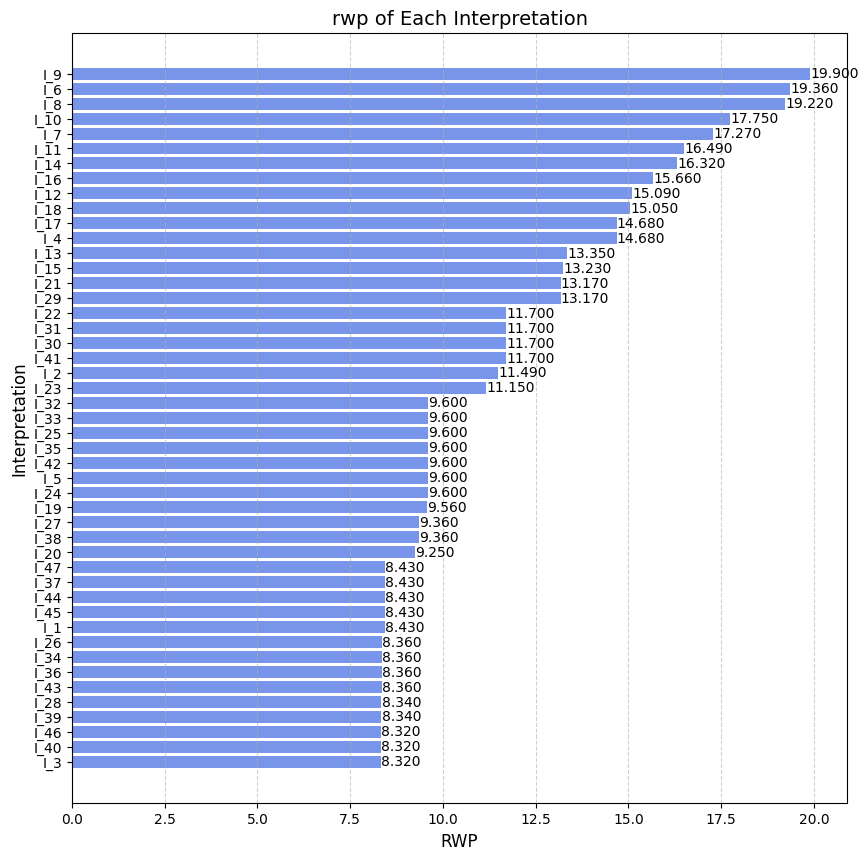

In [109]:
interpretation_names = list(interpretations.keys())
scores = np.array([data["rwp"] for data in interpretations.values()])

# Sort by scores for better visualization
sorted_indices = np.argsort(scores)
sorted_names = [interpretation_names[i] for i in sorted_indices]
sorted_scores = scores[sorted_indices]

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(sorted_names, sorted_scores, color="royalblue", alpha=0.7)

# Labels and Titles
ax.set_xlabel("RWP", fontsize=12)
ax.set_ylabel("Interpretation", fontsize=12)
ax.set_title("rwp of Each Interpretation", fontsize=14)
ax.grid(axis="x", linestyle="--", alpha=0.6)

# Display values on bars
for i, v in enumerate(sorted_scores):
    ax.text(v + 0.01, i, f"{v:.3f}", fontsize=10, verticalalignment="center")

# Show plot
plt.show()

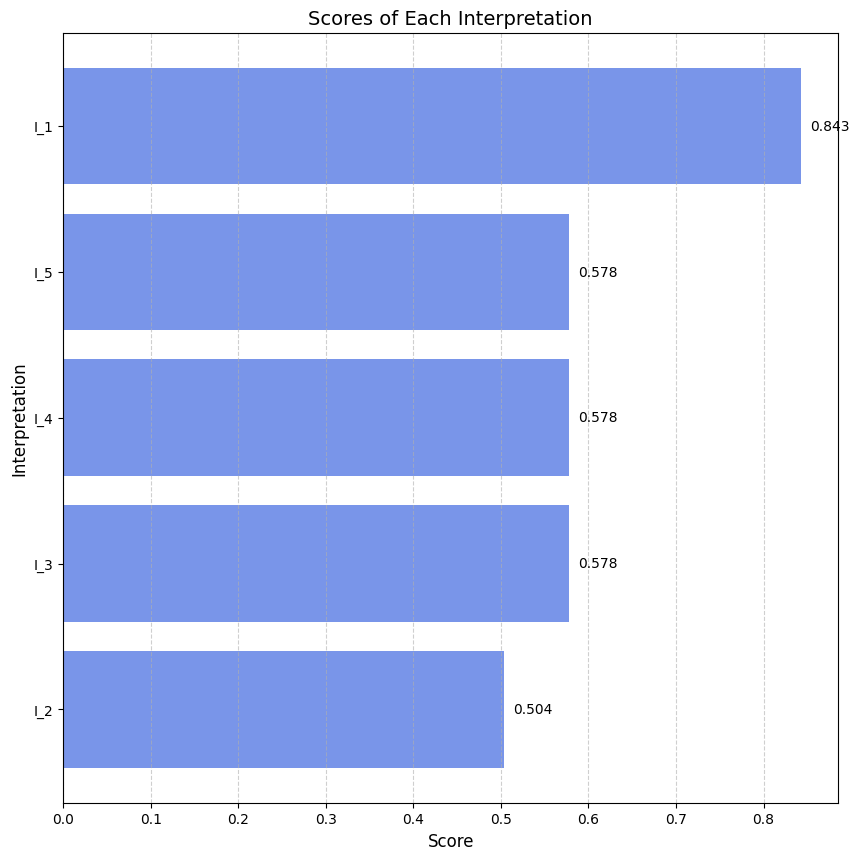

In [106]:
interpretations={'I_1': {'phases': ['V2O3_167_(icsd_1869)-0', 'Ca5V3O13_176_(icsd_760148)-6'], 'weight_fraction': [81.77126958224387, 18.228730417756122], 'rwp': 10.19, 'score': 0.8431069891391657, 'interpretation_importance': 100.0, 'LLM_interpretation_likelihood': 0.4110231235341388, 'LLM_interpretation_explanation': 'V2O3_167: V2O3 is likely to form under the given synthesis conditions due to the presence of V2O3 as a precursor. At 700°C, the temperature is sufficient to promote the reaction between the precursors, CaCO3 and V2O3, leading to the formation of vanadium oxides. The argon atmosphere is inert, which helps prevent oxidation of V2O3 back to higher oxidation states. However, the formation of V2O3 may not be complete due to potential competing reactions and the need for specific stoichiometric ratios, hence a likelihood of 0.6. (Likelihood: 0.60, Uncertainty: 0.28, Weight Fraction: 0.82) Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to V2O3. While the precursors contain both calcium and vanadium, the complex stoichiometry of Ca5V3O13 requires precise ratios that may not be easily achieved in a single-step synthesis at 700°C. The dwell time of 12 hours may allow for some reaction to occur, but the likelihood is reduced due to the complexity of the phase and potential formation of other simpler phases. Thus, a likelihood of 0.4 is assigned. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.18)', 'balance_score': 0.9501222222222222, 'prior_probability': 0.3905222035169749, 'posterior_probability': 0.3905222035169749}, 'I_2': {'phases': ['V2O3_15_(icsd_95762)-11', 'Ca5V3O13_176_(icsd_760148)-6'], 'weight_fraction': [66.50964558097803, 33.49035441902198], 'rwp': 9.99, 'score': 0.5040192786064249, 'interpretation_importance': 5.65284110980433, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.9847888888888888, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_3': {'phases': ['V2O3_167_(icsd_1869)-0'], 'weight_fraction': [100.0], 'rwp': 11.92, 'score': 0.5783338076870779, 'interpretation_importance': 0.0, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.5925925925925926, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_4': {'phases': ['V2O3_15_(icsd_95762)-11'], 'weight_fraction': [100.0], 'rwp': 11.92, 'score': 0.5783338076870779, 'interpretation_importance': 0.0, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.5925925925925926, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_5': {'phases': ['V2O3_167_(icsd_1869)-0', 'Ca5V3O13_176_(icsd_760148)-6'], 'weight_fraction': [81.77126958224387, 18.228730417756122], 'rwp': 10.19, 'score': 0.5783338076870779, 'interpretation_importance': 24.070494213446516, 'LLM_interpretation_likelihood': 0.4110231235341388, 'LLM_interpretation_explanation': 'V2O3_167: V2O3 is likely to form under the given synthesis conditions due to the presence of V2O3 as a precursor. At 700°C, the temperature is sufficient to promote the reaction between V2O3 and CaCO3, potentially leading to the formation of V2O3 through a reduction process. The argon atmosphere is inert, which helps prevent oxidation of vanadium species, thus favoring the stability of V2O3. However, the likelihood is not higher than 0.6 due to potential side reactions and the need for precise stoichiometry. (Likelihood: 0.60, Uncertainty: 0.28, Weight Fraction: 0.82) Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to V2O3. While the precursors contain both calcium and vanadium, the complex stoichiometry of Ca5V3O13 may require specific conditions that are not fully met in this synthesis. The temperature of 700°C is within a reasonable range for oxide formation, but the dwell time of 12 hours may not be sufficient to achieve the necessary phase stability and composition. Therefore, the likelihood is set at 0.4, reflecting the challenges in achieving the correct stoichiometry and phase stability. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.18)', 'balance_score': 0.9501222222222222, 'prior_probability': 0.3905222035169749, 'posterior_probability': 0.09400062439977727}}



interpretation_names = list(interpretations.keys())
scores = np.array([data["score"] for data in interpretations.values()])

# Sort by scores for better visualization
sorted_indices = np.argsort(scores)
sorted_names = [interpretation_names[i] for i in sorted_indices]
sorted_scores = scores[sorted_indices]

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(sorted_names, sorted_scores, color="royalblue", alpha=0.7)

# Labels and Titles
ax.set_xlabel("Score", fontsize=12)
ax.set_ylabel("Interpretation", fontsize=12)
ax.set_title("Scores of Each Interpretation", fontsize=14)
ax.grid(axis="x", linestyle="--", alpha=0.6)

# Display values on bars
for i, v in enumerate(sorted_scores):
    ax.text(v + 0.01, i, f"{v:.3f}", fontsize=10, verticalalignment="center")

# Show plot
plt.show()

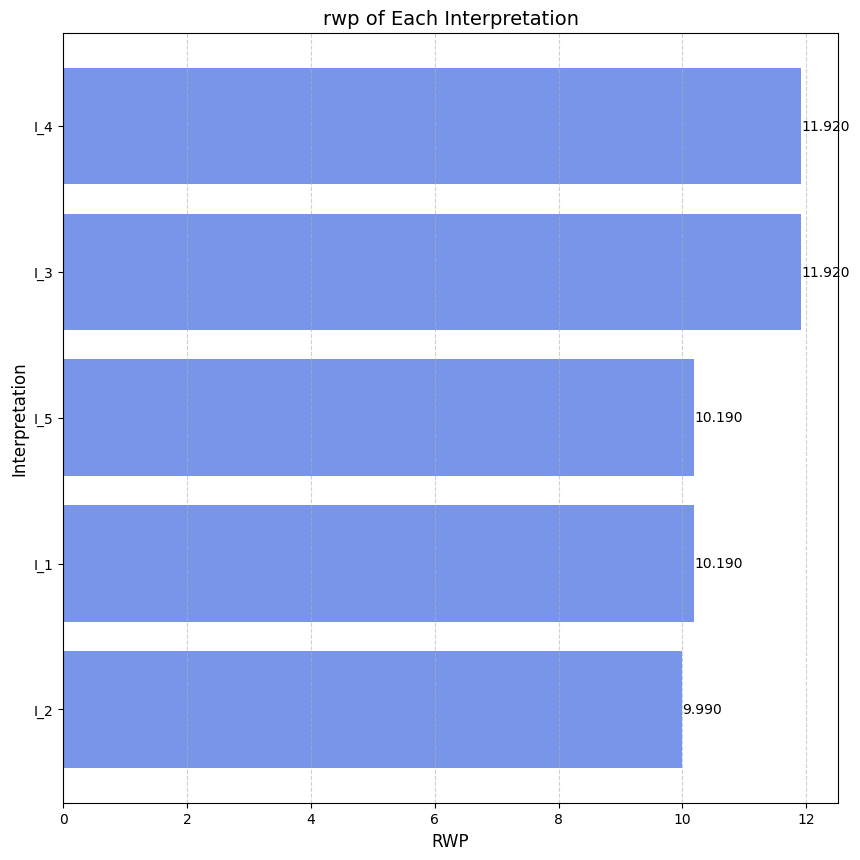

In [107]:
interpretations={'I_1': {'phases': ['V2O3_167_(icsd_1869)-0', 'Ca5V3O13_176_(icsd_760148)-6'], 'weight_fraction': [81.77126958224387, 18.228730417756122], 'rwp': 10.19, 'score': 0.8431069891391657, 'interpretation_importance': 100.0, 'LLM_interpretation_likelihood': 0.4110231235341388, 'LLM_interpretation_explanation': 'V2O3_167: V2O3 is likely to form under the given synthesis conditions due to the presence of V2O3 as a precursor. At 700°C, the temperature is sufficient to promote the reaction between the precursors, CaCO3 and V2O3, leading to the formation of vanadium oxides. The argon atmosphere is inert, which helps prevent oxidation of V2O3 back to higher oxidation states. However, the formation of V2O3 may not be complete due to potential competing reactions and the need for specific stoichiometric ratios, hence a likelihood of 0.6. (Likelihood: 0.60, Uncertainty: 0.28, Weight Fraction: 0.82) Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to V2O3. While the precursors contain both calcium and vanadium, the complex stoichiometry of Ca5V3O13 requires precise ratios that may not be easily achieved in a single-step synthesis at 700°C. The dwell time of 12 hours may allow for some reaction to occur, but the likelihood is reduced due to the complexity of the phase and potential formation of other simpler phases. Thus, a likelihood of 0.4 is assigned. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.18)', 'balance_score': 0.9501222222222222, 'prior_probability': 0.3905222035169749, 'posterior_probability': 0.3905222035169749}, 'I_2': {'phases': ['V2O3_15_(icsd_95762)-11', 'Ca5V3O13_176_(icsd_760148)-6'], 'weight_fraction': [66.50964558097803, 33.49035441902198], 'rwp': 9.99, 'score': 0.5040192786064249, 'interpretation_importance': 5.65284110980433, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.9847888888888888, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_3': {'phases': ['V2O3_167_(icsd_1869)-0'], 'weight_fraction': [100.0], 'rwp': 11.92, 'score': 0.5783338076870779, 'interpretation_importance': 0.0, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.5925925925925926, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_4': {'phases': ['V2O3_15_(icsd_95762)-11'], 'weight_fraction': [100.0], 'rwp': 11.92, 'score': 0.5783338076870779, 'interpretation_importance': 0.0, 'LLM_interpretation_likelihood': 0.0, 'LLM_interpretation_explanation': 'No data available or weight fractions are missing.', 'balance_score': 0.5925925925925926, 'prior_probability': 0.0, 'posterior_probability': 0.0}, 'I_5': {'phases': ['V2O3_167_(icsd_1869)-0', 'Ca5V3O13_176_(icsd_760148)-6'], 'weight_fraction': [81.77126958224387, 18.228730417756122], 'rwp': 10.19, 'score': 0.5783338076870779, 'interpretation_importance': 24.070494213446516, 'LLM_interpretation_likelihood': 0.4110231235341388, 'LLM_interpretation_explanation': 'V2O3_167: V2O3 is likely to form under the given synthesis conditions due to the presence of V2O3 as a precursor. At 700°C, the temperature is sufficient to promote the reaction between V2O3 and CaCO3, potentially leading to the formation of V2O3 through a reduction process. The argon atmosphere is inert, which helps prevent oxidation of vanadium species, thus favoring the stability of V2O3. However, the likelihood is not higher than 0.6 due to potential side reactions and the need for precise stoichiometry. (Likelihood: 0.60, Uncertainty: 0.28, Weight Fraction: 0.82) Ca5V3O13_176: The formation of Ca5V3O13 is possible but less likely compared to V2O3. While the precursors contain both calcium and vanadium, the complex stoichiometry of Ca5V3O13 may require specific conditions that are not fully met in this synthesis. The temperature of 700°C is within a reasonable range for oxide formation, but the dwell time of 12 hours may not be sufficient to achieve the necessary phase stability and composition. Therefore, the likelihood is set at 0.4, reflecting the challenges in achieving the correct stoichiometry and phase stability. (Likelihood: 0.40, Uncertainty: 0.19, Weight Fraction: 0.18)', 'balance_score': 0.9501222222222222, 'prior_probability': 0.3905222035169749, 'posterior_probability': 0.09400062439977727}}



interpretation_names = list(interpretations.keys())
scores = np.array([data["rwp"] for data in interpretations.values()])

# Sort by scores for better visualization
sorted_indices = np.argsort(scores)
sorted_names = [interpretation_names[i] for i in sorted_indices]
sorted_scores = scores[sorted_indices]

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(sorted_names, sorted_scores, color="royalblue", alpha=0.7)

# Labels and Titles
ax.set_xlabel("RWP", fontsize=12)
ax.set_ylabel("Interpretation", fontsize=12)
ax.set_title("rwp of Each Interpretation", fontsize=14)
ax.grid(axis="x", linestyle="--", alpha=0.6)

# Display values on bars
for i, v in enumerate(sorted_scores):
    ax.text(v + 0.01, i, f"{v:.3f}", fontsize=10, verticalalignment="center")

# Show plot
plt.show()